#**Designing 5 Types of Randomized Control Trials (RCTs): Analyzing the Impact of Price Markdown Strategies on E-commerce**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#**Synthetic Data** <br>
Platform: Shopper's Drug Mart <br>
Number of Participants: 10000<br>
Demographic info: Age, Gender, Location, Income <br>
User Purchase Behavior: Past Purchase History, Frequency of Visits, Frequency of Made Purchase, Types of Purchases <br>
Dependent Variables: Session Duration, Conversion Rate, Number of Items, Average Order Value (Add two more variables Average Item Value * Number of Items Purchased to compute the AOV)

Note: We generated the independent, demographic variables below. We then chose to generate the dependent variables such as Frequency of Visits,	Frequency of Made Purchase, Conversion Rate, and Session Duration within each experiment separately.


In [ ]:
# Define constants
# Total participants
n_participants = 10000
# Total visits last year
historical_visits = np.random.randint(0, 100, n_participants)
# Threshold for being considered a frequent user
frequent_threshold = 50

# Determine frequency in past based on threshold
frequency_in_past = ['frequent' if visits > frequent_threshold else 'not frequent' for visits in historical_visits]

# Generate data
participants_data = {
    "Participant ID": np.arange(1, n_participants + 1),
    "Age": np.random.randint(18, 71, n_participants),
    "Gender": np.random.choice(['Male', 'Female'], n_participants),
    "Location": np.random.choice(['Toronto', 'Montreal', 'Vancouver', 'Calgary', 'Edmonton',
                                  'Ottawa', 'Winnipeg', 'Quebec City', 'Hamilton', 'Kitchener',
                                  'London', 'Victoria', 'Halifax', 'Oshawa', 'Windsor',
                                  'Saskatoon', 'Regina', 'St. John\'s', 'Kelowna', 'Barrie'], n_participants),
    "Income": np.random.randint(0, 200001, n_participants),
    "Frequency in the Past": frequency_in_past,
    "Historical Visits": np.random.randint(0, 200, n_participants),
    "Device Type": np.random.choice(["Mobile", "Desktop", "Tablet"], n_participants),
    "Preferred Payment Method": np.random.choice(["Credit Card", "PayPal", "Bank Transfers", "Buy Now Pay Later", "Digital Wallet", "Debit"], n_participants),
    "Membership Status": np.random.choice(["Basic", "Silver", "Gold", "Platinum"], n_participants),
    "Exposure to Social Media Promotion": np.random.choice(["Yes", "No"], n_participants)
}

# Create DataFrame from participants data
df = pd.DataFrame(participants_data)
df.head(15)

Participant ID  Age  Gender     Location  Income Frequency in the Past  \
0                1   32    Male     Edmonton    4599          not frequent   
1                2   60  Female     Victoria   14116          not frequent   
2                3   35    Male    Saskatoon   76701          not frequent   
3                4   68    Male     Hamilton   84884              frequent   
4                5   64  Female      Kelowna   64343          not frequent   
5                6   38    Male     Montreal   57669          not frequent   
6                7   61    Male   St. John's   61974              frequent   
7                8   56  Female  Quebec City  119250              frequent   
8                9   46  Female       Ottawa   19904          not frequent   
9               10   50    Male      Toronto  167797          not frequent   
10              11   64  Female       Barrie   89273              frequent   
11              12   67    Male      Kelowna   21547          not frequent   
12              13   38  Female    Kitchener   83734              frequent   
13              14   41  Female      Calgary   55507          not frequent   
14              15   25  Female       London  115168              frequent   

    Historical Visits Device Type Preferred Payment Method Membership Status  \
0                  90     Desktop              Credit Card          Platinum   
1                 167      Tablet           Bank Transfers              Gold   
2                   8     Desktop              Credit Card          Platinum   
3                  19     Desktop           Digital Wallet              Gold   
4                  75     Desktop                    Debit            Silver   
5                   4     Desktop           Digital Wallet            Silver   
6                  44      Tablet        Buy Now Pay Later              Gold   
7                 121      Mobile              Credit Card          Platinum   
8                 194      Mobile           Digital Wallet             Basic   
9                 145      Mobile                    Debit            Silver   
10                 39      Mobile                    Debit          Platinum   
11                 26      Tablet                    Debit              Gold   
12                 37      Tablet              Credit Card          Platinum   
13                196      Tablet           Digital Wallet          Platinum   
14                167      Tablet                   PayPal            Silver   

   Exposure to Social Media Promotion  
0                                  No  
1                                 Yes  
2                                 Yes  
3                                  No  
4                                 Yes  
5                                 Yes  
6                                 Yes  
7                                  No  
8                                 Yes  
9                                 Yes  
10                                Yes  
11                                Yes  
12                                Yes  
13                                Yes  
14                                 No

#**1. Parallel Design**
​
**Section 1.1: Power Analysis, Sample Size, & Associated Graph** </br>
>Effect Size: Medium (0.5)</br>
Power: 0.85 <br>
Total Sample Size: 146 </br>




In [ ]:
from statsmodels.stats.power import TTestIndPower

# Power Analysis for Parallel Design Scenario

# Medium effect size
effect_size = 0.5
# Significance level
alpha = 0.05
# Power value
power = 0.85
# parallel design
number_groups = 2

# Creating a power analysis object
analysis = TTestIndPower()

# Calculating the required sample size per group
result = analysis.solve_power(effect_size=effect_size, alpha=alpha, power=power)

# Rounding to get integer sample size
required_sample_size_per_group = round(result)

# Total sample size required for the experiment
total_sample_size = required_sample_size_per_group * number_groups

# Output the result
print(f'Required sample size per group: {required_sample_size_per_group}')
print(f'Total sample size for all groups: {total_sample_size}')

Required sample size per group: 73
Total sample size for all groups: 146


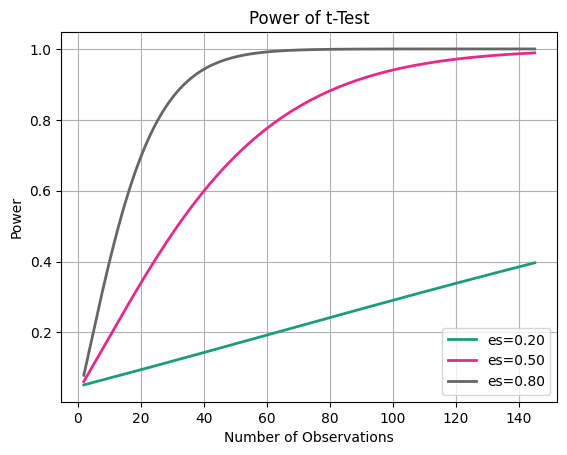

In [ ]:
from numpy import array
from matplotlib import pyplot

# Effect sizes: small (0.2), medium (0.5), large (0.8)
effect_sizes = array([0.2, 0.5, 0.8])

# Sample sizes: range from 2 to 146
sample_sizes = array(range(2, 146))

# Create a power analysis object for t-tests
analysis = TTestIndPower()

# Plot power curves
analysis.plot_power(dep_var='nobs', nobs=sample_sizes, effect_size=effect_sizes, alpha=0.05, title='Power of t-Test')

# Formatting the plot
pyplot.grid()
pyplot.ylabel('Power')
pyplot.show()

**Section 1.2: BLOCKING, TWO-WAY ANOVA, POST-HOC TUKEY'S HSD TEST & ASSUMPTION CHECKS FOR ANOVA** <br>

><mark>**Assignment 2 - Blocking for parallel analysis using Membership Status as blocking factor** <br>

> Platinum level customers might be more willing to purchase, regardless of the promotion. <br>
Confounding Effect: If a specific promotion is used more often in platinum level vs. another one in the gold, silver, basic levels, the promotion's effect on conversion may be overestimated. <br>

In [ ]:
# Setting the seed for reproducibility: so that our analysis and conclusions remain consistent
np.random.seed(42)

# Define membership levels
membership_labels = ["Basic", "Silver", "Gold", "Platinum"]

# Assign random membership status to each participant
df["Membership_Status"] = np.random.choice(membership_labels, size=len(df), replace=True)

# Create a dictionary to store the participants by membership status
membership_samples = {}

# Loop through each membership level and randomly select 36 participants
for membership_level in membership_labels:
    selected = df[df["Membership_Status"] == membership_level].sample(n=36, random_state=42)
    membership_samples[membership_level] = selected

# Combine all selected participants into one DataFrame
selected_participants = pd.concat(membership_samples.values())

# Find remaining participants who were not selected
remaining_participants = df[~df["Participant ID"].isin(selected_participants["Participant ID"])]

# Randomly select 2 extra participants from the remaining ones
extra_participant = remaining_participants.sample(n=2, random_state=42)

# Randomly assign a membership status to the extra participants
extra_participant["Membership_Status"] = np.random.choice(membership_labels, size=2, replace=True)

# Add the extra participants to the selected participants
selected_participants = pd.concat([selected_participants, extra_participant])

# Reset index while keeping the original Participant ID
selected_participants.reset_index(drop=True, inplace=True)

# Count how many participants are in each membership status
membership_counts = selected_participants["Membership_Status"].value_counts()

# Print out the number of participants in each membership status & display the dataframe
print(membership_counts)
print("\n")

selected_features = ["Participant ID", 'Income', "Membership_Status"]
# Displaying the specific subset
selected_participants[selected_features].head(10)

Membership_Status
Gold        37
Platinum    37
Basic       36
Silver      36
Name: count, dtype: int64




Participant ID  Income Membership_Status
0            6179   45144             Basic
1             725  124504             Basic
2            1773  170487             Basic
3            9268    2124             Basic
4            8190   80647             Basic
5            5657   78969             Basic
6            6093  151003             Basic
7            4576  165541             Basic
8            1004  106751             Basic
9            1697  177217             Basic

>**Randomization for Parallel Design After Blocking Done Above**

In [ ]:
# Setting the seed for reproducibility
np.random.seed(42)

# Now we must randomly assign 73 participants to each of the 2 groups:
# Group 1: Buy One Get One Free
# Group 2: No Discount

# Defining the group combinations based on above parallel design
parallel_conditions = [
    ('Buy One Get One Free'),  # Group 1
    ('No Discount')  # Group 2
]

# There will be 2 groups
num_groups_p = len(parallel_conditions)
# Based on the power analysis, we will evenly split 73 individuals per group
group_size_p = len(selected_participants) // num_groups_p

# Initializing the list to store assigned treatment levels
treatment_assignments = []

# Randomly assign participants to groups by shuffling the IDs
np.random.shuffle(selected_participants['Participant ID'].values)

# Assigning participants evenly to parallel design groups using a loop
for i in range(len(selected_participants)):
    # Cycling through the 2 groups in the given order
    group_index = i % num_groups_p
    # Getting the corresponding treatment levels
    treatment = parallel_conditions[group_index]
    # Appending the assigned discount condition
    treatment_assignments.append(treatment)

# Adding the factor assignments to the DataFrame
selected_participants['DiscountType'] = treatment_assignments

# Now we will generate the dependent variables for this experiment
n_samples = len(selected_participants)

# Initializing activity data with zeros as placeholders
frequency_of_visits = np.zeros(n_samples)
frequency_of_made_purchase = np.zeros(n_samples)

# Define mean and standard deviation values for visit frequency based on treatment type
# Higher expected visits for promotional offer
visit_mean_treatment, visit_std_treatment = 30, 10
# Lower expected visits without discount
visit_mean_control, visit_std_control = 12, 5
# Standard deviation as a fraction of mean visits to account for variability
purchase_std_factor = 0.5

# Looping through each of the rows
for i in range(n_samples):
    # Holds the treatment type ('Buy One Get One Free' or 'No Discount') for the current participant
    treatments = treatment_assignments[i]

    if treatments == 'Buy One Get One Free':
        # Generate frequency of visits from normal distribution, with non-negative values
        frequency_of_visits[i] = max(0, int(np.random.normal(visit_mean_treatment, visit_std_treatment)))
    else:
        # Generate frequency of visits from normal distribution, with non-negative values
        frequency_of_visits[i] = max(0, int(np.random.normal(visit_mean_control, visit_std_control)))

    # Generate purchase frequency based on visits, ensuring it does not exceed visits
    # Assuming 50% conversion rate on average
    purchase_mean = frequency_of_visits[i] * 0.5
    # Define variability in purchases
    purchase_std = purchase_mean * purchase_std_factor
    # Generate the number of purchases, ensuring it is within valid bounds (0 to total visits)
    frequency_of_made_purchase[i] = max(0, min(frequency_of_visits[i], int(np.random.normal(purchase_mean, purchase_std))))

# Calculating conversion rate: purchases made to visits but accounting for zero values
conversion_rate = np.divide(frequency_of_made_purchase, frequency_of_visits, where=frequency_of_visits > 0)
# Replacing any strange values with 0 (i.e. NaN, negative & positive infinity)
conversion_rate = np.nan_to_num(conversion_rate, nan=0, posinf=0, neginf=0)
conversion_rate = np.round(conversion_rate, 5)

# Rounding the values for the dependent variables
frequency_of_visits = np.round(frequency_of_visits, 2)
frequency_of_made_purchase = np.round(frequency_of_made_purchase, 2)

# Creating activity DataFrame
activity_data = pd.DataFrame({
    "Participant ID": selected_participants["Participant ID"],
    "Frequency of Visits": frequency_of_visits,
    "Frequency of Made Purchase": frequency_of_made_purchase,
    "Conversion_Rate": conversion_rate
})

# Merging the membership status and activity data together
df_parallel = selected_participants.merge(activity_data, on="Participant ID")

# Count the number of participants in each treatment group
treatment_counts = selected_participants['DiscountType'].value_counts()

# Print out the counts to make sure they are evenly distributed
print(treatment_counts)
print("\n")

# Selecting the subset features that should be displayed for parallel design
subset_features = [
    'Participant ID', 'Income', 'Membership_Status', 'DiscountType',
    'Frequency of Visits', 'Frequency of Made Purchase', 'Conversion_Rate'
]

# Show the demographic data for the selected participants
df_parallel[subset_features].head(10)

DiscountType
Buy One Get One Free    73
No Discount             73
Name: count, dtype: int64




Participant ID  Income Membership_Status          DiscountType  \
0             423   45144             Basic  Buy One Get One Free   
1            5591  124504             Basic           No Discount   
2            5932  170487             Basic  Buy One Get One Free   
3            2859    2124             Basic           No Discount   
4            6167   80647             Basic  Buy One Get One Free   
5            3726   78969             Basic           No Discount   
6             771  151003             Basic  Buy One Get One Free   
7            3880  165541             Basic           No Discount   
8            7624  106751             Basic  Buy One Get One Free   
9            5804  177217             Basic           No Discount   

   Frequency of Visits  Frequency of Made Purchase  Conversion_Rate  
0                 28.0                         7.0          0.25000  
1                 12.0                         5.0          0.41667  
2                 56.0                        13.0          0.23214  
3                  8.0                         4.0          0.50000  
4                 38.0                        38.0          1.00000  
5                 20.0                        14.0          0.70000  
6                 32.0                        23.0          0.71875  
7                  8.0                         3.0          0.37500  
8                 15.0                         6.0          0.40000  
9                 16.0                         7.0          0.43750

>**Checking for Normality of Dependent Variable: Conversion Rate**

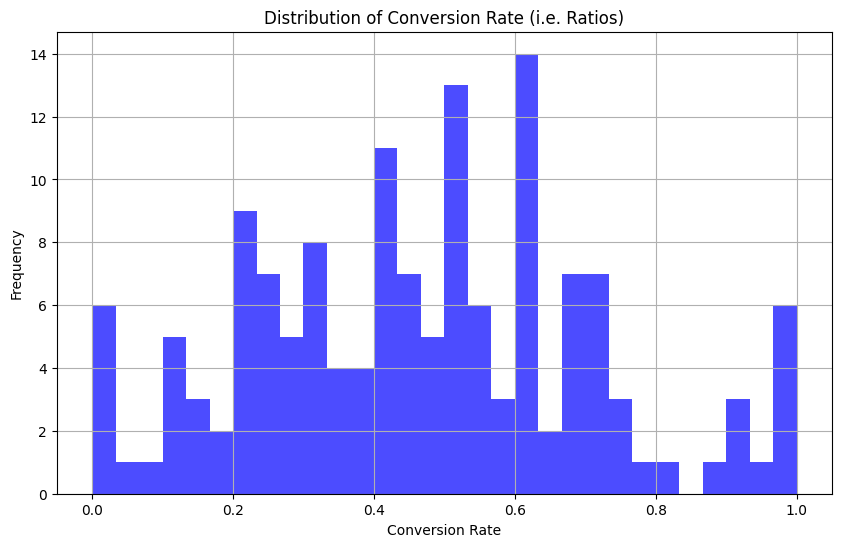

In [ ]:
# Create a histogram of the Conversion Rate
plt.figure(figsize=(10, 6))
plt.hist(df_parallel['Conversion_Rate'].dropna(), bins=30, color='blue', alpha=0.7)
# Adds a title to the histogram
plt.title('Distribution of Conversion Rate (i.e. Ratios)')
# Label for the x-axis
plt.xlabel('Conversion Rate')
# Label for the y-axis
plt.ylabel('Frequency')
# Adds a grid for better readability
plt.grid(True)
# Displays the plot
plt.show()

>**Violin Plot to Display the Distribution after the Blocking & Randomization for Parallel Design**

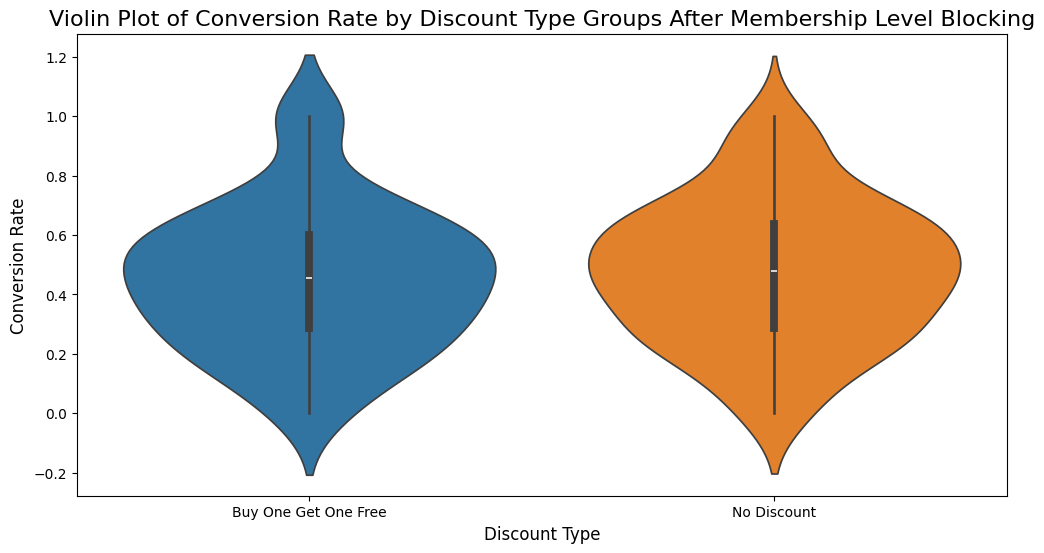

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the violin plot
plt.figure(figsize=(12, 6))
sns.violinplot(x="DiscountType", y="Conversion_Rate", data=df_parallel, hue='DiscountType',
               order=["Buy One Get One Free", "No Discount"])

# Add title and labels
plt.title('Violin Plot of Conversion Rate by Discount Type Groups After Membership Level Blocking', fontsize=16)
plt.xlabel('Discount Type', fontsize=12)
plt.ylabel('Conversion Rate', fontsize=12)

# Show the plot
plt.show()

>**Boxplot: A more clear visualization of the distribution after separating into different Membership levels and discount types (i.e. treatment/control groups)**

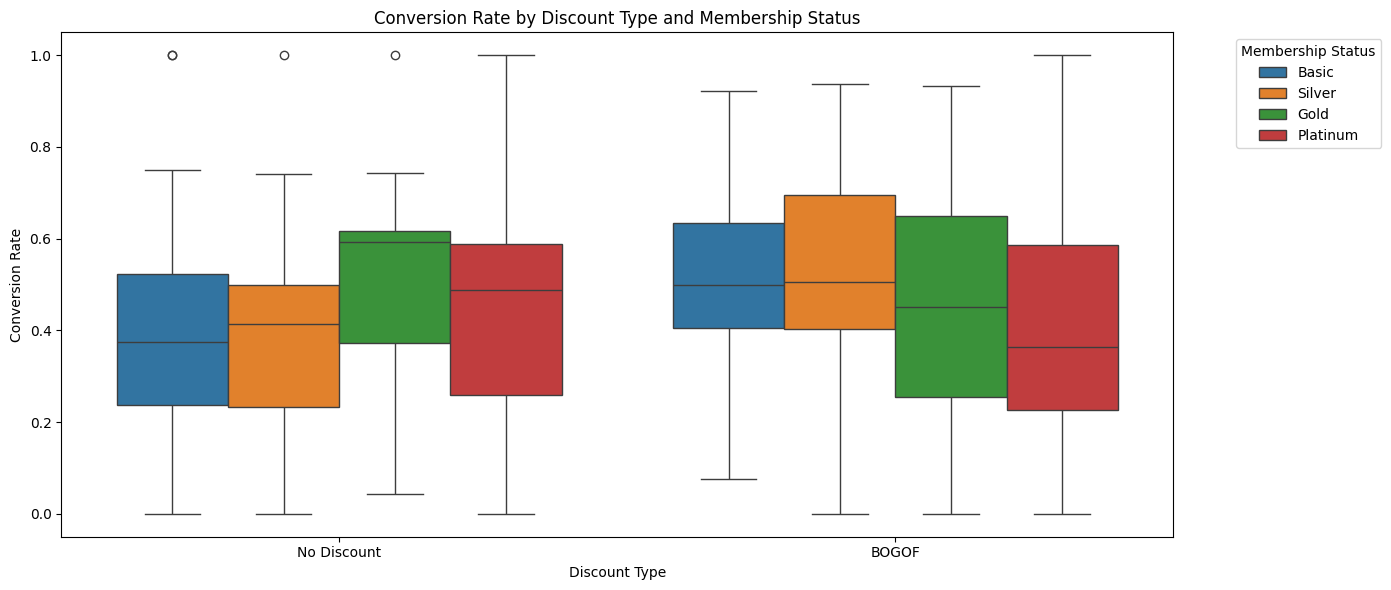

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter the data (assuming you want to filter for relevant levels of membership status and discount type)
df_parallel_cleaned = df_parallel.dropna(subset=['Conversion_Rate', 'DiscountType', 'Membership_Status'])

# Plot the boxplot with 'DiscountType' on x-axis, 'Conversion_Rate' on y-axis, and 'Membership_Status' as hue
plt.figure(figsize=(14, 6))
ax = sns.boxplot(data=df_parallel_cleaned, x="DiscountType", y="Conversion_Rate", hue="Membership_Status")

ax.set_xticks([0, 1])
ax.set_xticklabels(['No Discount', 'BOGOF'], rotation=0)

# Customize the plot (labels, title, etc.)
ax.set_title('Conversion Rate by Discount Type and Membership Status')
ax.set_xlabel('Discount Type')
ax.set_ylabel('Conversion Rate')

# Show the plot and the legend for membership status
plt.legend(title='Membership Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

>**Shapiro-Wilk test: We use the Shapiro-Wilks Test to check if the set of observations comes from a normal distribution before fitting the two-way ANOVA.**

In [ ]:
from scipy import stats

# Perform Shapiro-Wilk test on Conversion_Rate and print result
shapiroUnem = stats.shapiro(df_parallel['Conversion_Rate'].dropna())

print(f'W: {round(shapiroUnem[0],3)}, P-value: {round(shapiroUnem[1],3)}')

W: 0.98, P-value: 0.035


>**TWO-WAY ANOVA & SUMMARY STATISTICS: After blocking using membership status level and then randomly assigning each participant into two groups we use two-way ANOVA to find the significance of the blocking factor based on the p-value**

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Create model
formula = 'Conversion_Rate ~ DiscountType + Membership_Status + DiscountType:Membership_Status'
model = sm.formula.ols(formula, data=df_parallel).fit()

# Perform ANOVA and print table
aov_table = sm.stats.anova_lm(model)
print(aov_table)
print(model.summary())

                                   df    sum_sq   mean_sq         F    PR(>F)
DiscountType                      1.0  0.020073  0.020073  0.342514  0.559338
Membership_Status                 3.0  0.068064  0.022688  0.387129  0.762444
DiscountType:Membership_Status    3.0  0.245430  0.081810  1.395933  0.246699
Residual                        138.0  8.087613  0.058606       NaN       NaN
                            OLS Regression Results                            
Dep. Variable:        Conversion_Rate   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                 -0.009
Method:                 Least Squares   F-statistic:                    0.8131
Date:                Tue, 25 Feb 2025   Prob (F-statistic):              0.578
Time:                        04:37:56   Log-Likelihood:                 4.0439
No. Observations:                 146   AIC:                             7.912
Df Residuals:                     138   BIC:             

**TUKEY'S HSD TEST: Post-hoc analysis following Two-Way ANOVA**

> SOURCE: https://campus.datacamp.com/courses/experimental-design-in-python/analyzing-experimental-data-statistical-tests-and-power?ex=5

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Perform Tukey's HSD test for DiscountType
tukey_results = pairwise_tukeyhsd(df_parallel['Conversion_Rate'], df_parallel['DiscountType'])

print("\nTukey HSD Test Results for DiscountType:")
print(tukey_results)


Tukey HSD Test Results for DiscountType:
         Multiple Comparison of Means - Tukey HSD, FWER=0.05          
       group1           group2   meandiff p-adj   lower  upper  reject
----------------------------------------------------------------------
Buy One Get One Free No Discount   0.0235 0.5584 -0.0556 0.1025  False
----------------------------------------------------------------------


**Checking Assumptions for Two-Way ANOVA:**

> 1. IID: Independently & Identically distributed taken care of by random sampling.
2. Normality: Testing for normality of residuals after fitting the model using the Shapiro-Wilk test
3. Homoscedasticity: variances of the dependent variable should be approximately equal across the different groups using



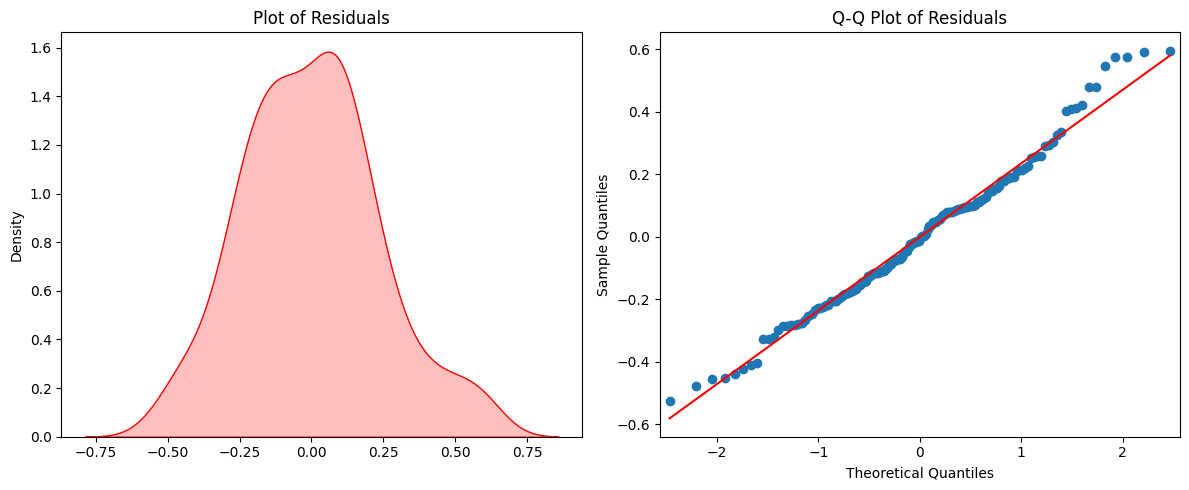

In [ ]:
import seaborn as sns
import statsmodels.api as sm

# Get residuals after fitting the model
residuals = model.resid

# Visualization: KDE plot and Q-Q plot for residuals
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# KDE plot for residuals with fill instead of shade
sns.kdeplot(residuals, ax=ax[0], color='red', fill=True)
ax[0].set_title('Plot of Residuals')

# Q-Q plot
sm.qqplot(residuals, line='s', ax=ax[1])
ax[1].set_title('Q-Q Plot of Residuals')

# Plotting the graphs below
plt.tight_layout()
plt.show()

>**Performing Shapiro-Wilk test on residuals after fitting the model to check for assumption of normality.**

> The residuals of our model seem to follow a normal distribution, as the Shapiro-Wilk test results indicate there is no significant deviation from normality. It implies that the assumptions of normality for our residuals are likely met, which is an important condition for fitting our model.

In [ ]:
# Perform Shapiro-Wilk test on residuals
shapiro_res = stats.shapiro(residuals.dropna())

print(f'W: {round(shapiro_res[0], 3)}, P-value: {round(shapiro_res[1], 3)}')

W: 0.985, P-value: 0.113


>**The Residuals vs. Fitted Values Plot:** below indicates that the model is a good fit for the data, as there are no clear patterns, trends, or heteroscedasticity visible in the residuals.

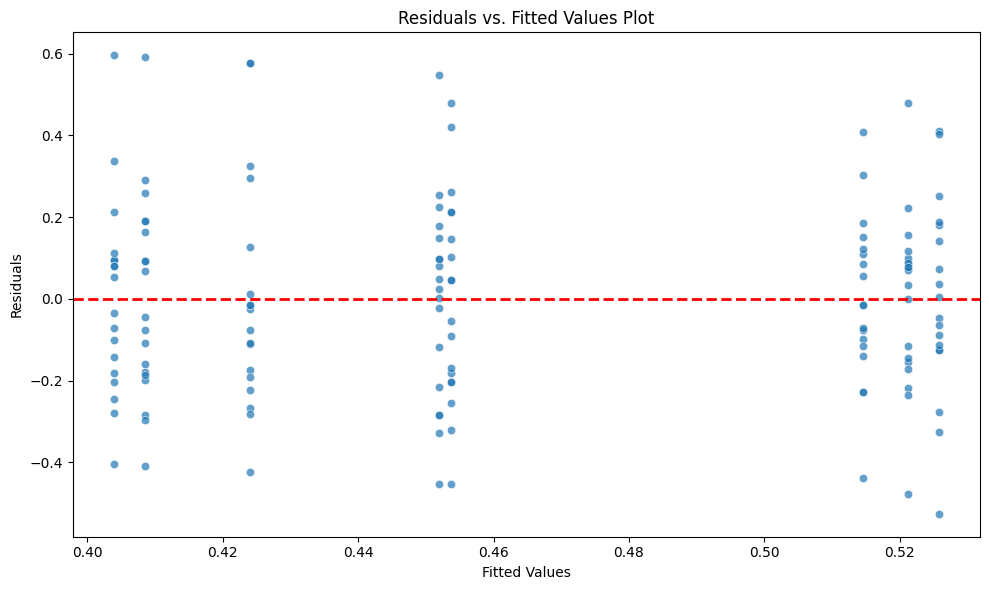

In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# Get the residuals and the fitted values
residuals = model.resid
fitted_values = model.fittedvalues

# Plot Residuals vs. Fitted Values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=fitted_values, y=residuals, alpha=0.7)
# Line at zero as a reference
plt.axhline(0, color='red', linestyle='--', linewidth=2)
plt.title("Residuals vs. Fitted Values Plot")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.tight_layout()
plt.show()

**Section 1.3: CONTINUOUS COVARIATES, ANCOVA, & ASSUMPTION CHECKS** <br>

><mark>**Assignment 2 - Adding 1 New Continuous Covariate (i.e. Total_Time_Spent_On_Platform) and Using Age as the other continuous covariate** <br>

In [ ]:
# Setting the seed for reproducibility: so that our analysis and conclusions consistent
np.random.seed(42)

# Select 141 unique random participants
unique_participants = df['Participant ID'].unique()
selected_participants = np.random.choice(unique_participants, 141, replace=False)

# Filter the DataFrame to keep only the selected participants
parallel_df = df[df['Participant ID'].isin(selected_participants)].copy()

# Now only select the demographic features associated with each participant such as (Participant ID,	Age	Gender,	Location,	Income)
# Selecting the demographic features associated with each participant
demographic_features = ['Participant ID', 'Age', 'Gender', 'Location', 'Income']
# Filtering the DataFrame to include only the selected demographic features
# Also, making sure each participant is unique and only appears once
demographic_participant_df = parallel_df[demographic_features].drop_duplicates(subset='Participant ID').copy()

# Now we must randomly assign 47 participants to each of the 3 groups:
# Group 1:  Percentage Markdown
# Group 2:  Buy One Get One Free
# Group 3:  No Discount
# Defining the group combinations based on above parallel design
parallel_conditions = [
    # Group 1: BOGOF
    ('Buy One Get One Free'),
    # Group 2: No Discount
    ('No Discount')]

# There will be 3 groups
num_groups_p = len(parallel_conditions)
# Based on the power analysis we will evenly split 47 individuals per group
group_size_p = len(demographic_participant_df) // num_groups_p

# Initializing the list to store assigned treatment levels
treatment_assignments = []

# Randomly assign participants to groups by shuffling the IDs randomly
np.random.shuffle(demographic_participant_df['Participant ID'].values)

# Assigning participants evenly to factorial groups using a loop
for i in range(len(demographic_participant_df)):
  # Cycling through the 2 groups in the given order
  group_index = i % num_groups_p
  # Getting the corresponding treatment levels
  treatment = parallel_conditions[group_index]
  # Appending the assigned holiday condition
  treatment_assignments.append(treatment)


# Adding the factor assignments to the DataFrame
demographic_participant_df['DiscountType'] = treatment_assignments


# Now we will generate the dependent variables for this experiment specifically
n_samples = len(demographic_participant_df)

# Initializing activity data and using zeros as placeholders
frequency_of_visits = np.zeros(n_samples)
frequency_of_made_purchase = np.zeros(n_samples)

# Define mean and standard deviation values for visit frequency based on treatment type
# Higher expected visits for promotional offer
visit_mean_treatment, visit_std_treatment = 30, 10
 # Lower expected visits without discount
visit_mean_control, visit_std_control = 12, 5
# Standard deviation as a fraction of mean visits to account for variability
purchase_std_factor = 0.5


# Looping through each of the rows
for i in range(n_samples):
  # Holds the treatment type ('Buy One Get One Free' or 'No Discount') for the current participant
  treatments = treatment_assignments[i]

  if treatments == 'Buy One Get One Free':
    # Generate frequency of visits from normal distribution, with non-negative values
    frequency_of_visits[i] = max(0, int(np.random.normal(visit_mean_treatment, visit_std_treatment)))
  else:
    # Generate frequency of visits from normal distribution, with non-negative values
    frequency_of_visits[i] = max(0, int(np.random.normal(visit_mean_control, visit_std_control)))

  # Generate purchase frequency based on visits, ensuring it does not exceed visits
  # Estimate the purchase frequency based on visit frequency
  # Assuming 50% conversion rate on average
  purchase_mean = frequency_of_visits[i] * 0.5
  # Define variability in purchases
  purchase_std = purchase_mean * purchase_std_factor
  # Generate the number of purchases, ensuring it is within valid bounds (0 to total visits)
  frequency_of_made_purchase[i] = max(0, min(frequency_of_visits[i], int(np.random.normal(purchase_mean, purchase_std))))

# Calculating conversion rate: which is a just the purchases made to visits but accounting for zero value
conversion_rate = np.divide(frequency_of_made_purchase, frequency_of_visits, where=frequency_of_visits > 0)
# Replacing any strange values with 0 (i.e. NaN, negative & positive infinity)
conversion_rate = np.nan_to_num(conversion_rate, nan=0, posinf=0, neginf=0)
conversion_rate = np.round(conversion_rate, 5)


# Rounding the values for the dependent variables
frequency_of_visits = np.round(frequency_of_visits, 2)
frequency_of_made_purchase = np.round(frequency_of_made_purchase, 2)


#--------------------------------------------------------------------- Assignment 2: Adding a New Covariate --------------------------------------------------------------------------#
# Create a random time multiplier between 5 and 30 minutes for each participant
# This represents how long they spend on the platform per visit (in minutes)
time_multiplier = np.random.uniform(5, 30, n_samples)

# Define how much time each treatment group spends on the platform
# We assume different discount types affect how long people stay on the platform
time_adjustment_factors = {
    # People in this group spend 50% more time on average
    'Buy One Get One Free': 1.5,
    # People in this group (control group) don't get extra time
    'No Discount': 1.0}

# Adjust the time multiplier based on the treatment assigned to each participant
adjusted_time_multiplier = []

# Looping through each participant and adjust their time multiplier based on their treatment group
for i in range(n_samples):
    # Get the treatment for this participant
    treatment = treatment_assignments[i]
    # Multiply the random time with the adjustment factor for their treatment group
    adjusted_time = time_multiplier[i] * time_adjustment_factors[treatment]
    # Appending these values to the empty list created above
    adjusted_time_multiplier.append(adjusted_time)

# Calculate the total time spent on the platform by each participant
# Multiply frequency of visits by the adjusted time multiplier for each visit
length_of_time_spent = frequency_of_visits * adjusted_time_multiplier

# Convert time from minutes to hours
# Since time is in minutes, divide by 60 to convert it to hours
length_of_time_spent_in_hours = length_of_time_spent / 60
#----------------------------------------------------------------------------END of Adding New Covariate----------------------------------------------------------------------------#

# Creating activity DataFrame
activity_data = pd.DataFrame({
    "Participant ID": demographic_participant_df["Participant ID"],
    "Frequency of Visits": frequency_of_visits,
    "Frequency_of_Made_Purchase": frequency_of_made_purchase,
    "Conversion_Rate": conversion_rate})

# Merging the demographic and activity data together
df_parallel_Covariance = demographic_participant_df.merge(activity_data, on="Participant ID")
# Adding the "Total Time Spent on Platform (hours)" to the DataFrame
df_parallel_Covariance['Total_Time_Spent_On_Platform'] = np.round(length_of_time_spent_in_hours, 2)
# Chosen features to display for this subset
chosen_features = ['Participant ID', 'Age', 'Income', 'DiscountType', 'Frequency of Visits', 'Frequency_of_Made_Purchase', 'Conversion_Rate', 'Total_Time_Spent_On_Platform']
# Show the demographic data for the selected participants
df_parallel_Covariance[chosen_features].head(10)

Participant ID  Age  Income          DiscountType  Frequency of Visits  \
0             440   60  163495  Buy One Get One Free                 20.0   
1            4685   20   87328           No Discount                 19.0   
2            3724   65  146122  Buy One Get One Free                 33.0   
3            5590   69   91385           No Discount                 13.0   
4            7851   22   45904  Buy One Get One Free                 35.0   
5            1964   35   14320           No Discount                  7.0   
6            2895   26  110697  Buy One Get One Free                 38.0   
7            5795   41   58128           No Discount                  5.0   
8            8329   28   79314  Buy One Get One Free                 22.0   
9            3040   58     959           No Discount                 12.0   

   Frequency_of_Made_Purchase  Conversion_Rate  Total_Time_Spent_On_Platform  
0                         0.0          0.00000                          8.74  
1                        14.0          0.73684                          3.74  
2                        28.0          0.84848                          7.62  
3                         4.0          0.30769                          4.45  
4                        10.0          0.28571                         20.10  
5                         4.0          0.57143                          2.24  
6                         6.0          0.15789                         22.29  
7                         1.0          0.20000                          0.71  
8                        13.0          0.59091                         14.88  
9                         9.0          0.75000                          3.91

**ANCOVA, SUMMARY STATISTICS, & TUKEY HSD TEST:** <br>

> 'Age', 'Total_Time_Spent_On_Platform' are the two continuous covariates
DiscountType will be the categorical variable (i.e. treatment/control groups)<br>

>**SOURCE FOR ANCOVA CODE:** https://www.reneshbedre.com/blog/ancova.html

In [ ]:
# Create the formula for the ANCOVA model
formula_1 = 'Q("Conversion_Rate") ~ Q("Age") + Q("Total_Time_Spent_On_Platform") + C(Q("DiscountType")) + \
             Q("Age"):C(Q("DiscountType")) + Q("Total_Time_Spent_On_Platform"):C(Q("DiscountType")) + \
             Q("Total_Time_Spent_On_Platform"):Q("Age")'

# Fit the model using Ordinary Least Squares (OLS)
model_1 = sm.formula.ols(formula_1, data=df_parallel_Covariance).fit()

# Perform the Type III ANOVA and display the results
# Use typ=3 for Type III SS: used in ANCOVA because it tests the main effects and interactions, adjusting for the presence of other factors
aov_table = sm.stats.anova_lm(model_1, typ=3)
print(aov_table)
print(model_1.summary())

# Perform Tukey's HSD for DiscountType
tukey_results = pairwise_tukeyhsd(
    df_parallel_Covariance['Conversion_Rate'],
    df_parallel_Covariance['DiscountType']
)

print("\nTukey HSD Test Results:")
print(tukey_results)

                                                      sum_sq     df         F  \
Intercept                                           0.239506    1.0  4.373565   
C(Q("DiscountType"))                                0.003265    1.0  0.059622   
Q("Age")                                            0.004547    1.0  0.083024   
Q("Age"):C(Q("DiscountType"))                       0.000001    1.0  0.000019   
Q("Total_Time_Spent_On_Platform")                   0.015633    1.0  0.285462   
Q("Total_Time_Spent_On_Platform"):C(Q("Discount...  0.000907    1.0  0.016560   
Q("Total_Time_Spent_On_Platform"):Q("Age")          0.000794    1.0  0.014494   
Residual                                            7.338137  134.0       NaN   

                                                      PR(>F)  
Intercept                                           0.038389  
C(Q("DiscountType"))                                0.807468  
Q("Age")                                            0.773685  
Q("Age"):C(Q("Disc

**Checking Assumptions for ANCOVA:**

> 1. IID: Independently & Identically distributed taken care of by random sampling.
2. Normality: Testing for normality of residuals after fitting the model using the Shapiro-Wilk test
3. Homoscedasticity: variances of the dependent variable should be approximately equal across the different groups using



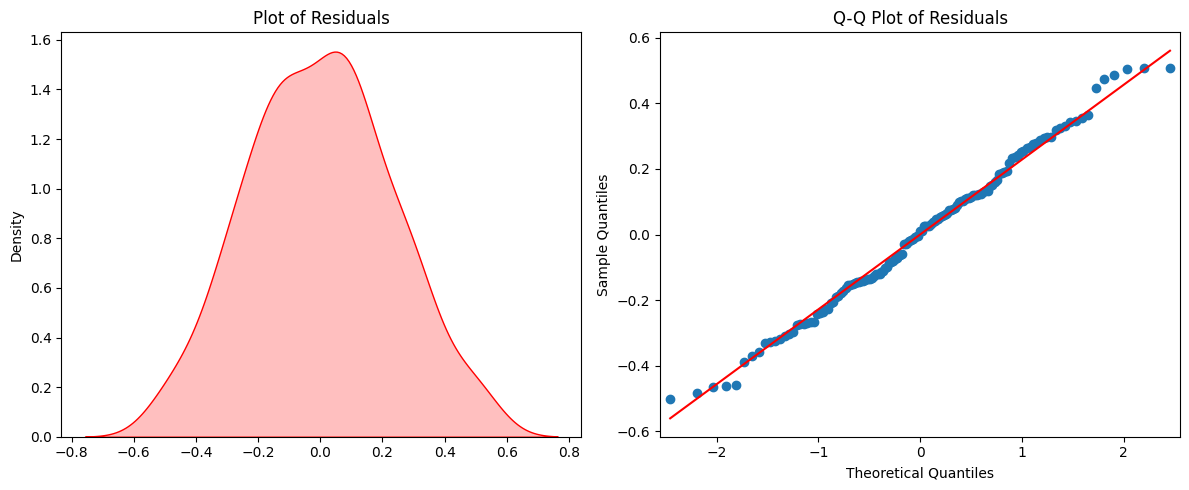

In [ ]:
import seaborn as sns
import statsmodels.api as sm

# Get residuals after fitting the model
residual_1 = model_1.resid

# Visualization: KDE plot and Q-Q plot for residuals
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# KDE plot for residuals with fill instead of shade
sns.kdeplot(residual_1, ax=ax[0], color='red', fill=True)
ax[0].set_title('Plot of Residuals')

# Q-Q plot
sm.qqplot(residual_1, line='s', ax=ax[1])
ax[1].set_title('Q-Q Plot of Residuals')

# Plotting the graphs below
plt.tight_layout()
plt.show()

In [ ]:
# Perform Shapiro-Wilk test on residuals
shapiro_resid = stats.shapiro(residual_1.dropna())

print(f'W: {round(shapiro_resid[0], 3)}, P-value: {round(shapiro_resid[1], 3)}')

W: 0.99, P-value: 0.38


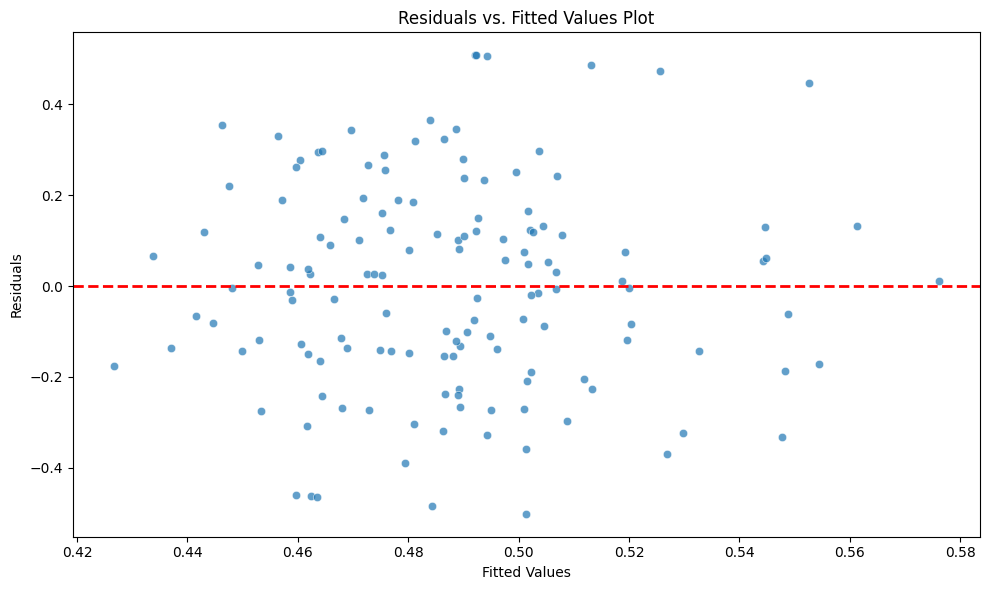

In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# Get the residuals and the fitted values
residual_1 = model_1.resid
fitted_value = model_1.fittedvalues

# Plot Residuals vs. Fitted Values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=fitted_value, y=residual_1, alpha=0.7)
# Line at zero as a reference
plt.axhline(0, color='red', linestyle='--', linewidth=2)
plt.title("Residuals vs. Fitted Values Plot")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.tight_layout()
plt.show()

**Section 1.4: COMBINING BLOCKING & CONTINUOUS COVARIATES, ANCOVA FOR BOTH, & ASSUMPTION CHECKS** <br>

><mark>**Assignment 2 - BONUS PART: Running another set of two-way ANOVAs with both the blocking factor and continuous covariates for parallel design subset of data.** <br>


In [ ]:
#-----------------------------------------------------------------ASSIGNMENT 2: BLOCKING USING MEMBERSHIP STATUS -----------------------------------------------------------------------#
# Setting the seed for reproducibility
np.random.seed(42)

# Define membership levels
membership_labels = ["Basic", "Silver", "Gold", "Platinum"]

# Assign random membership status to each participant
df["Membership_Status"] = np.random.choice(membership_labels, size=len(df), replace=True)

# Create a dictionary to store the participants by membership status
membership_samples = {}

# Loop through each membership level and randomly select 36 participants
for membership_level in membership_labels:
    selected = df[df["Membership_Status"] == membership_level].sample(n=36, random_state=42)
    membership_samples[membership_level] = selected

# Combine all selected participants into one DataFrame
selected_participants = pd.concat(membership_samples.values())

# Find remaining participants who were not selected
remaining_participants = df[~df["Participant ID"].isin(selected_participants["Participant ID"])]

# Randomly select 2 extra participants from the remaining ones
extra_participant = remaining_participants.sample(n=2, random_state=42)

# Randomly assign a membership status to the extra participants
extra_participant["Membership_Status"] = np.random.choice(membership_labels, size=2, replace=True)

# Add the extra participants to the selected participants
selected_participants = pd.concat([selected_participants, extra_participant])

# Resetting index to 0 while keeping the participant id the same from original dataset
selected_participants.reset_index(drop=True, inplace=True)

# Count how many participants are in each membership status
membership_counts = selected_participants["Membership_Status"].value_counts()

# Print out the number of participants in each membership status & display the dataframe
print(membership_counts)
print("\n")

selected_features = ["Participant ID", "Income", "Membership_Status"]
# Displaying the specific subset of selected participants
selected_participants[selected_features].head(10)

#-----------------------------------------------------------------ASSIGNMENT 2: BLOCKING USING MEMBERSHIP STATUS END -----------------------------------------------------------------------#

# Now we must randomly assign 73 participants to each of the 2 groups:
# Group 1: Buy One Get One Free
# Group 2: No Discount
parallel_conditions = [
    # Group 1: Buy one get one free
    ('Buy One Get One Free'),
    # Group 2: No Discount
    ('No Discount')]

# There will be 2 groups
num_groups_p = len(parallel_conditions)
# Based on the power analysis we will evenly split 73 individuals per group
group_size_p = len(selected_participants) // num_groups_p

# Initializing the list to store assigned treatment levels
treatment_assignments = []

# Randomly assign participants to groups by shuffling the IDs randomly
np.random.shuffle(selected_participants["Participant ID"].values)

# Assigning participants evenly to parallel design groups using a loop
for i in range(len(selected_participants)):
    # Cycling through the 2 groups in the given order
    group_index = i % num_groups_p
    # Getting the corresponding treatment levels
    treatment = parallel_conditions[group_index]
    # Appending the assigned treatment condition
    treatment_assignments.append(treatment)

# Adding the factor assignments to the DataFrame
selected_participants["DiscountType"] = treatment_assignments

# Now we will generate the dependent variables for this experiment specifically
n_samples = len(selected_participants)

# Initializing activity data and using zeros as placeholders
frequency_of_visits = np.zeros(n_samples)
frequency_of_made_purchase = np.zeros(n_samples)

# Define mean and standard deviation values for visit frequency based on treatment type
visit_mean_treatment, visit_std_treatment = 30, 10  # Higher expected visits for promotional offer
visit_mean_control, visit_std_control = 12, 5  # Lower expected visits without discount
purchase_std_factor = 0.5  # Standard deviation as a fraction of mean visits to account for variability

# Looping through each of the rows
for i in range(n_samples):
    treatments = treatment_assignments[i]

    if treatments == "Buy One Get One Free":
        frequency_of_visits[i] = max(0, int(np.random.normal(visit_mean_treatment, visit_std_treatment)))
    else:
        frequency_of_visits[i] = max(0, int(np.random.normal(visit_mean_control, visit_std_control)))

    purchase_mean = frequency_of_visits[i] * 0.5
    purchase_std = purchase_mean * purchase_std_factor
    frequency_of_made_purchase[i] = max(0, min(frequency_of_visits[i], int(np.random.normal(purchase_mean, purchase_std))))

# Calculating conversion rate: purchases made to visits (accounting for zero visits)
conversion_rate = np.divide(frequency_of_made_purchase, frequency_of_visits, where=frequency_of_visits > 0)
conversion_rate = np.nan_to_num(conversion_rate, nan=0, posinf=0, neginf=0)
conversion_rate = np.round(conversion_rate, 5)

# Rounding the values for the dependent variables
frequency_of_visits = np.round(frequency_of_visits, 2)
frequency_of_made_purchase = np.round(frequency_of_made_purchase, 2)

#--------------------------------------------------------------------- Assignment 2: Adding a New Covariate --------------------------------------------------------------------------#
time_multiplier = np.random.uniform(5, 30, n_samples)

# Adjust time multiplier for treatment groups
time_adjustment_factors = {
    'Buy One Get One Free': 1.5,  # Spend 50% more time on average
    'No Discount': 1.0  # Control group spends normal time
}

adjusted_time_multiplier = []

# Looping through each participant and adjusting their time multiplier based on treatment
for i in range(n_samples):
    treatment = treatment_assignments[i]
    adjusted_time = time_multiplier[i] * time_adjustment_factors[treatment]
    adjusted_time_multiplier.append(adjusted_time)

# Calculate the total time spent on the platform
length_of_time_spent = frequency_of_visits * adjusted_time_multiplier

# Convert time from minutes to hours
length_of_time_spent_in_hours = length_of_time_spent / 60

#----------------------------------------------------------------------------END of Adding New Covariate----------------------------------------------------------------------------#

# Creating the activity DataFrame
activity_data = pd.DataFrame({
    "Participant ID": selected_participants["Participant ID"],
    "Frequency of Visits": frequency_of_visits,
    "Frequency_of_Made_Purchase": frequency_of_made_purchase,
    "Conversion_Rate": conversion_rate
})

# Merging demographic and activity data together
df_parallel = selected_participants.merge(activity_data, on="Participant ID")

# Count the number of participants in each treatment group
treatment_counts = selected_participants["DiscountType"].value_counts()

# Print out the counts to ensure even distribution
print(treatment_counts)

print("\n")

# Adding the total time spent on platform (hours) to the DataFrame
df_parallel["Total_Time_Spent_On_Platform"] = np.round(length_of_time_spent_in_hours, 2)

# Displaying selected features
chosen_features = ['Participant ID', 'Age', 'Income', 'Membership_Status', 'DiscountType', 'Frequency of Visits', 'Frequency_of_Made_Purchase', 'Conversion_Rate', 'Total_Time_Spent_On_Platform']
df_parallel[chosen_features].head(10)

Membership_Status
Gold        37
Platinum    37
Basic       36
Silver      36
Name: count, dtype: int64


DiscountType
Buy One Get One Free    73
No Discount             73
Name: count, dtype: int64




Participant ID  Age  Income Membership_Status          DiscountType  \
0            7327   65   45144             Basic  Buy One Get One Free   
1            2023   64  124504             Basic           No Discount   
2             684   31  170487             Basic  Buy One Get One Free   
3             211   26    2124             Basic           No Discount   
4            3927   22   80647             Basic  Buy One Get One Free   
5            6167   56   78969             Basic           No Discount   
6            2622   49  151003             Basic  Buy One Get One Free   
7            8908   56  165541             Basic           No Discount   
8            5579   27  106751             Basic  Buy One Get One Free   
9            9359   57  177217             Basic           No Discount   

   Frequency of Visits  Frequency_of_Made_Purchase  Conversion_Rate  \
0                 38.0                        21.0          0.55263   
1                  9.0                         1.0          0.11111   
2                 37.0                        37.0          1.00000   
3                 12.0                         0.0          0.00000   
4                 34.0                        24.0          0.70588   
5                  7.0                         2.0          0.28571   
6                 22.0                         8.0          0.36364   
7                 11.0                         3.0          0.27273   
8                 17.0                         9.0          0.52941   
9                 11.0                         4.0          0.36364   

   Total_Time_Spent_On_Platform  
0                         21.90  
1                          1.40  
2                         17.27  
3                          4.57  
4                         13.70  
5                          0.66  
6                          8.93  
7                          2.28  
8                         12.00  
9                          1.49

**ANCOVA & SUMMARY STATISTICS:** <br>

> 'Age', 'Total_Time_Spent_On_Platform' are the two continuous covariates, Income_Level will be a categorical blocking factor, and DiscountType will be the categorical variable (i.e. treatment/control groups)<br>

>**SOURCE FOR ANCOVA CODE:** https://www.reneshbedre.com/blog/ancova.html

In [ ]:
#------------------------------------------------ TWO-WAY ANOVA FOR BLOCKING & COVARIATES ------------------------------------------------------------------------------------------#
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Create the formula without Income_Level
formula_2 = 'Q("Conversion_Rate") ~ Q("Age") + C(Q("Membership_Status")) + Q("Total_Time_Spent_On_Platform") + C(Q("DiscountType")) + \
             Q("Age"):C(Q("DiscountType")) + C(Q("Membership_Status")):C(Q("DiscountType")) + Q("Total_Time_Spent_On_Platform"):C(Q("DiscountType")) + \
             Q("Age"):C(Q("Membership_Status")) + C(Q("Membership_Status")):Q("Total_Time_Spent_On_Platform") + Q("Total_Time_Spent_On_Platform"):Q("Age")'

# Fit the model
model_2 = sm.formula.ols(formula_2, data=df_parallel).fit()

# Perform ANOVA and print the table
aov_table = sm.stats.anova_lm(model_2)
print(aov_table)
print(model_2.summary())
print('\n')

#------------------------------------------------ TWO-WAY ANOVA FOR BLOCKING & COVARIATES END------------------------------------------------------------------------------------------#

# Perform Tukey's HSD for DiscountType
tukey_results = pairwise_tukeyhsd(
    df_parallel['Conversion_Rate'],  # Use the correct column for Conversion_Rate
    df_parallel['DiscountType']
)

print("\nTukey HSD Test Results:")
print(tukey_results)

                                                       df    sum_sq   mean_sq  \
C(Q("Membership_Status"))                             3.0  0.350797  0.116932   
C(Q("DiscountType"))                                  1.0  0.222055  0.222055   
C(Q("Membership_Status")):C(Q("DiscountType"))        3.0  0.956536  0.318845   
Q("Age")                                              1.0  0.100878  0.100878   
Q("Age"):C(Q("DiscountType"))                         1.0  0.045252  0.045252   
Q("Age"):C(Q("Membership_Status"))                    3.0  0.124241  0.041414   
Q("Total_Time_Spent_On_Platform")                     1.0  0.195270  0.195270   
Q("Total_Time_Spent_On_Platform"):C(Q("Discount...    1.0  0.106243  0.106243   
C(Q("Membership_Status")):Q("Total_Time_Spent_O...    3.0  0.084291  0.028097   
Q("Total_Time_Spent_On_Platform"):Q("Age")            1.0  0.140604  0.140604   
Residual                                            127.0  7.219472  0.056846   

                           

**Checking Assumptions for COMBINED ANCOVA:**

> 1. IID: Independently & Identically distributed taken care of by random sampling.
2. Normality: Testing for normality of residuals after fitting the model using the Shapiro-Wilk test
3. Homoscedasticity: variances of the dependent variable should be approximately equal across the different groups using



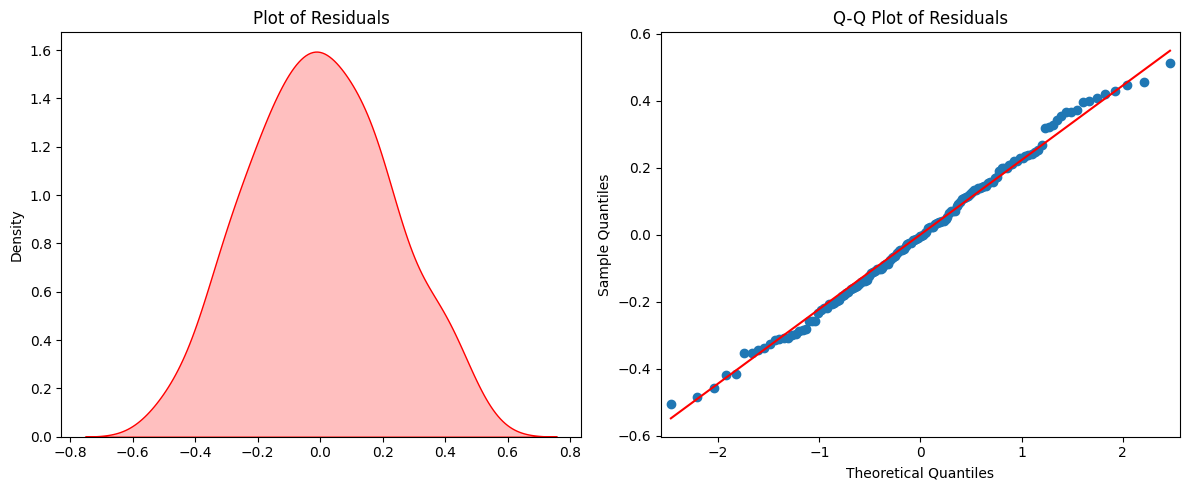

In [ ]:
import seaborn as sns
import statsmodels.api as sm

# Get residuals after fitting the model
residual_2 = model_2.resid

# Visualization: KDE plot and Q-Q plot for residuals
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# KDE plot for residuals with fill instead of shade
sns.kdeplot(residual_2, ax=ax[0], color='red', fill=True)
ax[0].set_title('Plot of Residuals')

# Q-Q plot
sm.qqplot(residual_2, line='s', ax=ax[1])
ax[1].set_title('Q-Q Plot of Residuals')

# Plotting the graphs below
plt.tight_layout()
plt.show()

In [ ]:
# Perform Shapiro-Wilk test on residuals
shapiro_residual = stats.shapiro(residual_2.dropna())

print(f'W: {round(shapiro_residual[0], 3)}, P-value: {round(shapiro_residual[1], 3)}')

W: 0.991, P-value: 0.488


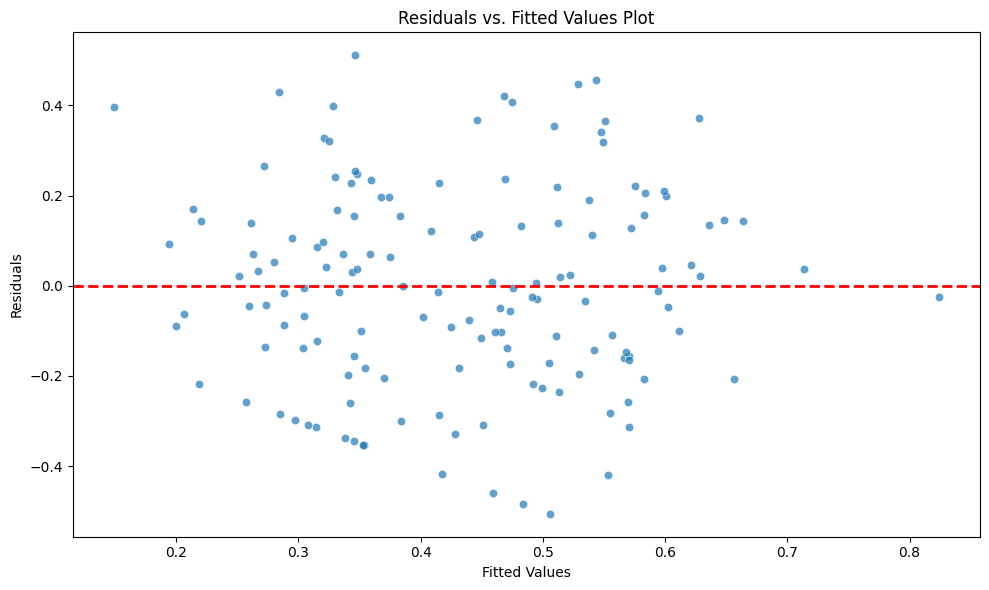

In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# Get the residuals and the fitted values
residual_2 = model_2.resid
fitted_value = model_2.fittedvalues

# Plot Residuals vs. Fitted Values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=fitted_value, y=residual_2, alpha=0.7)
# Line at zero as a reference
plt.axhline(0, color='red', linestyle='--', linewidth=2)
plt.title("Residuals vs. Fitted Values Plot")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.tight_layout()
plt.show()

Develop a flowchart for parallel design

In [ ]:
!pip install schemdraw
import schemdraw
from schemdraw import flow

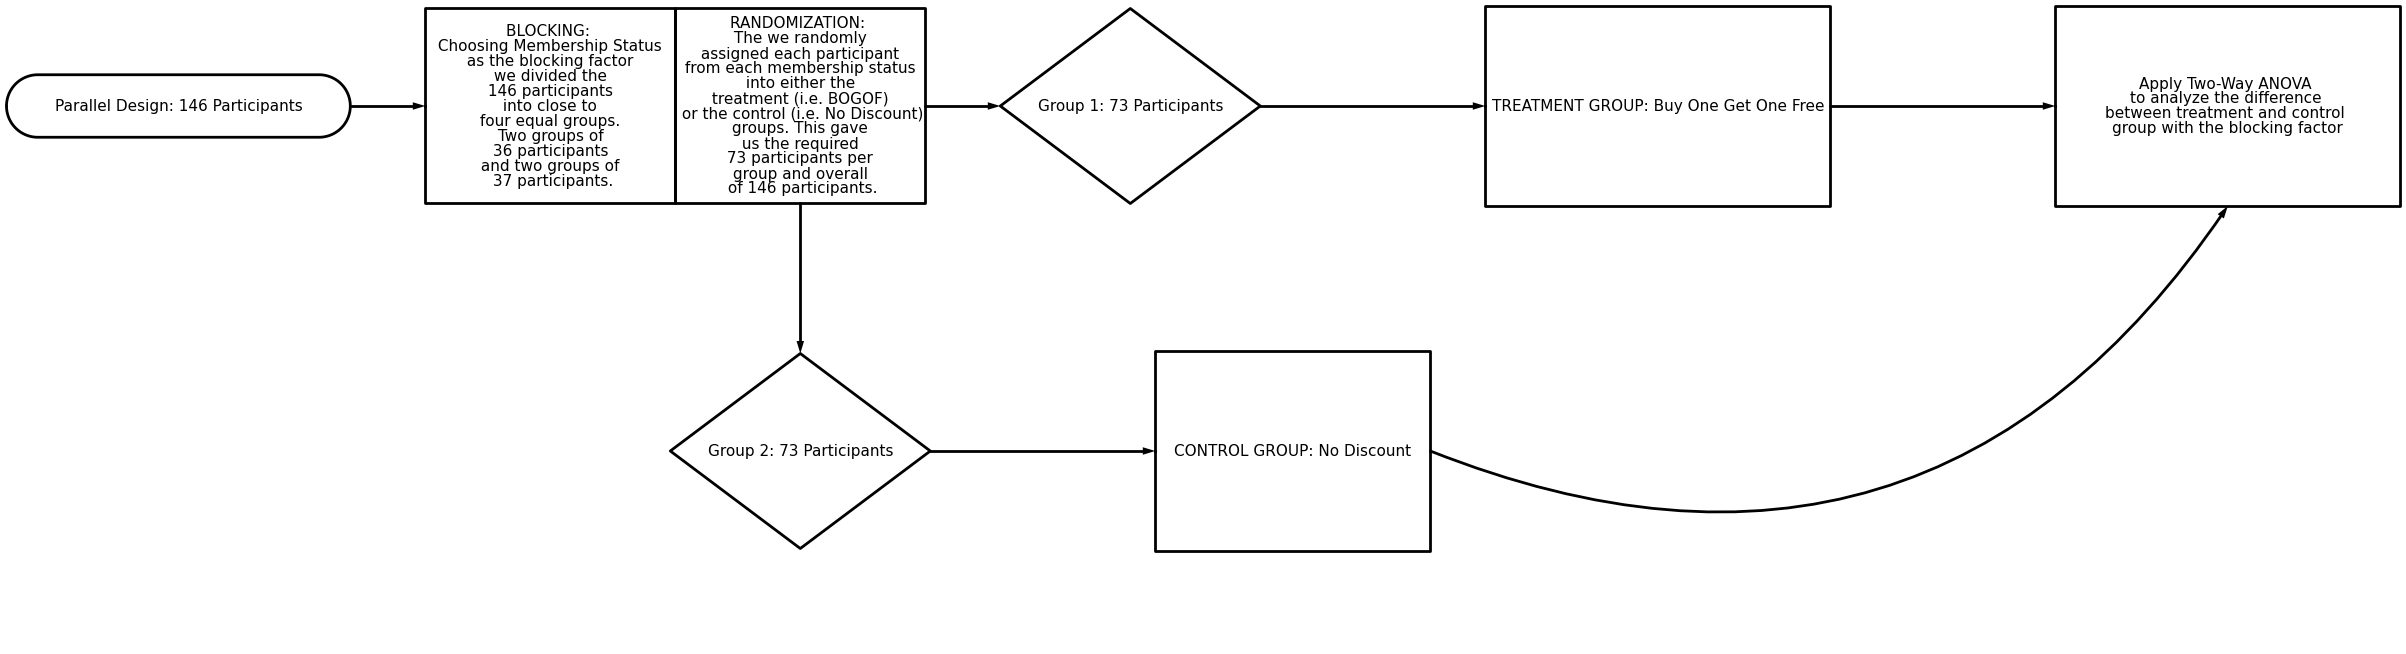

In [ ]:
with schemdraw.Drawing() as d:

    d.config(fontsize=11)
    b = flow.Start().label('Parallel Design: 146 Participants')
    flow.Arrow().right(d.unit/2).at(b.E)
    d0 = flow.Box(w=5, h=3.9).label('BLOCKING: \n Choosing Membership Status \n as the blocking factor \n we divided the \n 146 participants \n into close to \n four equal groups. \n Two groups of \n 36 participants \n and two groups of \n 37 participants.')
    d1 = flow.Box(w=5, h=3.9).label('RANDOMIZATION: \n The we randomly \n assigned each participant \n from each membership status \n into either the \n treatment (i.e. BOGOF) \n or the control (i.e. No Discount)\n groups. This gave \n us the required \n 73 participants per \n group and overall \n of 146 participants.')
    flow.Arrow().down(d.unit* 1).at(d1.S)
    d3 = flow.Decision(w=5.2, h=3.9).label('Group 2: 73 Participants')
    flow.Arrow().right(d.unit* 0.5).at(d1.E)
    d4 = flow.Decision(w=5.2, h=3.9).label('Group 1: 73 Participants')



    flow.Arrow().right(d.unit*1.5).at(d3.E)
    d6 = flow.Box(w=5.5, h=4.0 ).anchor('W').label('CONTROL GROUP: No Discount')
    flow.Arrow().right(d.unit*1.5).at(d4.E)
    d7 = flow.Box(w=6.9, h=4.0).anchor('W').label('TREATMENT GROUP: Buy One Get One Free')
    flow.Arrow().right(d.unit*1.5).at(d7.E)
    d8 = flow.Box(w=6.9, h=4.0).anchor('W').label('Apply Two-Way ANOVA \nto analyze the difference \nbetween treatment and control \ngroup with the blocking factor')
    flow.Arc2(k=-.4, arrow='->').at(d6.E).to(d8.S)


#--------------------- END OF PARALELL DESIGN CODE ----------------------------#

#**2. Cross-over Design**

**Section 2.1: Power Analysis, Sample Size, & Associated Graph** </br>
Effect Size: Medium (0.5)</br>
Sample Size: 76</br>
Dependent Variable: Average Order Value


In [ ]:
from statsmodels.stats.power import FTestAnovaPower
# Power Analysis for Cross Over Design Scenario
# Medium effect size
effect_size = 0.5
# Significance level
alpha = 0.05
# Power value
power = 0.85
# cross over design (2 groups)
number_groups = 2

# Creating a power analysis object
analysis = FTestAnovaPower()

# Calculating the required sample size per group
result = analysis.solve_power(effect_size=effect_size, k_groups=number_groups, alpha=alpha, power=power)

# Rounding to get integer sample size
required_sample_size_per_group = round(result)

# Total sample size required for the experiment
total_sample_size = required_sample_size_per_group * number_groups

# Output the result
print(f'Required sample size per group: {required_sample_size_per_group}')
print(f'Total sample size for all groups: {total_sample_size}')

Required sample size per group: 38
Total sample size for all groups: 76


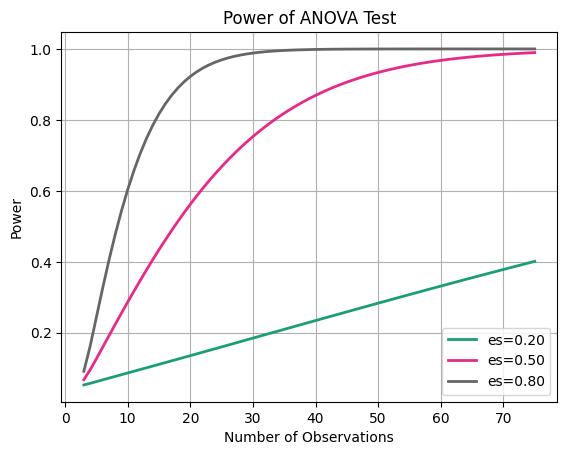

In [ ]:
# Power vs. number of observations
# Parameters for power analysis
effect_sizes = array([0.2, 0.5, 0.8]) # The larger the effect size, the less likely it is to be random error.
sample_sizes = array(range(2, 76))


# Calculate power curves from multiple power analyses.
# Assume a significance of 0.05 and explore the change in sample size between 2 and 100 with low (es=0.2), medium (es=0.5), and high effect (es=0.8)sizes.
analysis = FTestAnovaPower()
analysis.plot_power(dep_var='nobs', nobs=sample_sizes, effect_size=effect_sizes, alpha=0.05, title='Power of ANOVA Test')
pyplot.grid()
pyplot.ylabel('Power')
pyplot.show()

**Section 2.2: BLOCKING, TWO-WAY ANOVA, & ASSUMPTION CHECKS** <br>

><mark>**Assignment 2 - Blocking for crossover using Frequency in the past as blocking factor** <br>

> Frequent customer might be more willing to purchase, regardless of the promotion. <br>
Confounding Effect: If a specific promotion is used more often on frequent customer vs. another one on infrequent customer, the promotion's effect on average order value may be overestimated. <br>

In [ ]:
#-----------------------------------------------------------------ASSIGNMENT 2: BLOCKING USING INCOME LEVELS -----------------------------------------------------------------------#
# add blocking factor for cross-over design
# Setting the seed for reproducibility
np.random.seed(42)

# Define columns to keep in the subset DataFrame
columns_to_keep = ['Participant ID', 'Age', 'Gender', 'Location', 'Income', 'Frequency in the Past']

# Randomly select 38 participants for each of the two device types
selected_participants_frequent = df[df['Frequency in the Past'] == 'frequent'].sample(n=38, random_state=42)[columns_to_keep]
selected_participants_not_frequent= df[df['Frequency in the Past'] == 'not frequent'].sample(n=38, random_state=42)[columns_to_keep]

# Combine the selected participants into one DataFrame
selected_participants_crossover = pd.concat([selected_participants_frequent, selected_participants_not_frequent])

# Display the first 10 entries of the combined selected participants DataFrame
selected_participants_crossover.head()

Participant ID  Age  Gender   Location  Income Frequency in the Past
3938            3939   67    Male  Kitchener  157529              frequent
8060            8061   68  Female  Vancouver   30354              frequent
317              318   56    Male   Edmonton   10848              frequent
4335            4336   49  Female     London   15352              frequent
2813            2814   37    Male     London  183503              frequent

**Randomization for Cross Over Design After Blocking Done Above**

In [ ]:
# Set seed for reproducibility
np.random.seed(42)

# Split each frequency group evenly into two groups
group1_frequent = selected_participants_frequent.iloc[:19, :]
group2_frequent = selected_participants_frequent.iloc[19:, :]
group1_not_frequent = selected_participants_not_frequent.iloc[:19, :]
group2_not_frequent = selected_participants_not_frequent.iloc[19:, :]

# Combine the split groups to form the full Group 1 and Group 2
group1 = pd.concat([group1_frequent, group1_not_frequent]).reset_index(drop=True)
group2 = pd.concat([group2_frequent, group2_not_frequent]).reset_index(drop=True)

# Create entries for each stage and treatment in each group
# Group 1 participants
group1_stage1 = pd.DataFrame(group1)
group1_stage1['Stage'] = 'Stage 1'
group1_stage1['Treatment'] = 'Percentage Markdown'

group1_stage2 = pd.DataFrame(group1)
group1_stage2['Stage'] = 'Stage 2'
group1_stage2['Treatment'] = 'Buy One Get One Free'

# Group 2 participants
group2_stage1 = pd.DataFrame(group2)
group2_stage1['Stage'] = 'Stage 1'
group2_stage1['Treatment'] = 'Buy One Get One Free'

group2_stage2 = pd.DataFrame(group2)
group2_stage2['Stage'] = 'Stage 2'
group2_stage2['Treatment'] = 'Percentage Markdown'

# Combine stages for each group
group1_crossover = pd.concat([group1_stage1, group1_stage2])
group2_crossover = pd.concat([group2_stage1, group2_stage2])

# Combine both groups after assignment
crossover_df = pd.concat([group1_crossover, group2_crossover]).sort_values(['Participant ID', 'Stage']).reset_index(drop=True)

# Simulate purchases with higher values for specific conditions
def simulate_order_values(row):
    mean = 325  # This is an example mean, halfway between 1 and 600
    std_dev = 100  # This is an example standard deviation
    base_value = np.random.normal(loc=mean, scale=std_dev)
    if row['Frequency in the Past'] == 'frequent' or row['Treatment'] == 'Buy One Get One Free':
        return base_value * 1.5  # Increase the order value by 50% for this subgroup
    else:
        return base_value



# Apply the function to the DataFrame
crossover_df['Average Order Value'] = crossover_df.apply(simulate_order_values, axis=1)

# Output the DataFrame for the first 10 participants as a sample
crossover_df.head(10)



Participant ID  Age  Gender   Location  Income Frequency in the Past  \
0              54   63  Female     London  114982          not frequent   
1              54   63  Female     London  114982          not frequent   
2             116   24  Female    Toronto   65682          not frequent   
3             116   24  Female    Toronto   65682          not frequent   
4             141   49    Male    Toronto  159473          not frequent   
5             141   49    Male    Toronto  159473          not frequent   
6             318   56    Male   Edmonton   10848              frequent   
7             318   56    Male   Edmonton   10848              frequent   
8             449   32    Male  Kitchener  183630          not frequent   
9             449   32    Male  Kitchener  183630          not frequent   

     Stage             Treatment  Average Order Value  
0  Stage 1  Buy One Get One Free           562.007123  
1  Stage 2   Percentage Markdown           311.173570  
2  Stage 1   Percentage Markdown           389.768854  
3  Stage 2  Buy One Get One Free           715.954478  
4  Stage 1   Percentage Markdown           301.584663  
5  Stage 2  Buy One Get One Free           452.379456  
6  Stage 1   Percentage Markdown           724.381922  
7  Stage 2  Buy One Get One Free           602.615209  
8  Stage 1   Percentage Markdown           278.052561  
9  Stage 2  Buy One Get One Free           568.884007

**Violin Plot to Display the Distribution after the Blocking & Randomization for Cross Over Design**

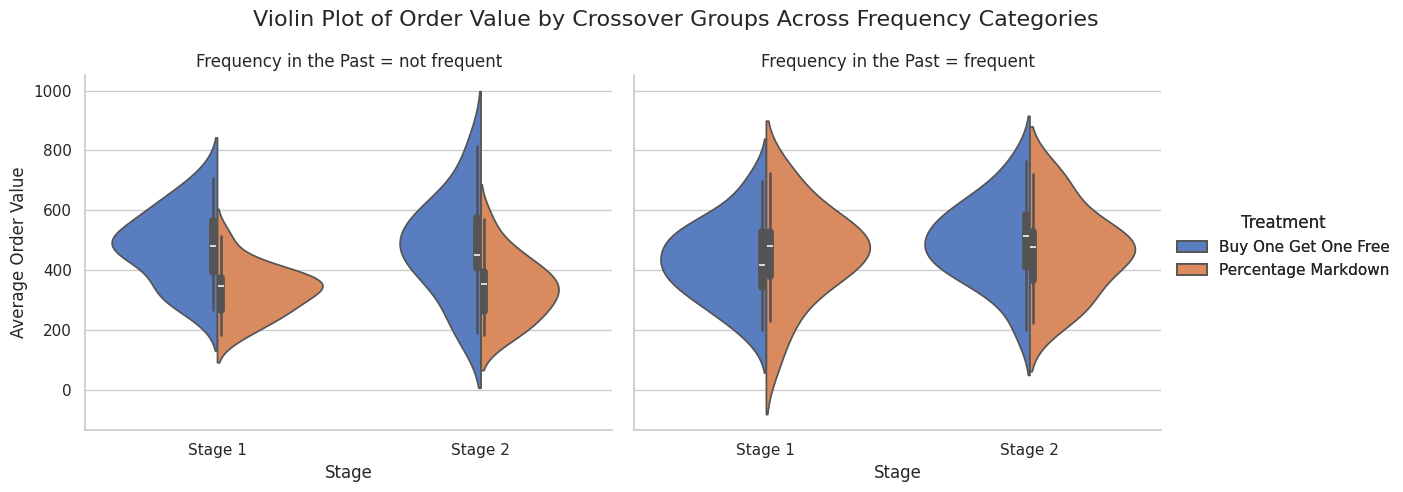

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

# Create a categorical plot with violin plot kind
g = sns.catplot(x="Stage", y="Average Order Value", hue="Treatment", col="Frequency in the Past",
                data=crossover_df, kind="violin", split=True, height=5, aspect=1,
                palette="muted", order=["Stage 1", "Stage 2"])

# Adding titles and labels
g.fig.suptitle('Violin Plot of Order Value by Crossover Groups Across Frequency Categories', fontsize=16, va='top')
g.set_axis_labels("Stage", "Average Order Value")
g.add_legend(title="Treatment")

# Adjusting subplots' spacing
g.fig.subplots_adjust(top=0.85)

# Displaying the plot
plt.show()


>**Checking for Normality of Dependent Variable: Average Order Value**

In [ ]:
from scipy import stats

# Perform Shapiro-Wilk test on Conversion_Rate and print result
shapiroUnem = stats.shapiro(crossover_df['Average Order Value'].dropna())

print(f'W: {round(shapiroUnem[0],3)}, P-value: {round(shapiroUnem[1],3)}')

W: 0.991, P-value: 0.424


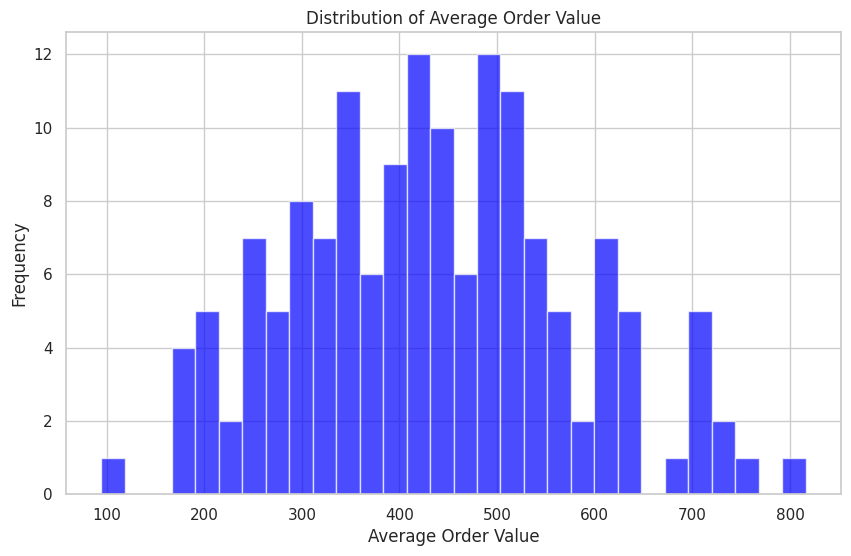

In [ ]:

# Create a histogram of the Average Order Value
plt.figure(figsize=(10, 6))  # Sets the figure size
plt.hist(crossover_df['Average Order Value'].dropna(), bins=30, color='blue', alpha=0.7)
plt.title('Distribution of Average Order Value')  # Adds a title to the histogram
plt.xlabel('Average Order Value')  # Label for the x-axis
plt.ylabel('Frequency')  # Label for the y-axis
plt.grid(True)  # Adds a grid for better readability
plt.show()  # Displays the plot


>**TWO-WAY ANOVA & SUMMARY STATISTICS: After blocking using Frequency in the past and then randomly assigning each participant into two groups we use two-way ANOVA to find the significance of the blocking factor based on the p-value**

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Define the formula for the model with control group ("No Discount") included in the 'Treatment Control' column of our dataframe
formula = 'Q("Average Order Value") ~ Q("Stage") + Q("Treatment") + Q("Frequency in the Past") + Q("Stage"):Q("Treatment") + Q("Stage"):Q("Frequency in the Past") + Q("Treatment"):Q("Frequency in the Past") + Q("Stage"):Q("Treatment"):Q("Frequency in the Past")'

# Fit the model using ordinary least squares (OLS)
model_crossover = ols(formula, data=crossover_df).fit()

# Perform the ANOVA and print the results
anova_table = sm.stats.anova_lm(model_crossover, typ=2)
print(anova_table)
print(model.summary())

                                                          sum_sq     df  \
Q("Stage")                                          1.240420e+04    1.0   
Q("Treatment")                                      2.097478e+05    1.0   
Q("Frequency in the Past")                          1.224245e+05    1.0   
Q("Stage"):Q("Treatment")                           4.121630e+03    1.0   
Q("Stage"):Q("Frequency in the Past")               9.301324e+03    1.0   
Q("Treatment"):Q("Frequency in the Past")           1.845506e+05    1.0   
Q("Stage"):Q("Treatment"):Q("Frequency in the P...  9.443475e+03    1.0   
Residual                                            2.511859e+06  144.0   

                                                            F    PR(>F)  
Q("Stage")                                           0.711109  0.400475  
Q("Treatment")                                      12.024433  0.000693  
Q("Frequency in the Past")                           7.018356  0.008969  
Q("Stage"):Q("Treatment")   

**Perform POST HOC test after the TWO WAY ANOVA**

In [ ]:
#------------------------------------------------------------------------------ TUKEY HSD TEST -----------------------------------------------------------------------------------------------#
# Perform Tukey's HSD for DiscountType
tukey_results_crossover = pairwise_tukeyhsd(
    crossover_df['Average Order Value'],
    crossover_df['Treatment']
)

print("\nTukey HSD Test Results:")
print(tukey_results_crossover)


Tukey HSD Test Results:
               Multiple Comparison of Means - Tukey HSD, FWER=0.05                
       group1               group2       meandiff p-adj    lower    upper   reject
----------------------------------------------------------------------------------
Buy One Get One Free Percentage Markdown -74.2945 0.0011 -118.5089 -30.0801   True
----------------------------------------------------------------------------------


**Checking Assumptions for Two-Way ANOVA:**
1. IID: Independently & Identically distributed taken care of by random sampling.
2. Normality: Testing for normality of residuals after fitting the model using the Shapiro-Wilk test
3. Homoscedasticity: variances of the dependent variable should be approximately equal across the different groups using

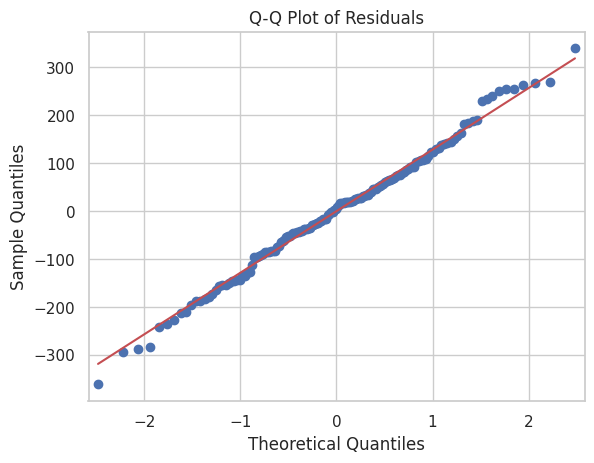

In [ ]:
residuals = model_crossover.resid
# Q-Q Plot to check for normality & heteroscedasticity
sm.qqplot(residuals, line='s')
plt.title('Q-Q Plot of Residuals')
plt.show()

**Section 2.3: CONTINUOUS COVARIATES, ANCOVA, & ASSUMPTION CHECKS** <br>

><mark>**Assignment 2 - Adding 1 Continuous Covariate. Using Age as the continuous covariate** <br>

In [ ]:
# Setting the seed for reproducibility: so that our analysis and conclusions consistent
np.random.seed(42)

# Select 76 unique random participants
unique_participants = df['Participant ID'].unique()
selected_participants = np.random.choice(unique_participants, 76, replace=False)

# Filter the DataFrame to keep only the selected participants
crossover_df = df[df['Participant ID'].isin(selected_participants)].copy()

#--------------------------------------------------------------------- Assignment 2: Adding a New Covariate --------------------------------------------------------------------------#
# Now only select the demographic features associated with each participant such as (Participant ID,	Age	Gender,	Location,	Income)
# Selecting the demographic features associated with each participant
demographic_features = ['Participant ID', 'Age', 'Gender', 'Location', 'Income']
# Filtering the DataFrame to include only the selected demographic features
# Also, making sure each participant is unique and only appears once
demographic_participant_df = crossover_df[demographic_features].drop_duplicates(subset='Participant ID').copy()

# Now we must randomly assign 38 participants to each of the 2 groups:
# Group 1: Stage1 Percentage Markdown + washout period + Stage2 Buy One Get One Free
# Group 2: Stage1 Buy One Get One Free + washout period + Stage2 Percentage Markdown

# Defining the group combinations based on above cross over design
crossover_conditions = [
    # Group 1 Stage 1: Stage1 Percentage Markdown
    ('Stage1', 'Percentage Markdown'),
    # Group 1 Staeg 2: Stage2 Buy One Get One Free
    ('Stage2', 'Buy One Get One Free'),
    # Group 2: Stage 1: Stage1 Buy One Get One Free
    ('Stage1', 'Buy One Get One Free'),
    # Group 2: Stage 2: Stage2 Percentage Markdown
    ('Stage2', 'Percentage Markdown')]

# There will be 2 groups
num_groups = 2
# Based on the power analysis we will evenly split 38 individuals per group
group_size = 38

# Randomly assign participants to two groups by shuffling the IDs
np.random.shuffle(demographic_participant_df['Participant ID'].values)

# Initializing arrays for treatment and stage assignments
stages = []
treatments = []

# Assign treatments and stages based on the crossover design
for i in range(len(demographic_participant_df)):
    if i < len(demographic_participant_df) / 2:
        # First half of the participants for Group 1
        stages += ['Stage 1', 'Stage 2']
        treatments += ['Percentage Markdown', 'Buy One Get One Free']
    else:
        # Second half for Group 2
        stages += ['Stage 1', 'Stage 2']
        treatments += ['Buy One Get One Free', 'Percentage Markdown']

# Duplicate each row in the demographic DataFrame for the crossover stages
crossover_df = pd.concat([demographic_participant_df]*2).sort_values('Participant ID').reset_index(drop=True)

# Assign stages and treatments to the crossover DataFrame
crossover_df['Stage'] = stages
crossover_df['Treatment'] = treatments

# Simulating purchases
n_samples = len(crossover_df)
average_order_value = np.random.uniform(20, 500, n_samples).round(2)

# Add purchase amount data to the DataFrame
crossover_df['Average Order Value'] = average_order_value

# Output the DataFrame for the first 10 participants as a sample
crossover_df.head()

Participant ID  Age  Gender   Location  Income    Stage  \
0              36   51    Male  Vancouver   39742  Stage 1   
1              36   51    Male  Vancouver   39742  Stage 2   
2              40   20    Male   Edmonton   87328  Stage 1   
3              40   20    Male   Edmonton   87328  Stage 2   
4             108   60  Female  Kitchener  163495  Stage 1   

              Treatment  Average Order Value  
0   Percentage Markdown               302.09  
1  Buy One Get One Free               449.98  
2   Percentage Markdown               333.53  
3  Buy One Get One Free               187.55  
4   Percentage Markdown               483.79

**ANCOVA & SUMMARY STATISTICS:** <br>

> 'Age'is the continuous covariates
Stage and Treatment will be the categorical variable (i.e. treatment/control groups)<br>

>**SOURCE FOR ANCOVA CODE:** https://www.reneshbedre.com/blog/ancova.html

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

continuous_covariate = ['Age']
# Define the formula for the model with control group ("No Discount") included in the 'Treatment Control' column of our dataframe
formula = 'Q("Average Order Value") ~ Q("Age") + C(Q("Treatment")) + C(Q("Stage")) + \
          Q("Age"):C(Q("Treatment")) + Q("Age"):C(Q("Stage")) + \
          C(Q("Treatment")):C(Q("Stage"))'

# Fit the model using ordinary least squares (OLS)
model_crossover_c = ols(formula, data=crossover_df).fit()

# Perform the ANCOVA and print the results
# Use typ=3 for Type III SS: used in ANCOVA because it tests the main effects and interactions, adjusting for the presence of other factors
anova_table = sm.stats.anova_lm(model_crossover_c, typ=3)
print(anova_table)
print(model_crossover_c.summary())


                                       sum_sq     df          F    PR(>F)
Intercept                        4.102038e+05    1.0  22.568555  0.000005
C(Q("Treatment"))                1.447186e+04    1.0   0.796212  0.373707
C(Q("Stage"))                    4.088595e+03    1.0   0.224946  0.636010
C(Q("Treatment")):C(Q("Stage"))  7.983695e+02    1.0   0.043925  0.834288
Q("Age")                         1.710882e+03    1.0   0.094129  0.759432
Q("Age"):C(Q("Treatment"))       1.142371e+04    1.0   0.628509  0.429198
Q("Age"):C(Q("Stage"))           1.909939e+02    1.0   0.010508  0.918494
Residual                         2.635506e+06  145.0        NaN       NaN
                               OLS Regression Results                               
Dep. Variable:     Q("Average Order Value")   R-squared:                       0.023
Model:                                  OLS   Adj. R-squared:                 -0.018
Method:                       Least Squares   F-statistic:                    0

**Perform POST HOC Test after ANCOVA**

In [ ]:
#------------------------------------------------------------------------------ TUKEY HSD TEST -----------------------------------------------------------------------------------------------#
# Perform Tukey's HSD for DiscountType
tukey_results_crossover = pairwise_tukeyhsd(
    crossover_df['Average Order Value'],
    crossover_df['Treatment']
)

print("\nTukey HSD Test Results:")
print(tukey_results_crossover)


Tukey HSD Test Results:
              Multiple Comparison of Means - Tukey HSD, FWER=0.05               
       group1               group2       meandiff p-adj   lower    upper  reject
--------------------------------------------------------------------------------
Buy One Get One Free Percentage Markdown -17.0616 0.4331 -59.9493 25.8262  False
--------------------------------------------------------------------------------


**Checking Assumptions for ANCOVA:**

> 1. IID: Independently & Identically distributed taken care of by random sampling.
2. Normality: Testing for normality of residuals after fitting the model using the Shapiro-Wilk test
3. Homoscedasticity: variances of the dependent variable should be approximately equal across the different groups using

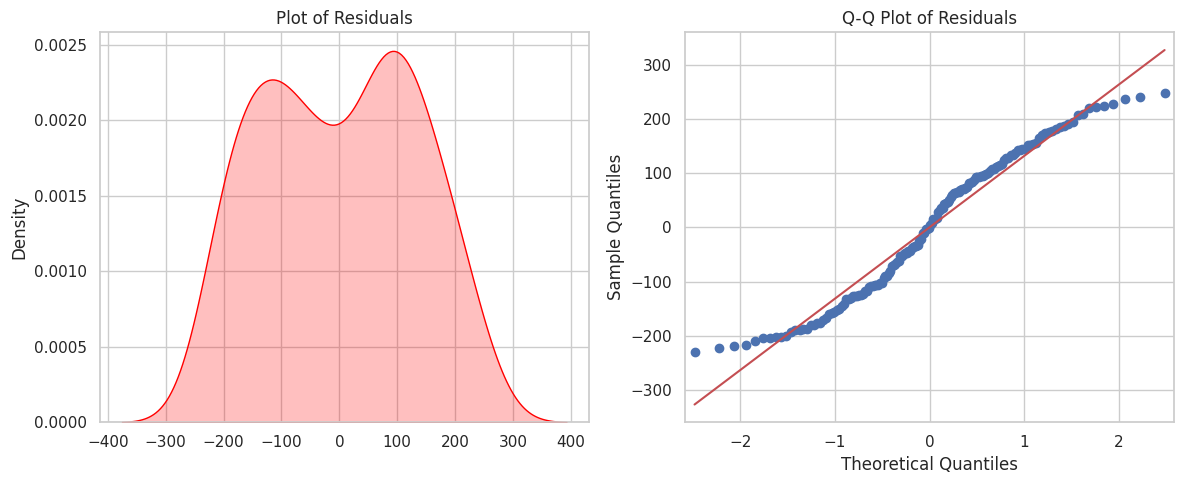

In [ ]:
# Get residuals after fitting the model
residual_crossover_c = model_crossover_c.resid

# Visualization: KDE plot and Q-Q plot for residuals
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# KDE plot for residuals with fill instead of shade
sns.kdeplot(residual_crossover_c, ax=ax[0], color='red', fill=True)
ax[0].set_title('Plot of Residuals')

# Q-Q plot
sm.qqplot(residual_crossover_c, line='s', ax=ax[1])
ax[1].set_title('Q-Q Plot of Residuals')

# Plotting the graphs below
plt.tight_layout()
plt.show()

In [ ]:
# Perform Shapiro-Wilk test on residuals
shapiro_resid = stats.shapiro(residual_crossover_c.dropna())

print(f'W: {round(shapiro_resid[0], 3)}, P-value: {round(shapiro_resid[1], 3)}')

W: 0.957, P-value: 0.0


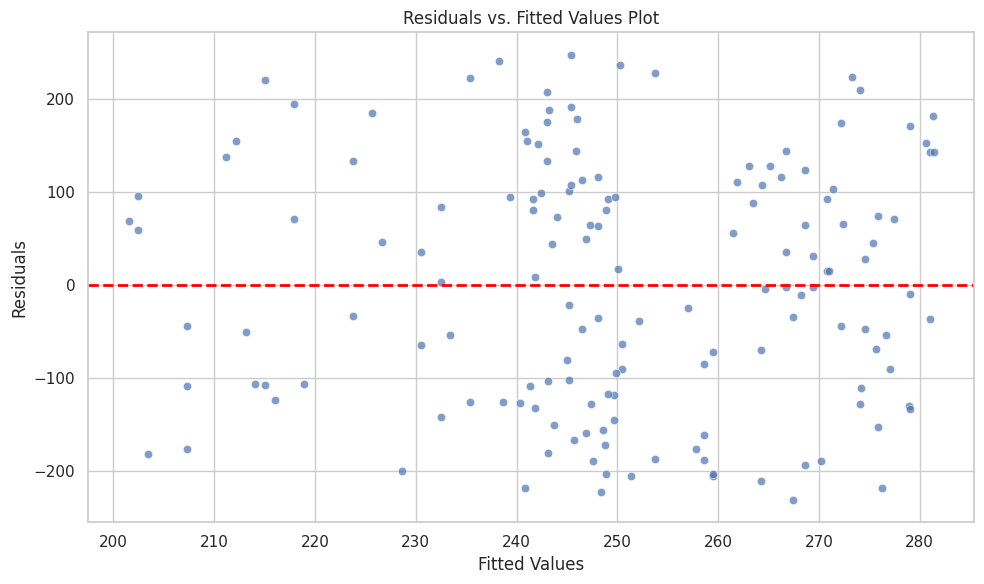

In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# Get the residuals and the fitted values
residual_crossover_c = model_crossover_c.resid
fitted_value = model_crossover_c.fittedvalues

# Plot Residuals vs. Fitted Values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=fitted_value, y=residual_crossover_c, alpha=0.7)
# Line at zero as a reference
plt.axhline(0, color='red', linestyle='--', linewidth=2)
plt.title("Residuals vs. Fitted Values Plot")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.tight_layout()
plt.show()

**Section 2.4: COMBINING BLOCKING & CONTINUOUS COVARIATES, ANCOVA FOR BOTH, & ASSUMPTION CHECKS** <br>

><mark>**Assignment 2 - BONUS PART: Running another set of two-way ANOVAs with both the blocking factor and continuous covariates for crossover design subset of data.** <br>

In [ ]:
#-----------------------------------------------------------------ASSIGNMENT 2: BLOCKING USING INCOME LEVELS -----------------------------------------------------------------------#
# add blocking factor for cross-over design
# Setting the seed for reproducibility
np.random.seed(42)

# Define columns to keep in the subset DataFrame
columns_to_keep = ['Participant ID', 'Age', 'Gender', 'Location', 'Income', 'Frequency in the Past']

# Randomly select 38 participants for each of the two device types
selected_participants_frequent = df[df['Frequency in the Past'] == 'frequent'].sample(n=38, random_state=42)[columns_to_keep]
selected_participants_not_frequent= df[df['Frequency in the Past'] == 'not frequent'].sample(n=38, random_state=42)[columns_to_keep]

# Combine the selected participants into one DataFrame
selected_participants_crossover = pd.concat([selected_participants_frequent, selected_participants_not_frequent])

# Display the first 10 entries of the combined selected participants DataFrame
selected_participants_crossover.head()

# Set seed for reproducibility
np.random.seed(42)

# Split each frequency group evenly into two groups
group1_frequent = selected_participants_frequent.iloc[:19, :]
group2_frequent = selected_participants_frequent.iloc[19:, :]
group1_not_frequent = selected_participants_not_frequent.iloc[:19, :]
group2_not_frequent = selected_participants_not_frequent.iloc[19:, :]

# Combine the split groups to form the full Group 1 and Group 2
group1 = pd.concat([group1_frequent, group1_not_frequent]).reset_index(drop=True)
group2 = pd.concat([group2_frequent, group2_not_frequent]).reset_index(drop=True)

# Create entries for each stage and treatment in each group
# Group 1 participants
group1_stage1 = pd.DataFrame(group1)
group1_stage1['Stage'] = 'Stage 1'
group1_stage1['Treatment'] = 'Percentage Markdown'

group1_stage2 = pd.DataFrame(group1)
group1_stage2['Stage'] = 'Stage 2'
group1_stage2['Treatment'] = 'Buy One Get One Free'

# Group 2 participants
group2_stage1 = pd.DataFrame(group2)
group2_stage1['Stage'] = 'Stage 1'
group2_stage1['Treatment'] = 'Buy One Get One Free'

group2_stage2 = pd.DataFrame(group2)
group2_stage2['Stage'] = 'Stage 2'
group2_stage2['Treatment'] = 'Percentage Markdown'

# Combine stages for each group
group1_crossover = pd.concat([group1_stage1, group1_stage2])
group2_crossover = pd.concat([group2_stage1, group2_stage2])

# Combine both groups after assignment
crossover_df = pd.concat([group1_crossover, group2_crossover]).sort_values(['Participant ID', 'Stage']).reset_index(drop=True)

# Simulate purchases with higher values for specific conditions
def simulate_order_values(row):
    mean = 325  # This is an example mean, halfway between 1 and 600
    std_dev = 100  # This is an example standard deviation
    base_value = np.random.normal(loc=mean, scale=std_dev)
    if row['Frequency in the Past'] == 'frequent' or row['Treatment'] == 'Buy One Get One Free':
        return base_value * 1.5  # Increase the order value by 50% for this subgroup
    else:
        return base_value



# Apply the function to the DataFrame
crossover_df['Average Order Value'] = crossover_df.apply(simulate_order_values, axis=1)

# Output the DataFrame for the first 10 participants as a sample
crossover_df.head(10)



Participant ID  Age  Gender   Location  Income Frequency in the Past  \
0              54   63  Female     London  114982          not frequent   
1              54   63  Female     London  114982          not frequent   
2             116   24  Female    Toronto   65682          not frequent   
3             116   24  Female    Toronto   65682          not frequent   
4             141   49    Male    Toronto  159473          not frequent   
5             141   49    Male    Toronto  159473          not frequent   
6             318   56    Male   Edmonton   10848              frequent   
7             318   56    Male   Edmonton   10848              frequent   
8             449   32    Male  Kitchener  183630          not frequent   
9             449   32    Male  Kitchener  183630          not frequent   

     Stage             Treatment  Average Order Value  
0  Stage 1  Buy One Get One Free           562.007123  
1  Stage 2   Percentage Markdown           311.173570  
2  Stage 1   Percentage Markdown           389.768854  
3  Stage 2  Buy One Get One Free           715.954478  
4  Stage 1   Percentage Markdown           301.584663  
5  Stage 2  Buy One Get One Free           452.379456  
6  Stage 1   Percentage Markdown           724.381922  
7  Stage 2  Buy One Get One Free           602.615209  
8  Stage 1   Percentage Markdown           278.052561  
9  Stage 2  Buy One Get One Free           568.884007

**ANCOVA & SUMMARY STATISTICS:** <br>

> 'Age' is the continuous covariates, Frequency in the past will be a categorical blocking factor, and Stage and Treatment will be the categorical variable (i.e. treatment/control groups)<br>

>**SOURCE FOR ANCOVA CODE:** https://www.reneshbedre.com/blog/ancova.html

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Assuming 'df' is your DataFrame already loaded with the necessary data

# Create model
formula = 'Q("Average Order Value") ~ Q("Age") + C(Q("Frequency in the Past")) + C(Q("Stage")) + C(Q("Treatment")) + \
           Q("Age"):C(Q("Stage")) + Q("Age"):C(Q("Treatment")) + \
           C(Q("Frequency in the Past")):C(Q("Stage")) + C(Q("Frequency in the Past")):C(Q("Treatment")) + \
           C(Q("Stage")):C(Q("Treatment")) + \
           Q("Age"):C(Q("Frequency in the Past"))'

# Fit the model using ordinary least squares (OLS)
model_crossover_2 = sm.formula.ols(formula, data=crossover_df).fit()

# Perform ANOVA and print the table
anova_table = sm.stats.anova_lm(model_crossover_2, typ=2)  # Using Type II SS
print(anova_table)

# Print a detailed summary of the model
print(model_crossover_2.summary())


                                                       sum_sq     df  \
C(Q("Frequency in the Past"))                    1.360021e+05    1.0   
C(Q("Stage"))                                    1.244790e+04    1.0   
C(Q("Treatment"))                                2.128120e+05    1.0   
C(Q("Frequency in the Past")):C(Q("Stage"))      1.609882e+04    1.0   
C(Q("Frequency in the Past")):C(Q("Treatment"))  1.447538e+05    1.0   
C(Q("Stage")):C(Q("Treatment"))                  1.714812e+03    1.0   
Q("Age")                                         1.361534e+04    1.0   
Q("Age"):C(Q("Stage"))                           1.026516e+04    1.0   
Q("Age"):C(Q("Treatment"))                       8.882990e+02    1.0   
Q("Age"):C(Q("Frequency in the Past"))           5.085067e+04    1.0   
Residual                                         2.446147e+06  141.0   

                                                         F    PR(>F)  
C(Q("Frequency in the Past"))                     7.839388  0.00

**Perform POST HOC Tukey's HSD test after TWO WAY ANOVA test**

In [ ]:
#------------------------------------------------------------------------------ TUKEY HSD TEST -----------------------------------------------------------------------------------------------#
# Perform Tukey's HSD for DiscountType
tukey_results_crossover = pairwise_tukeyhsd(
    crossover_df['Average Order Value'],
    crossover_df['Treatment']
)

print("\nTukey HSD Test Results:")
print(tukey_results_crossover)


Tukey HSD Test Results:
               Multiple Comparison of Means - Tukey HSD, FWER=0.05                
       group1               group2       meandiff p-adj    lower    upper   reject
----------------------------------------------------------------------------------
Buy One Get One Free Percentage Markdown -74.2945 0.0011 -118.5089 -30.0801   True
----------------------------------------------------------------------------------


**Checking Assumptions for COMBINED ANCOVA:**

> 1. IID: Independently & Identically distributed taken care of by random sampling.
2. Normality: Testing for normality of residuals after fitting the model using the Shapiro-Wilk test
3. Homoscedasticity: variances of the dependent variable should be approximately equal across the different groups using

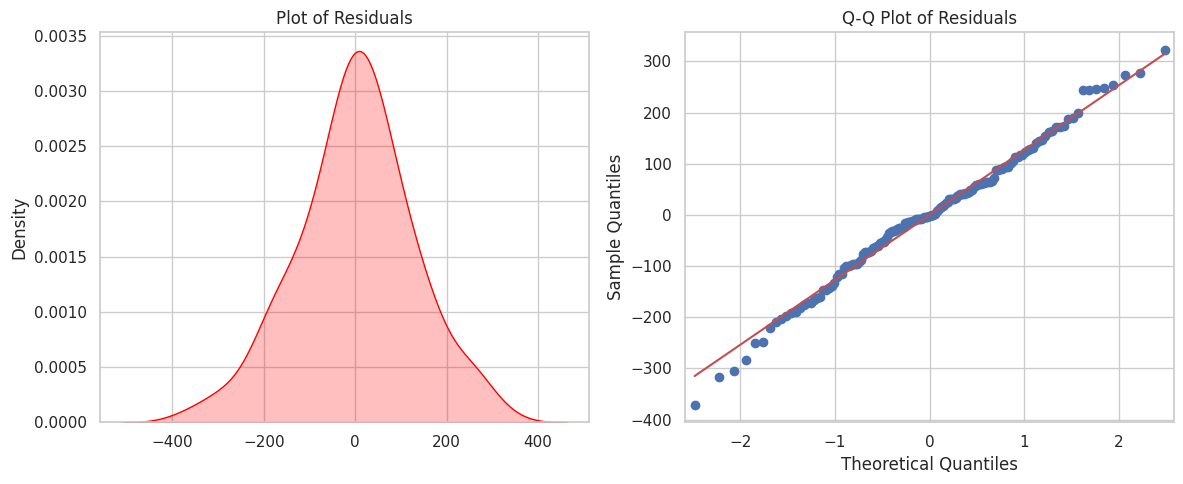

In [ ]:
import seaborn as sns
import statsmodels.api as sm

# Get residuals after fitting the model
residual_crossover_2 = model_crossover_2.resid

# Visualization: KDE plot and Q-Q plot for residuals
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# KDE plot for residuals with fill instead of shade
sns.kdeplot(residual_crossover_2, ax=ax[0], color='red', fill=True)
ax[0].set_title('Plot of Residuals')

# Q-Q plot
sm.qqplot(residual_crossover_2, line='s', ax=ax[1])
ax[1].set_title('Q-Q Plot of Residuals')

# Plotting the graphs below
plt.tight_layout()
plt.show()

In [ ]:
# Perform Shapiro-Wilk test on residuals
shapiro_residual = stats.shapiro(residual_crossover_2.dropna())

print(f'W: {round(shapiro_residual[0], 3)}, P-value: {round(shapiro_residual[1], 3)}')

W: 0.992, P-value: 0.611


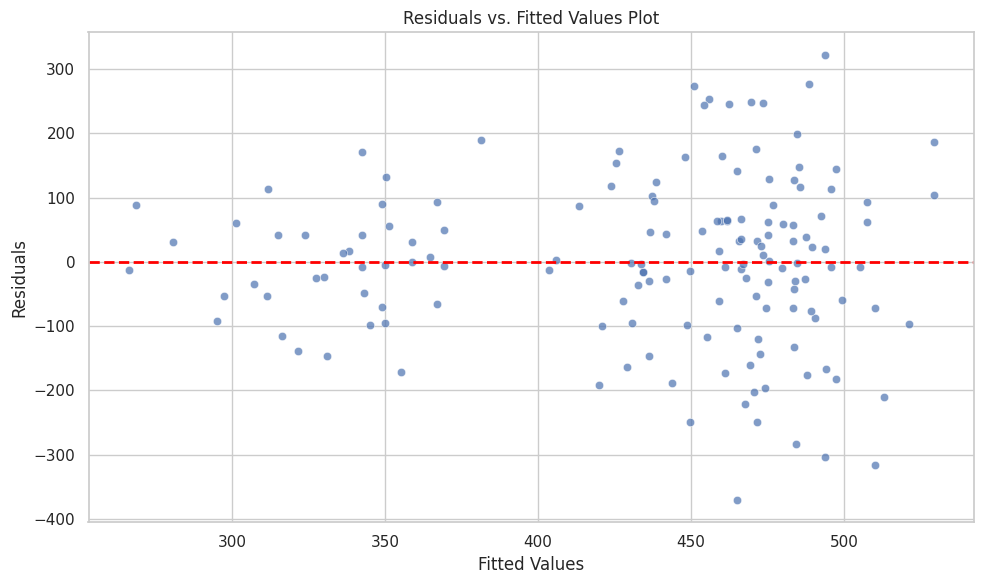

In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# Get the residuals and the fitted values
residual_crossover_2 = model_crossover_2.resid
fitted_value = model_crossover_2.fittedvalues

# Plot Residuals vs. Fitted Values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=fitted_value, y=residual_crossover_2, alpha=0.7)
# Line at zero as a reference
plt.axhline(0, color='red', linestyle='--', linewidth=2)
plt.title("Residuals vs. Fitted Values Plot")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.tight_layout()
plt.show()

**Flowchart for crossover design with the blocking factor**

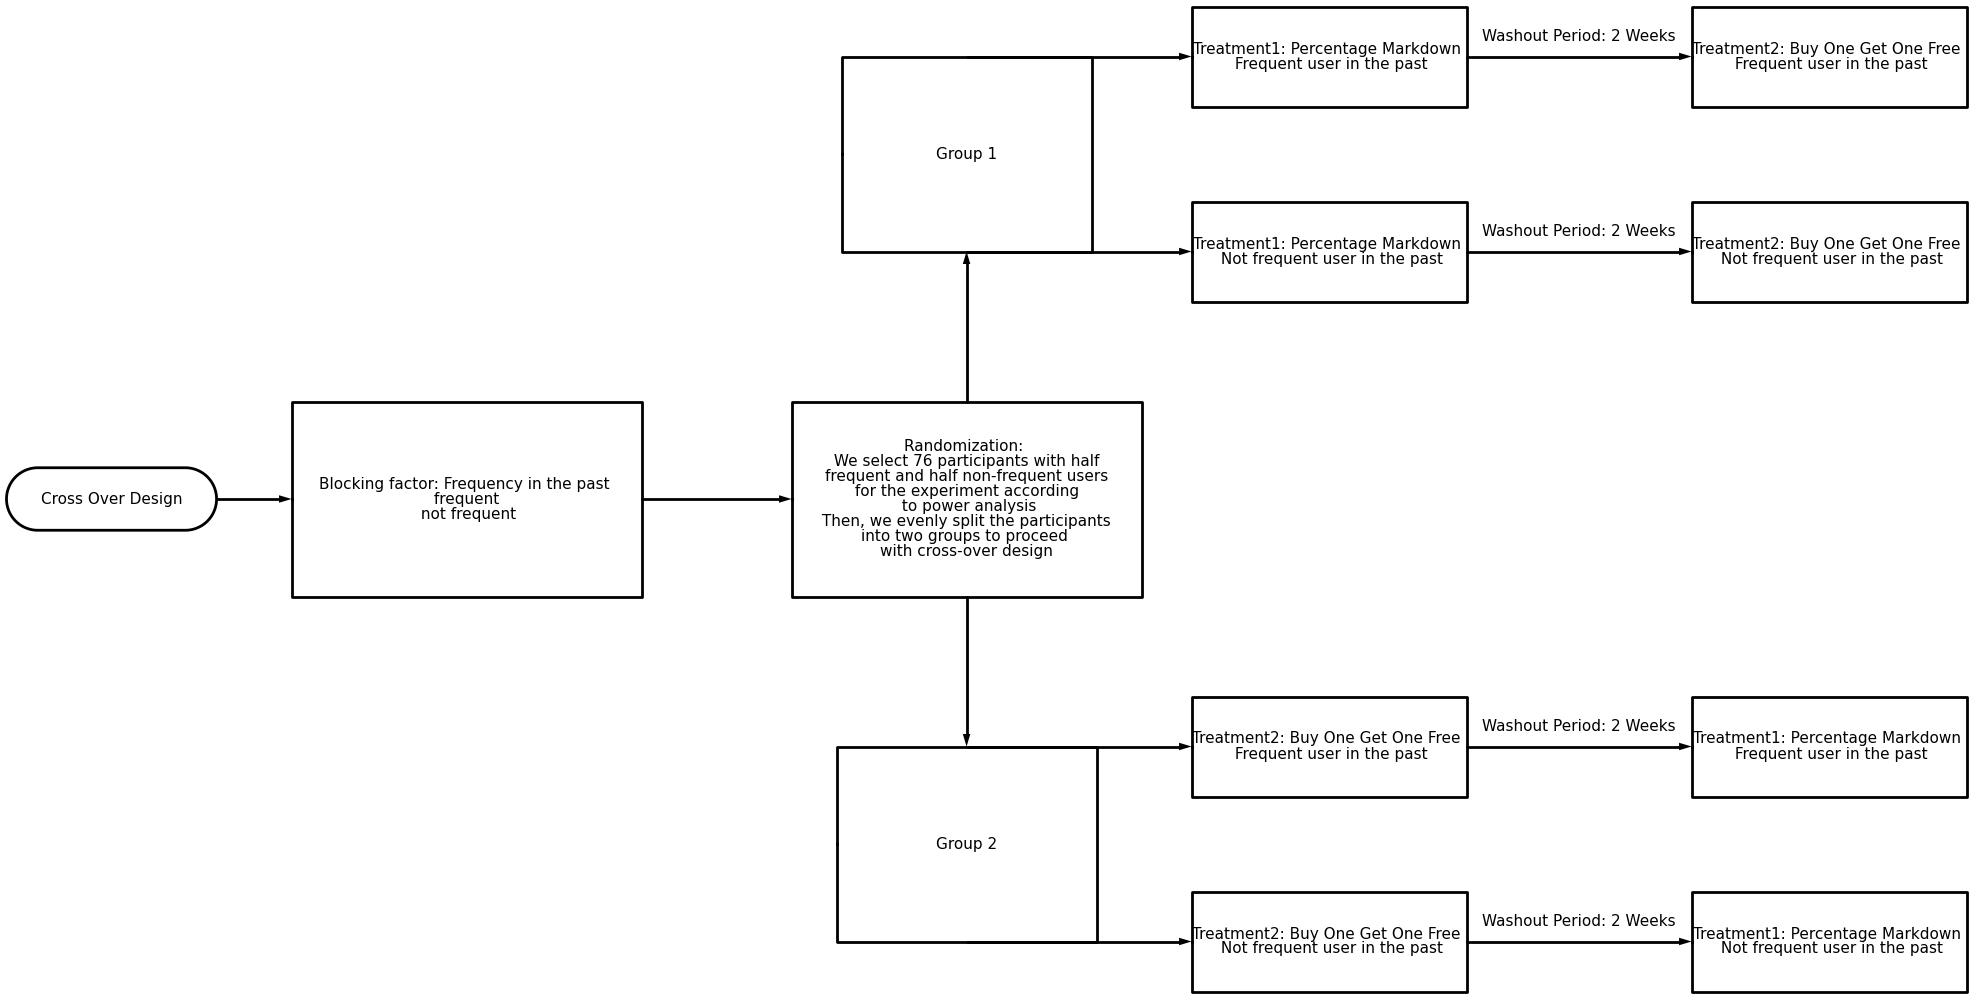

In [ ]:
with schemdraw.Drawing() as d:

    d.config(fontsize=11)
    b = flow.Start().label('Cross Over Design')
    flow.Arrow().right(d.unit/2).at(b.E)
    d1 = flow.Box(w=7, h=3.9).label('Blocking factor: Frequency in the past \n frequent \n not frequent')
    flow.Arrow().right(d.unit* 1).at(d1.E)
    d1 = flow.Box(w=7, h=3.9).label('Randomization: \n We select 76 participants with half \nfrequent and half non-frequent users\n for the experiment according \n to power analysis\n Then, we evenly split the participants \ninto two groups to proceed \nwith cross-over design')
    flow.Arrow().up(d.unit* 1).at(d1.N)
    d2 = flow.Box(w=5, h=3.9).label('Group 1')
    flow.Arrow().down(d.unit* 1).at(d1.S)
    d3 = flow.Box(w=5.2, h=3.9).label('Group 2')

    flow.Arrow().right(d.unit*1.5).at(d2.N)
    d5 = flow.Box(w=5.5, h=2.0).anchor('W').label('Treatment1: Percentage Markdown \n Frequent user in the past')
    flow.Arrow().right(d.unit*1.5).at(d3.N)
    d6 = flow.Box(w=5.5, h=2.0 ).anchor('W').label('Treatment2: Buy One Get One Free \n Frequent user in the past')

    flow.Arrow().right(d.unit*1.5).at(d2.S)
    d10 = flow.Box(w=5.5, h=2.0).anchor('W').label('Treatment1: Percentage Markdown \n Not frequent user in the past')

    flow.Arrow().right(d.unit*1.5).at(d3.S)
    d11 = flow.Box(w=5.5, h=2.0 ).anchor('W').label('Treatment2: Buy One Get One Free \n Not frequent user in the past')


    flow.Arrow().right(d.unit*1.5).at(d5.E).label('Washout Period: 2 Weeks')
    d5 = flow.Box(w=5.5, h=2.0).anchor('W').label('Treatment2: Buy One Get One Free \n Frequent user in the past')

    flow.Arrow().right(d.unit*1.5).at(d10.E).label('Washout Period: 2 Weeks')
    d5 = flow.Box(w=5.5, h=2.0).anchor('W').label('Treatment2: Buy One Get One Free \n Not frequent user in the past')

    flow.Arrow().right(d.unit*1.5).at(d6.E).label('Washout Period: 2 Weeks')
    d6 = flow.Box(w=5.5, h=2.0 ).anchor('W').label('Treatment1: Percentage Markdown \n Frequent user in the past')

    flow.Arrow().right(d.unit*1.5).at(d11.E).label('Washout Period: 2 Weeks')
    d6 = flow.Box(w=5.5, h=2.0 ).anchor('W').label('Treatment1: Percentage Markdown \n Not frequent user in the past')



# --------------------- END OF CROSSOVER DESIGN CODE ----------------------------

#**3. Withdrawal Design** <br>

**Section 3.1: Power Analysis, Sample Size, & Associated Graph** </br>
Effect Size: Small (0.5)</br>
Power: 0.85 <br>
Sample Size: 76</br>
dependent variable: session duration



In [ ]:
# Power Analysis for Withdrawal Design Scenario
# Medium effect size
effect_size = 0.5
# Significance level
alpha = 0.05
# Power value
power = 0.85
# withdrawal design (2 groups)
number_groups = 2

# Creating a power analysis object
analysis = FTestAnovaPower()

# Calculating the required sample size per group
result = analysis.solve_power(effect_size=effect_size, k_groups=number_groups, alpha=alpha, power=power)

# Rounding to get integer sample size
required_sample_size_per_group = round(result)

# Total sample size required for the experiment
total_sample_size = required_sample_size_per_group * number_groups

# Output the result
print(f'Required sample size per group: {required_sample_size_per_group}')
print(f'Total sample size for all groups: {total_sample_size}')



Required sample size per group: 38
Total sample size for all groups: 76


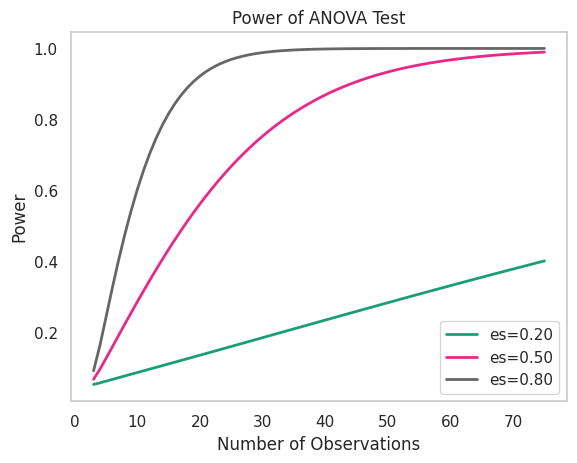

In [ ]:
# Power vs. number of observations
# Parameters for power analysis
effect_sizes = array([0.2, 0.5, 0.8]) # The larger the effect size, the less likely it is to be random error.
sample_sizes = array(range(2, 76))


# Calculate power curves from multiple power analyses.
# Assume a significance of 0.05 and explore the change in sample size between 2 and 100 with low (es=0.2), medium (es=0.5), and high effect (es=0.8)sizes.
analysis = FTestAnovaPower()
analysis.plot_power(dep_var='nobs', nobs=sample_sizes, effect_size=effect_sizes, alpha=0.05, title='Power of ANOVA Test')
pyplot.grid()
pyplot.ylabel('Power')
pyplot.show()

**Section 3.2: BLOCKING, TWO-WAY ANOVA, & ASSUMPTION CHECKS** <br>

><mark>**Assignment 2 - Blocking for withdrawal design using Device Type as blocking factor** <br>

> Mobile user customers might be more willing to stay longer to browse item and purchase online, regardless of the promotion. <br>
Confounding Effect: If a specific promotion is used more often on mobile user vs. another one one desktop user, the promotion's effect on session duration may be overestimated. <br>

In [ ]:
#-----------------------------------------------------------------ASSIGNMENT 2: BLOCKING USING INCOME LEVELS -----------------------------------------------------------------------#
# Setting the seed for reproducibility
np.random.seed(42)

# Define the device types of interest (assuming Mobile and Desktop are the device types of interest)
device_types_of_interest = ['Mobile', 'Desktop']

# Filtering the DataFrame for the device types of interest
filtered_df = df[df['Device Type'].isin(device_types_of_interest)]

# Define columns to keep in the subset DataFrame
columns_to_keep = ['Participant ID', 'Age', 'Gender', 'Location', 'Income', 'Device Type']

# Randomly select 38 participants for each of the two device types
selected_participants_mobile = filtered_df[filtered_df['Device Type'] == 'Mobile'].sample(n=38, random_state=42)[columns_to_keep]
selected_participants_desktop = filtered_df[filtered_df['Device Type'] == 'Desktop'].sample(n=38, random_state=42)[columns_to_keep]

# Combine the selected participants into one DataFrame
selected_participants = pd.concat([selected_participants_mobile, selected_participants_desktop])

# Display the first 10 entries of the combined selected participants DataFrame
selected_participants.head()


Participant ID  Age  Gender   Location  Income Device Type
9442            9443   18  Female     Ottawa  134333      Mobile
436              437   34    Male     Ottawa   16100      Mobile
1335            1336   42    Male     Regina   28934      Mobile
639              640   52  Female  Vancouver   39912      Mobile
9034            9035   53    Male   Winnipeg   83397      Mobile

**Randomization for Withdrawal Design After Blocking Done Above**

In [ ]:
# Defining the t based on design
withdrawal_conditions = ['Control', 'Treatment']

# Shuffle within each device type and assign 'Control' or 'Treatment' evenly
def assign_treatments(group):
    treatments = ['Control', 'Treatment'] * (len(group) // 2)  # This creates an equal number of 'Control' and 'Treatment'
    np.random.shuffle(treatments)
    group['Treatment'] = treatments
    return group

selected_participants = selected_participants.groupby('Device Type').apply(assign_treatments).reset_index(drop=True)

# Simulating session duration
selected_participants['Session Duration'] = np.where(
    selected_participants['Treatment'] == 'Treatment',
    # Longer duration for treatment group
    np.random.uniform(500, 1000, len(selected_participants)),
    # Shorter duration for control group
    np.random.uniform(300, 800, len(selected_participants))
).round(2)

# Output the DataFrame for the first 10 participants as a sample
selected_participants.head()


<ipython-input-54-ab8128017ec4>:11: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  selected_participants = selected_participants.groupby('Device Type').apply(assign_treatments).reset_index(drop=True)


Participant ID  Age  Gender   Location  Income Device Type  Treatment  \
0             891   45  Female     Ottawa   21256     Desktop  Treatment   
1            8112   31  Female  Kitchener   53313     Desktop    Control   
2            6914   25    Male     London   28078     Desktop    Control   
3            1271   24    Male     Regina   90127     Desktop  Treatment   
4            1415   50  Female  Saskatoon   73834     Desktop    Control   

   Session Duration  
0            724.88  
1            382.33  
2            567.04  
3            863.64  
4            646.22

>**Violin Plot to Display the Distribution after the Blocking & Randomization for Withdrawal Design**

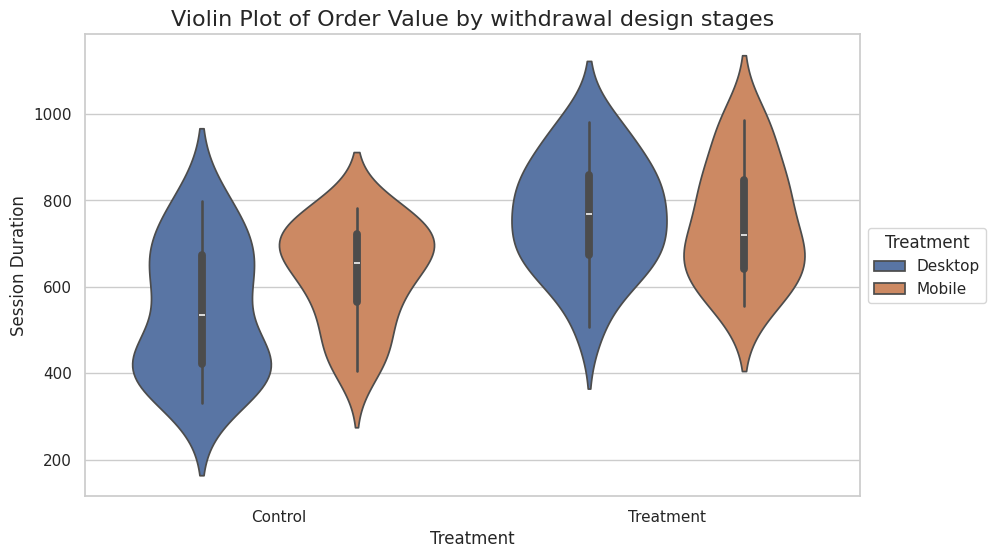

In [ ]:
# Plotting the violin plot for session duration
plt.figure(figsize=(10, 6))
sns.violinplot(x="Treatment", y="Session Duration", data=selected_participants, order = ['Control', 'Treatment'], hue="Device Type",legend=True)

# Adding the titles and labels to the plot
plt.title('Violin Plot of Order Value by withdrawal design stages', fontsize=16)
plt.xlabel('Treatment', fontsize=12)
plt.ylabel('Session Duration', fontsize=12)
plt.legend(title='Treatment', loc='center left', bbox_to_anchor=(1, 0.5))

# Displaying the plot
plt.show()

**Checking for Normality of Dependent Variable: Session Duration**

In [ ]:
from scipy import stats

# Perform Shapiro-Wilk test on Conversion_Rate and print result
shapiroUnem = stats.shapiro(selected_participants['Session Duration'].dropna())

print(f'W: {round(shapiroUnem[0],3)}, P-value: {round(shapiroUnem[1],3)}')

W: 0.976, P-value: 0.167


>**TWO-WAY ANOVA & SUMMARY STATISTICS: After blocking using Device Type and then randomly assigning each participant into two groups we use two-way ANOVA to find the significance of the blocking factor based on the p-value**

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Define the formula for the model with control group ("No Discount") included in the 'Treatment Control' column of our dataframe
formula = 'Q("Session Duration") ~ Q("Treatment") + Q("Device Type") + \
          Q("Age") + Q("Treatment"):Q("Device Type") + \
          Q("Age"):Q("Treatment") + Q("Age"):Q("Device Type")'

# Fit the model using ordinary least squares (OLS)
model_withdrawal = ols(formula, data=selected_participants).fit()

# Perform the ANOVA and print the results
anova_table = sm.stats.anova_lm(model_withdrawal, typ=2)
print(anova_table)
print(model_withdrawal.summary())

                                       sum_sq    df          F    PR(>F)
Q("Treatment")                   4.198602e+05   1.0  23.988874  0.000006
Q("Device Type")                 3.374917e+04   1.0   1.928271  0.169414
Q("Treatment"):Q("Device Type")  8.214845e+04   1.0   4.693583  0.033732
Q("Age")                         1.263208e+04   1.0   0.721739  0.398512
Q("Age"):Q("Treatment")          3.731453e+02   1.0   0.021320  0.884337
Q("Age"):Q("Device Type")        5.247302e+04   1.0   2.998066  0.087833
Residual                         1.207658e+06  69.0        NaN       NaN
                              OLS Regression Results                             
Dep. Variable:     Q("Session Duration")   R-squared:                       0.368
Model:                               OLS   Adj. R-squared:                  0.313
Method:                    Least Squares   F-statistic:                     6.691
Date:                   Tue, 25 Feb 2025   Prob (F-statistic):           1.30e-05
Time: 

**Perform POST HOC TUKEY"S HSD test after TWO WAY ANOVA**

In [ ]:
#------------------------------------------------------------------------------ TUKEY HSD TEST -----------------------------------------------------------------------------------------------#
# Perform Tukey's HSD for DiscountType
tukey_results_withdrawal = pairwise_tukeyhsd(
    selected_participants['Session Duration'],
    selected_participants['Treatment']
)

print("\nTukey HSD Test Results:")
print(tukey_results_withdrawal)


Tukey HSD Test Results:
   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
 group1   group2  meandiff p-adj  lower    upper   reject
---------------------------------------------------------
Control Treatment 169.8505   0.0 107.8308 231.8703   True
---------------------------------------------------------


**Checking Assumptions for Two-Way ANOVA:**

> 1. IID: Independently & Identically distributed taken care of by random sampling.
2. Normality: Testing for normality of residuals after fitting the model using the Shapiro-Wilk test
3. Homoscedasticity: variances of the dependent variable should be approximately equal across the different groups using

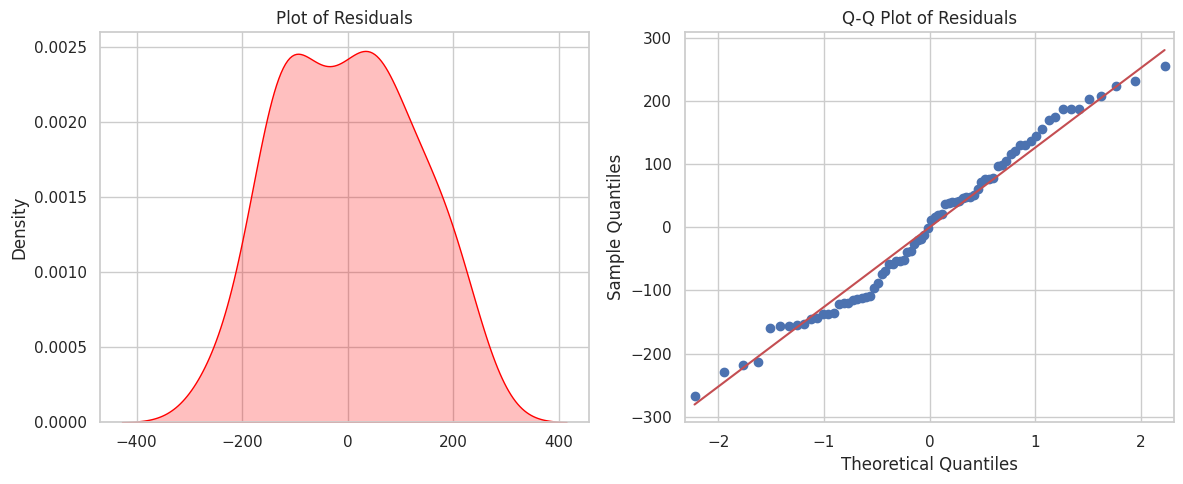

In [ ]:
import seaborn as sns
import statsmodels.api as sm

# Get residuals after fitting the model
residuals_withdrawal = model_withdrawal.resid

# Visualization: KDE plot and Q-Q plot for residuals
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# KDE plot for residuals with fill instead of shade
sns.kdeplot(residuals_withdrawal, ax=ax[0], color='red', fill=True)
ax[0].set_title('Plot of Residuals')

# Q-Q plot
sm.qqplot(residuals_withdrawal, line='s', ax=ax[1])
ax[1].set_title('Q-Q Plot of Residuals')

# Plotting the graphs below
plt.tight_layout()
plt.show()

>**Performing Shapiro-Wilk test on residuals after fitting the model to check for assumption of normality.**

> The residuals of our model seem to follow a normal distribution, as the Shapiro-Wilk test results indicate there is no significant deviation from normality. It implies that the assumptions of normality for our residuals are likely met, which is an important condition for fitting our model.

In [ ]:
# Perform Shapiro-Wilk test on residuals
shapiro_res = stats.shapiro(residuals_withdrawal.dropna())

print(f'W: {round(shapiro_res[0], 3)}, P-value: {round(shapiro_res[1], 3)}')

W: 0.975, P-value: 0.146


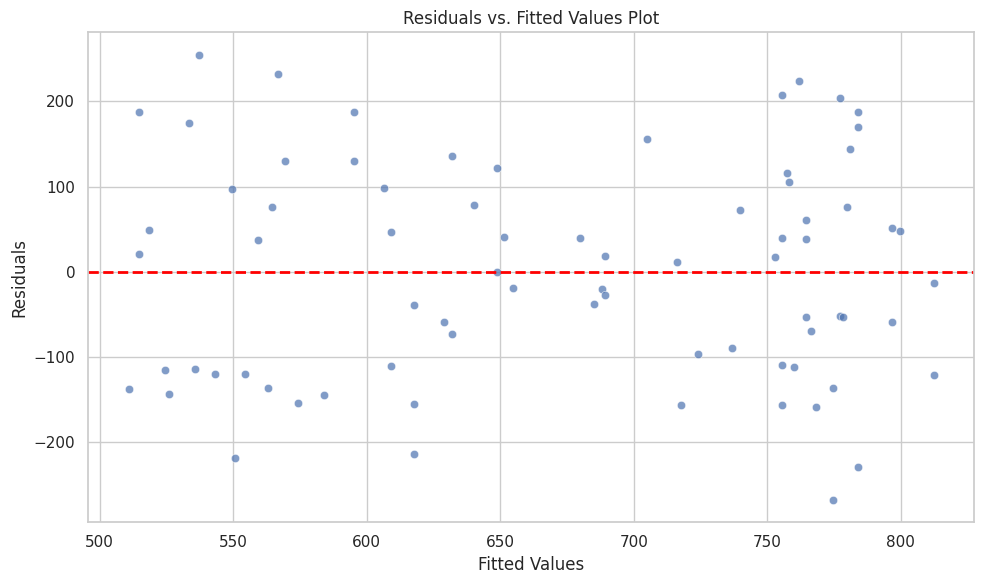

In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# Get the residuals and the fitted values
residuals_withdrawal = model_withdrawal.resid
fitted_values = model_withdrawal.fittedvalues

# Plot Residuals vs. Fitted Values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=fitted_values, y=residuals_withdrawal, alpha=0.7)
# Line at zero as a reference
plt.axhline(0, color='red', linestyle='--', linewidth=2)
plt.title("Residuals vs. Fitted Values Plot")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.tight_layout()
plt.show()

**Section 3.3: CONTINUOUS COVARIATES, ANCOVA, & ASSUMPTION CHECKS** <br>

><mark>**Assignment 2 - Adding 1 Continuous Covariate (Income)** <br>

In [ ]:
#--------------------------------------------------------------------- Assignment 2: Adding a New Covariate --------------------------------------------------------------------------#
# Select 76 unique random participants
selected_participant_ids = np.random.choice(df['Participant ID'].unique(), 76, replace=False)
withdrawal_df_c = df[df['Participant ID'].isin(selected_participant_ids)].copy()

# Define the columns you want to keep
columns_to_keep = ['Participant ID', 'Age', 'Gender', 'Location', 'Income']

# Filter the DataFrame to include only the specified columns
withdrawal_df_c = withdrawal_df_c[columns_to_keep]

# Initial stage: all participants receive "Percentage Markdown"
withdrawal_df_c['Stage 1 Session Duration'] = np.random.uniform(500, 1000, len(withdrawal_df_c)).round(2)

# Assign participants to two groups: Treatment (continues with promotion) and Control (no promotion in Stage 2)
group_assignments = np.random.choice(['Control', 'Treatment'], size=len(withdrawal_df_c), replace=True, p=[0.5, 0.5])
withdrawal_df_c['Group'] = group_assignments

# Second stage: Treatment group continues with "Percentage Markdown", Control does not
withdrawal_df_c['Stage 2 Session Duration'] = np.where(
    withdrawal_df_c['Group'] == 'Treatment',
    np.random.uniform(500, 1000, len(withdrawal_df_c)),  # Longer duration for continuing promotion
    np.random.uniform(300, 800, len(withdrawal_df_c))     # Shorter duration for no promotion
).round(2)

# Output the DataFrame for the first 10 participants as a sample
withdrawal_df_c.head(10)

Participant ID  Age  Gender   Location  Income  \
33                34   66    Male     Oshawa   11941   
96                97   65  Female    Calgary  146122   
304              305   26  Female     Ottawa  100826   
311              312   56    Male  Kitchener   94962   
315              316   62  Female     Regina  169667   
794              795   47    Male     Regina  179812   
878              879   39    Male   Winnipeg  128213   
1059            1060   44  Female   Winnipeg   73056   
1247            1248   45  Female     Regina  158477   
1608            1609   26  Female    Kelowna  109745   

      Stage 1 Session Duration      Group  Stage 2 Session Duration  
33                      943.94    Control                    355.09  
96                      851.50  Treatment                    860.05  
304                     608.06    Control                    378.21  
311                     591.70  Treatment                    852.83  
315                     715.83  Treatment                    744.61  
794                     908.78    Control                    720.91  
878                     921.47    Control                    449.51  
1059                    760.23    Control                    458.30  
1247                    930.41  Treatment                    804.18  
1608                    502.72  Treatment                    722.18

**ANCOVA & SUMMARY STATISTICS:** <br>

> 'Income' is the continuous covariates
Treatment(Group) will be the categorical variable (i.e. treatment/control groups)<br>

>**SOURCE FOR ANCOVA CODE:** https://www.reneshbedre.com/blog/ancova.html

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Assuming 'withdrawal_df_c' is the DataFrame that contains all necessary data
# Update the formula to focus on the independent variables and their interactions, excluding 'Device Type'
formula = 'Q("Stage 2 Session Duration") ~ Q("Income") + C(Q("Group")) + \
          Q("Income"):C(Q("Group"))'

# Fit the model using ordinary least squares (OLS)
model_withdrawal_c = ols(formula, data=withdrawal_df_c).fit()

# Perform the ANOVA and print the results
anova_table = sm.stats.anova_lm(model_withdrawal_c, typ=3)
print(anova_table)

# Print a detailed summary of the model to see coefficients, standard errors, p-values, and more
print(model_withdrawal_c.summary())

                                 sum_sq    df          F        PR(>F)
Intercept                  1.651965e+06   1.0  79.531377  2.967982e-13
C(Q("Group"))              5.460917e+05   1.0  26.290767  2.381216e-06
Q("Income")                1.234556e+04   1.0   0.594358  4.432613e-01
Q("Income"):C(Q("Group"))  1.473991e+04   1.0   0.709631  4.023559e-01
Residual                   1.495529e+06  72.0        NaN           NaN
                                  OLS Regression Results                                 
Dep. Variable:     Q("Stage 2 Session Duration")   R-squared:                       0.516
Model:                                       OLS   Adj. R-squared:                  0.496
Method:                            Least Squares   F-statistic:                     25.61
Date:                           Tue, 25 Feb 2025   Prob (F-statistic):           2.20e-11
Time:                                   04:38:20   Log-Likelihood:                -483.56
No. Observations:                 

In [ ]:
#------------------------------------------------------------------------------ TUKEY HSD TEST -----------------------------------------------------------------------------------------------#
# Perform Tukey's HSD for DiscountType
tukey_results_withdrawal_c = pairwise_tukeyhsd(
    withdrawal_df_c['Stage 2 Session Duration'],
    withdrawal_df_c['Group']
)

print("\nTukey HSD Test Results:")
print(tukey_results_withdrawal_c)


Tukey HSD Test Results:
   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
 group1   group2  meandiff p-adj  lower    upper   reject
---------------------------------------------------------
Control Treatment 289.3262   0.0 223.7995 354.8528   True
---------------------------------------------------------


**Checking Assumptions for ANCOVA:**

> 1. IID: Independently & Identically distributed taken care of by random sampling.
2. Normality: Testing for normality of residuals after fitting the model using the Shapiro-Wilk test
3. Homoscedasticity: variances of the dependent variable should be approximately equal across the different groups using


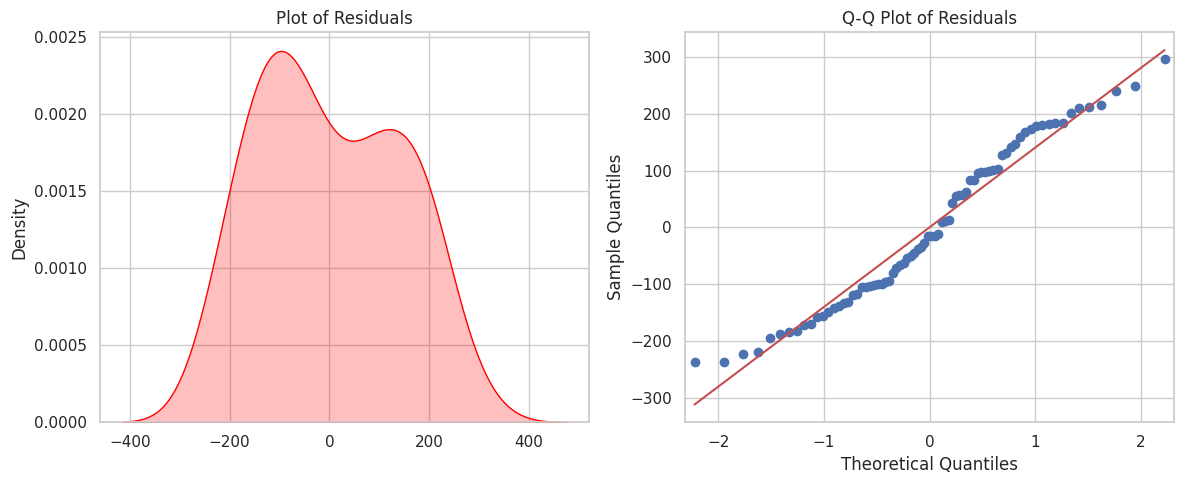

In [ ]:
import seaborn as sns
import statsmodels.api as sm

# Get residuals after fitting the model
residual_withdrawal_c = model_withdrawal_c.resid

# Visualization: KDE plot and Q-Q plot for residuals
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# KDE plot for residuals with fill instead of shade
sns.kdeplot(residual_withdrawal_c, ax=ax[0], color='red', fill=True)
ax[0].set_title('Plot of Residuals')

# Q-Q plot
sm.qqplot(residual_withdrawal_c, line='s', ax=ax[1])
ax[1].set_title('Q-Q Plot of Residuals')

# Plotting the graphs below
plt.tight_layout()
plt.show()

In [ ]:
# Perform Shapiro-Wilk test on residuals
shapiro_resid = stats.shapiro(residual_withdrawal_c.dropna())

print(f'W: {round(shapiro_resid[0], 3)}, P-value: {round(shapiro_resid[1], 3)}')

W: 0.958, P-value: 0.013


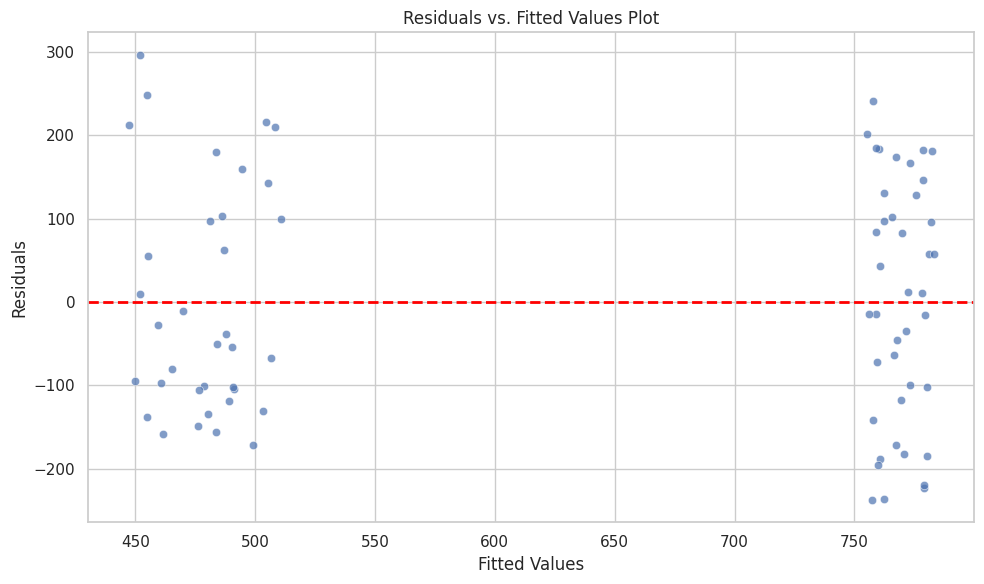

In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# Get the residuals and the fitted values
residual_withdrawal_c = model_withdrawal_c.resid
fitted_value = model_withdrawal_c.fittedvalues

# Plot Residuals vs. Fitted Values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=fitted_value, y=residual_withdrawal_c, alpha=0.7)
# Line at zero as a reference
plt.axhline(0, color='red', linestyle='--', linewidth=2)
plt.title("Residuals vs. Fitted Values Plot")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.tight_layout()
plt.show()

**Section 3.4: COMBINING BLOCKING & CONTINUOUS COVARIATES, ANCOVA FOR BOTH, & ASSUMPTION CHECKS** <br>

><mark>**Assignment 2 - BONUS PART: Running another set of two-way ANOVAs with both the blocking factor and continuous covariates for withdrawal design subset of data.** <br>

In [ ]:
#-----------------------------------------------------------------ASSIGNMENT 2: BLOCKING USING INCOME LEVELS -----------------------------------------------------------------------#
# Setting the seed for reproducibility
np.random.seed(42)

# Define the device types of interest (assuming Mobile and Desktop are the device types of interest)
device_types_of_interest = ['Mobile', 'Desktop']

# Filtering the DataFrame for the device types of interest
filtered_df = df[df['Device Type'].isin(device_types_of_interest)]

#--------------------------------------------------------------------- Assignment 2: Adding a New Covariate --------------------------------------------------------------------------#
# Define columns to keep in the subset DataFrame
columns_to_keep = ['Participant ID', 'Age', 'Gender', 'Location', 'Income', 'Device Type']

# Randomly select 38 participants for each of the two device types
selected_participants_mobile = filtered_df[filtered_df['Device Type'] == 'Mobile'].sample(n=38, random_state=42)[columns_to_keep]
selected_participants_desktop = filtered_df[filtered_df['Device Type'] == 'Desktop'].sample(n=38, random_state=42)[columns_to_keep]

# Combine the selected participants into one DataFrame
selected_participants = pd.concat([selected_participants_mobile, selected_participants_desktop])

# Defining the t based on design
withdrawal_conditions = ['Control', 'Treatment']

# Shuffle within each device type and assign 'Control' or 'Treatment' evenly
def assign_treatments(group):
    treatments = ['Control', 'Treatment'] * (len(group) // 2)  # This creates an equal number of 'Control' and 'Treatment'
    np.random.shuffle(treatments)
    group['Treatment'] = treatments
    return group

selected_participants = selected_participants.groupby('Device Type').apply(assign_treatments).reset_index(drop=True)

# Simulating session duration
selected_participants['Session Duration'] = np.where(
    selected_participants['Treatment'] == 'Treatment',
    # Longer duration for treatment group
    np.random.uniform(500, 1000, len(selected_participants)),
    # Shorter duration for control group
    np.random.uniform(300, 800, len(selected_participants))
).round(2)

# Output the DataFrame for the first 10 participants as a sample
selected_participants.head()

<ipython-input-68-cd5cdd6dcbd3>:32: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  selected_participants = selected_participants.groupby('Device Type').apply(assign_treatments).reset_index(drop=True)


Participant ID  Age  Gender   Location  Income Device Type  Treatment  \
0             891   45  Female     Ottawa   21256     Desktop  Treatment   
1            8112   31  Female  Kitchener   53313     Desktop    Control   
2            6914   25    Male     London   28078     Desktop    Control   
3            1271   24    Male     Regina   90127     Desktop  Treatment   
4            1415   50  Female  Saskatoon   73834     Desktop    Control   

   Session Duration  
0            724.88  
1            382.33  
2            567.04  
3            863.64  
4            646.22

**ANCOVA & SUMMARY STATISTICS:** <br>

> "Income" is the continuous covariates, Device Type will be a categorical blocking factor, and Treatment/Control will be the categorical variable (i.e. treatment/control groups)<br>

>**SOURCE FOR ANCOVA CODE:** https://www.reneshbedre.com/blog/ancova.html

In [ ]:
#------------------------------------------------ TWO-WAY ANOVA FOR BLOCKING & COVARIATES ------------------------------------------------------------------------------------------#
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Assuming 'df' is your DataFrame already loaded with the necessary data
# Create model formula
formula = 'Q("Session Duration") ~ Q("Income") + C(Q("Device Type")) + C(Q("Treatment")) + \
           Q("Income"):C(Q("Device Type")) + Q("Income"):C(Q("Treatment")) + \
           C(Q("Device Type")):C(Q("Treatment"))'

# Fit the model using ordinary least squares (OLS)
model_withdrawal_2 = sm.formula.ols(formula, data=selected_participants).fit()

# Perform ANOVA and print table
aov_table = sm.stats.anova_lm(model_withdrawal_2, typ=2)  # Using Type II sums of squares
print(aov_table)

# Print a detailed summary of the model
print(model_withdrawal_2.summary())
#------------------------------------------------ TWO-WAY ANOVA FOR BLOCKING & COVARIATES END---------------------------------------------------------------


                                             sum_sq    df          F  \
C(Q("Device Type"))                    2.627854e+04   1.0   1.457527   
C(Q("Treatment"))                      5.244412e+05   1.0  29.087881   
C(Q("Device Type")):C(Q("Treatment"))  5.852942e+04   1.0   3.246307   
Q("Income")                            2.131841e+04   1.0   1.182416   
Q("Income"):C(Q("Device Type"))        7.989317e+03   1.0   0.443124   
Q("Income"):C(Q("Treatment"))          1.067032e+04   1.0   0.591824   
Residual                               1.244038e+06  69.0        NaN   

                                             PR(>F)  
C(Q("Device Type"))                    2.314463e-01  
C(Q("Treatment"))                      9.140491e-07  
C(Q("Device Type")):C(Q("Treatment"))  7.595308e-02  
Q("Income")                            2.806487e-01  
Q("Income"):C(Q("Device Type"))        5.078379e-01  
Q("Income"):C(Q("Treatment"))          4.443400e-01  
Residual                                     

In [ ]:
#------------------------------------------------------------------------------ TUKEY HSD TEST -----------------------------------------------------------------------------------------------#
# Perform Tukey's HSD for DiscountType
tukey_results_withdrawal_2 = pairwise_tukeyhsd(
    selected_participants['Session Duration'],
    selected_participants['Treatment']
)

print("\nTukey HSD Test Results:")
print(tukey_results_withdrawal_2)


Tukey HSD Test Results:
   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
 group1   group2  meandiff p-adj  lower    upper   reject
---------------------------------------------------------
Control Treatment 169.8505   0.0 107.8308 231.8703   True
---------------------------------------------------------


**Checking Assumptions for COMBINED ANCOVA:**

> 1. IID: Independently & Identically distributed taken care of by random sampling.
2. Normality: Testing for normality of residuals after fitting the model using the Shapiro-Wilk test
3. Homoscedasticity: variances of the dependent variable should be approximately equal across the different groups using

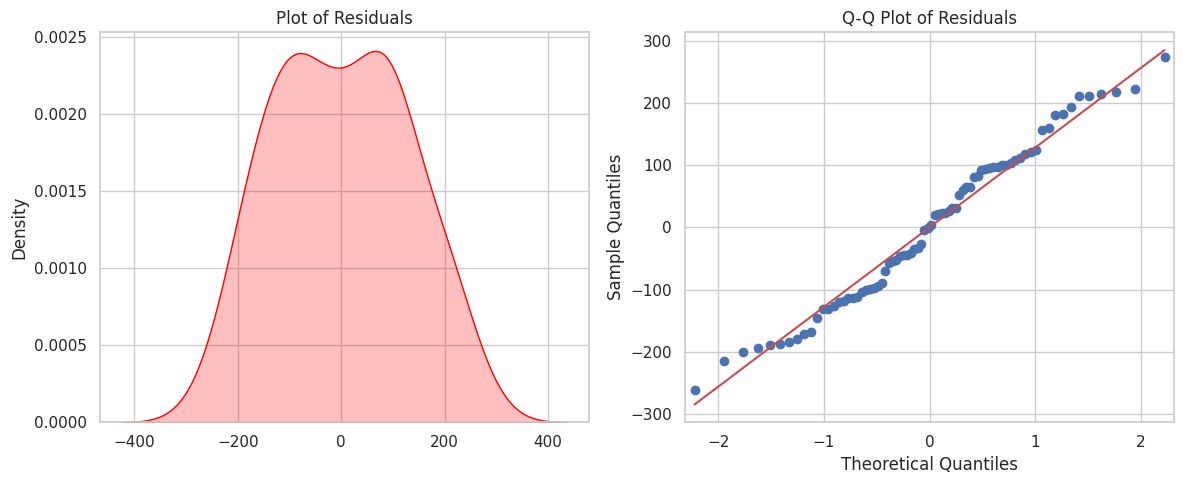

In [ ]:
import seaborn as sns
import statsmodels.api as sm

# Get residuals after fitting the model
residual_withdrawal_2 = model_withdrawal_2.resid

# Visualization: KDE plot and Q-Q plot for residuals
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# KDE plot for residuals with fill instead of shade
sns.kdeplot(residual_withdrawal_2, ax=ax[0], color='red', fill=True)
ax[0].set_title('Plot of Residuals')

# Q-Q plot
sm.qqplot(residual_withdrawal_2, line='s', ax=ax[1])
ax[1].set_title('Q-Q Plot of Residuals')

# Plotting the graphs below
plt.tight_layout()
plt.show()

In [ ]:
# Perform Shapiro-Wilk test on residuals
shapiro_residual = stats.shapiro(residual_withdrawal_2.dropna())

print(f'W: {round(shapiro_residual[0], 3)}, P-value: {round(shapiro_residual[1], 3)}')

W: 0.974, P-value: 0.117


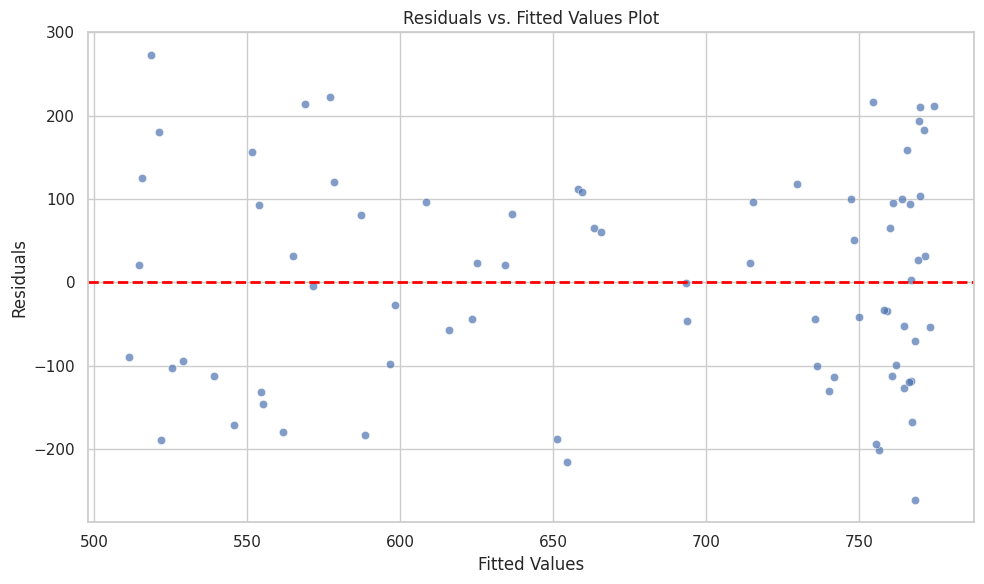

In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# Get the residuals and the fitted values
residual_withdrawal_2 = model_withdrawal_2.resid
fitted_value = model_withdrawal_2.fittedvalues

# Plot Residuals vs. Fitted Values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=fitted_value, y=residual_withdrawal_2, alpha=0.7)
# Line at zero as a reference
plt.axhline(0, color='red', linestyle='--', linewidth=2)
plt.title("Residuals vs. Fitted Values Plot")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.tight_layout()
plt.show()

The Flowchart for Withdrawal Design with the blocking factor(Device Type)

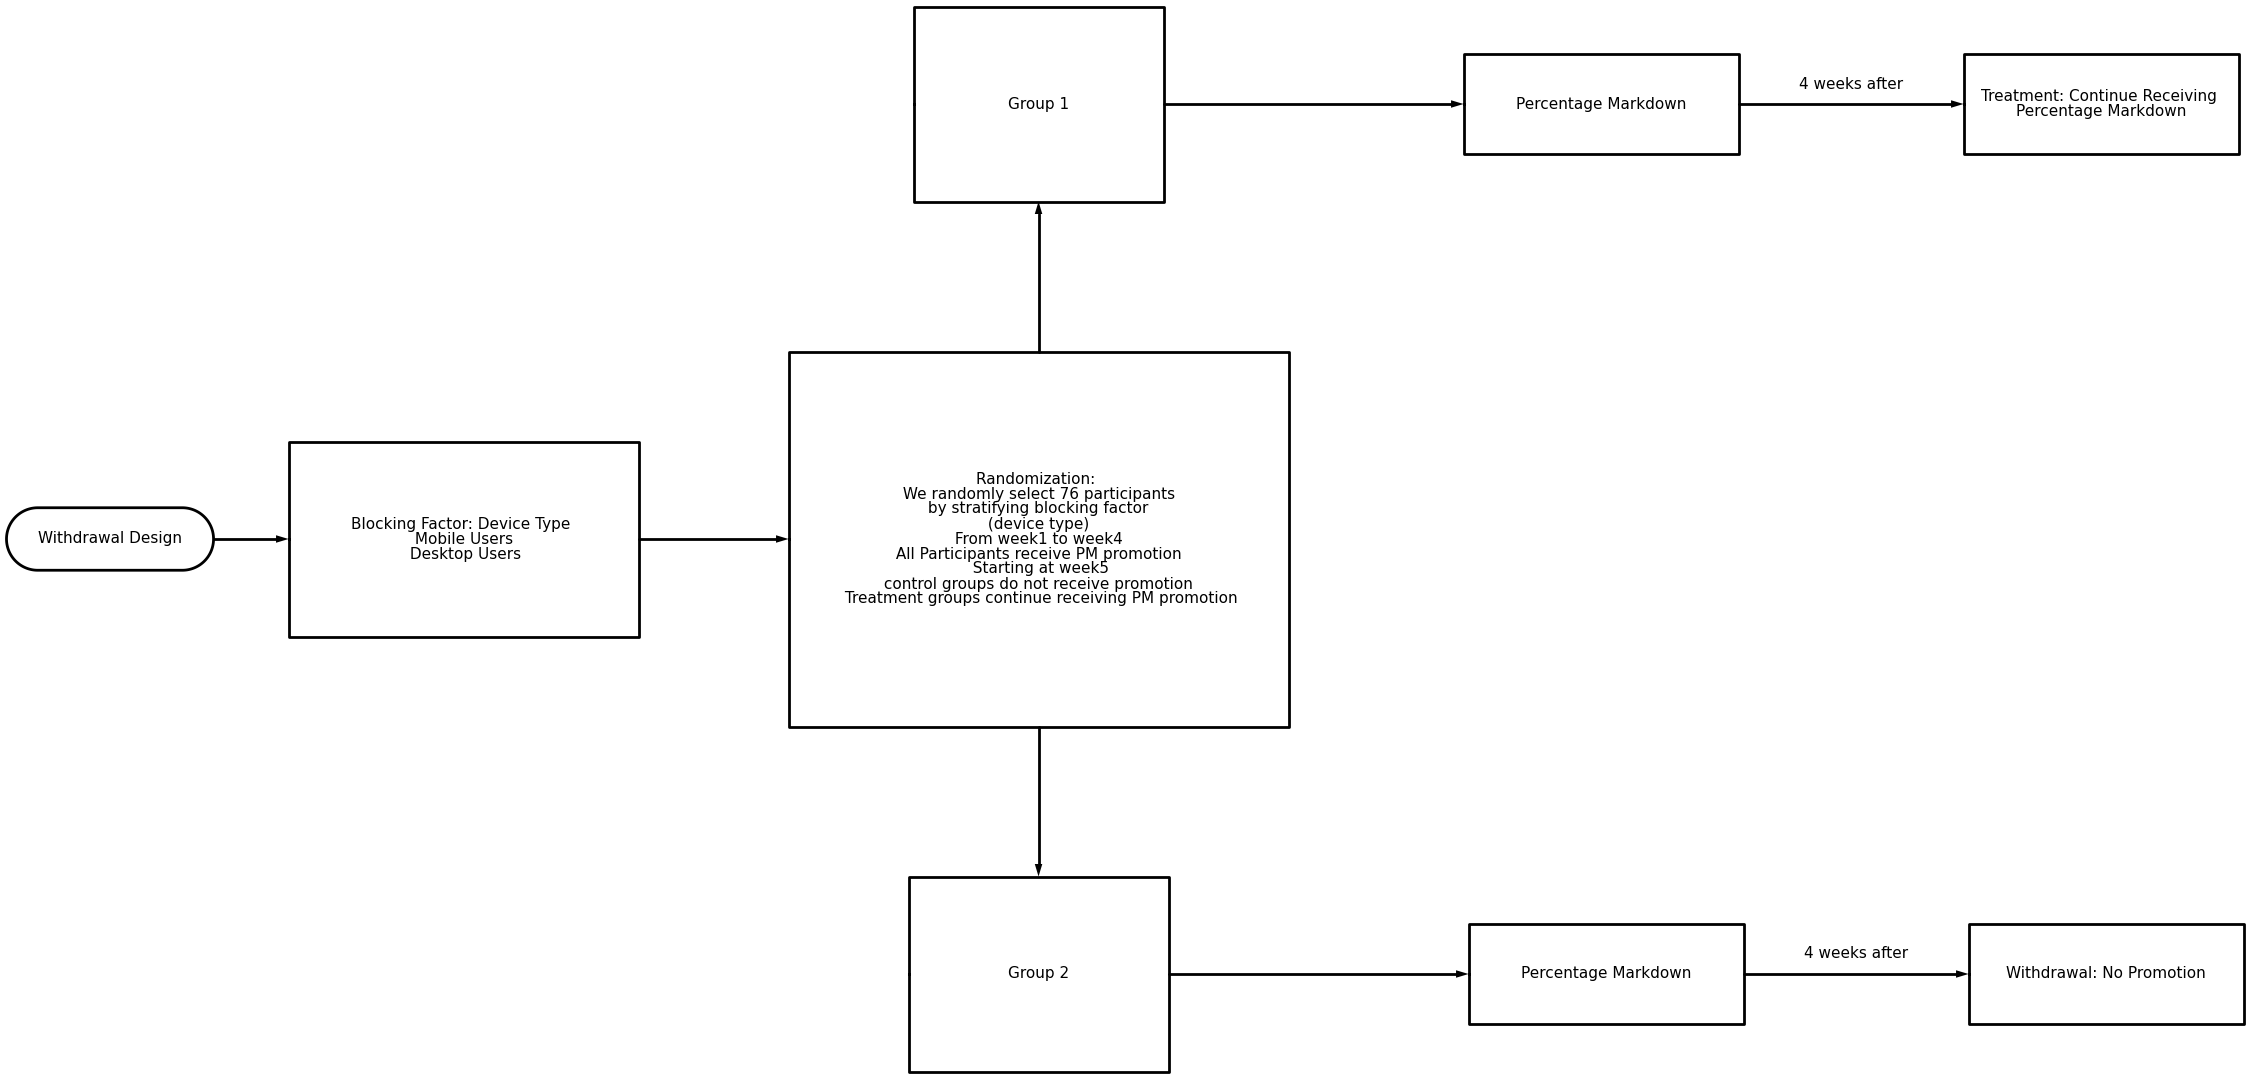

In [ ]:
with schemdraw.Drawing() as d:

    d.config(fontsize=11)
    b = flow.Start().label('Withdrawal Design')
    flow.Arrow().right(d.unit/2).at(b.E)
    d10 = flow.Box(w=7, h=3.9).label('Blocking Factor: Device Type \n Mobile Users \n Desktop Users')
    flow.Arrow().right(d.unit* 1).at(d10.E)
    d1 = flow.Box(w=10, h=7.5).label('Randomization: \n We randomly select 76 participants \n by stratifying blocking factor \n (device type) \n From week1 to week4 \n All Participants receive PM promotion \n  Starting at week5 \n control groups do not receive promotion \n Treatment groups continue receiving PM promotion')

    flow.Arrow().up(d.unit* 1).at(d1.N)
    d2 = flow.Box(w=5, h=3.9).label('Group 1')
    flow.Arrow().down(d.unit* 1).at(d1.S)
    d3 = flow.Box(w=5.2, h=3.9).label('Group 2')

    flow.Arrow().right(d.unit*2).at(d2.E)
    d5 = flow.Box(w=5.5, h=2.0).label('Percentage Markdown')



    flow.Arrow().right(d.unit*2).at(d3.E)
    d6 = flow.Box(w=5.5, h=2.0 ).anchor('W').label('Percentage Markdown')


    flow.Arrow().right(d.unit*1.5).at(d5.E).label('4 weeks after')
    d7 = flow.Box(w=5.5, h=2.0).anchor('W').label('Treatment: Continue Receiving \nPercentage Markdown')



    flow.Arrow().right(d.unit*1.5).at(d6.E).label('4 weeks after')
    d8 = flow.Box(w=5.5, h=2.0 ).anchor('W').label('Withdrawal: No Promotion')


# --------------------- END OF WITHDRAWAL DESIGN CODE ----------------------------

#**4. Factorial Design** <br>

**Section 4.1: Power Analysis, Sample Size, & Associated Graph**

Effect Size: Medium (0.5)</br>
Sample Size: 212</br>
Dependent Variable: Conversion Rate <br>

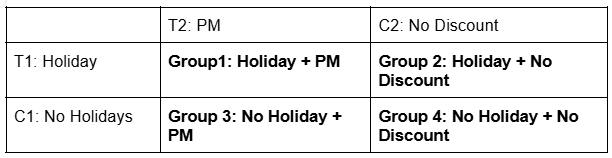

In [ ]:
from statsmodels.stats.power import FTestAnovaPower

# Define the parameters for this Factorial Design Scenario

# Medium effect size
effect_size = 0.5
# Significance level
alpha = 0.05
# Power value
power = 0.85
# 2x2 factorial design (4 groups)
number_groups = 4

# Creating a power analysis object
analysis = FTestAnovaPower()

# Calculating the required sample size per group
result = analysis.solve_power(effect_size=effect_size, k_groups=number_groups, alpha=alpha, power=power)

# Rounding to get integer sample size
required_sample_size_per_group = round(result)

# Total sample size required for the experiment
total_sample_size = required_sample_size_per_group * number_groups

# Output the result
print(f'Required sample size per group: {required_sample_size_per_group}')
print(f'Total sample size for all groups: {total_sample_size}')

Required sample size per group: 53
Total sample size for all groups: 212


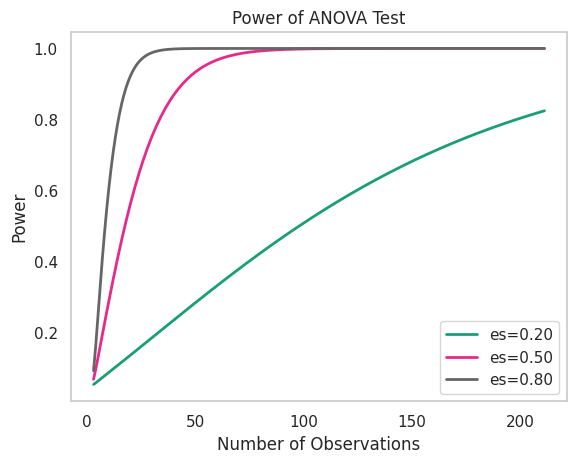

In [ ]:
from numpy import array
from matplotlib import pyplot

# Power vs. number of observations
# Parameters for power analysis
# The larger the effect size, the less likely it is to be random error.
effect_sizes = array([0.2, 0.5, 0.8])
sample_sizes = array(range(2, 212))


# Calculate power curves from multiple power analyses.
# Assume a significance of 0.05 and explore the change in sample size between 2 and 100 with low (es=0.2), medium (es=0.5), and high effect (es=0.8)sizes.
analysis = FTestAnovaPower()
analysis.plot_power(dep_var='nobs', nobs=sample_sizes, effect_size=effect_sizes, alpha=0.05, title='Power of ANOVA Test')
pyplot.grid()
pyplot.ylabel('Power')
pyplot.show()

**Assignment 2 - Blocking Factor for Factorial Design**

Customers in big or samll cities may have different reactions for holiday seasons with or without promotions.
Confounding Effect: Holidays or Promotions, customers in big cities are more likely to have purchases than in small cities.

**Section 4.2: BLOCKING, TWO-WAY ANOVA, & ASSUMPTION CHECKS** <br>

><mark>**Assignment 2 - Blocking for Factorial using City Type as blocking factor** <br>

> Customers in big or samll cities may have different reactions for holiday seasons with or without promotions. <br>
Confounding Effect: Holidays or Promotions, customers in big cities are more likely to have purchases than in small cities. <br>

In [ ]:
#-----------------------------------------------------------------ASSIGNMENT 2: BLOCKING USING City Size -----------------------------------------------------------------------#
# add blocking factor for factorial design
# Setting the seed for reproducibility# Setting the seed for reproducibility: so that our analysis and conclusions consistent
np.random.seed(42)

# Define population for each city
city_populations = {
    'Toronto': 2600000, 'Montreal': 1600000, 'Vancouver': 600000,
    'Calgary': 1020000, 'Edmonton': 710000, 'Ottawa': 810000,
    'Winnipeg': 630000, 'Quebec City': 530000, 'Hamilton': 600000,
    'Kitchener': 230000, 'London': 350000, 'Victoria': 290000,
    'Halifax': 360000, 'Oshawa': 250000, 'Windsor': 280000,
    'Saskatoon': 200000, 'Regina': 180000, 'St. John\'s': 100000,
    'Kelowna': 130000, 'Barrie': 180000
}


# Assign population for each city in the 'Location' column
df['City Population'] = df['Location'].map(city_populations)

# Create a new column for city population level
df['City_type'] = ''

# Loop through each row to categorize the city Population
for index, row in df.iterrows():
    if row['City Population'] >= 500000:
        df.at[index, 'City_type'] = 'Big City'
    elif row['City Population'] < 500000:
        df.at[index, 'City_type'] = 'Small City'

# Create a dictionary to store the participants by city population level
city_samples = {}
# Create labels to categorize each of the city popualtion per participant
city_label = ['Big City', 'Small City']

# Looping through each city popualtion level and randomly select 106 participants
for City_type in city_label:
    selected_city = df[df['City_type'] == City_type].sample(n=106, random_state=42)
    city_samples[City_type] = selected_city

# Combine all selected participants from the dictionary into one DataFrame
selected_participants = pd.concat(city_samples.values())

# Find remaining participants who were not selected
remaining_participants = df[~df['Participant ID'].isin(selected_participants['Participant ID'])]

# Count how many participants are in each level
city_level_counts = selected_participants['City_type'].value_counts()

# Print out the number of participants in each income level & display the dataframe
print(city_level_counts)
print('\n')
selected_participants.head()

City_type
Big City      106
Small City    106
Name: count, dtype: int64




Participant ID  Age  Gender   Location  Income Frequency in the Past  \
347              348   39    Male   Edmonton  105930          not frequent   
5585            5586   55    Male   Edmonton    9413              frequent   
2304            2305   37  Female  Vancouver   30107              frequent   
2532            2533   31    Male    Calgary   92172          not frequent   
1628            1629   38    Male   Montreal  162897              frequent   

      Historical Visits Device Type Preferred Payment Method  \
347                  75      Tablet                    Debit   
5585                 16      Mobile              Credit Card   
2304                188      Tablet                   PayPal   
2532                147      Mobile                    Debit   
1628                136      Tablet           Bank Transfers   

     Membership Status Exposure to Social Media Promotion Membership_Status  \
347           Platinum                                 No          Platinum   
5585            Silver                                 No          Platinum   
2304              Gold                                 No             Basic   
2532          Platinum                                 No          Platinum   
1628          Platinum                                 No              Gold   

      City Population City_type  
347            710000  Big City  
5585           710000  Big City  
2304           600000  Big City  
2532          1020000  Big City  
1628          1600000  Big City

**Randomdization After Blocking Factor After Blocking Done Above**

In [ ]:
# Set seed for reproducibility
np.random.seed(42)

# Filter the DataFrame to keep only the selected participants
factorial_df = df[df['Participant ID'].isin(selected_participants)].copy()

# Separate participants by City_type
big_city_participants = selected_participants[selected_participants['City_type'] == 'Big City']
small_city_participants = selected_participants[selected_participants['City_type'] == 'Small City']

# We will randomly assign participants from both groups to the 4 groups evenly.
# Randomly assign participants from Big City to 4 groups
big_city_participants['Group'] = np.random.choice(['Group 1', 'Group 2', 'Group 3', 'Group 4'],
                                                   size=big_city_participants.shape[0], replace=True)

# Randomly assign participants from Small City to 4 groups
small_city_participants['Group'] = np.random.choice(['Group 1', 'Group 2', 'Group 3', 'Group 4'],
                                                     size=small_city_participants.shape[0], replace=True)

# Combine the Big City and Small City participants back together
final_selected_participants = pd.concat([big_city_participants, small_city_participants])

# Now we create the demographic and factorial data for these participants
# Filter the original df for demographic features of selected participants
demographic_features = ['Participant ID', 'Age', 'Gender', 'Location', 'Income','Group', 'City_type']
demographic_participant_df = final_selected_participants[demographic_features].drop_duplicates(subset='Participant ID').copy()

# Now we must randomly assign 53 participants to each of the four groups:
# Group1: Holiday + Percentage Markdown
# Group 2: Holiday + No Discount
# Group 3: No Holiday + Percentage Markdown
# Group 4: No Holiday + No Discount
# Defining the group combinations based on above factorial design
factorial_conditions = [
    # Group 1: Holiday + Percentage Markdown
    ('Yes', 'Percentage Markdown'),
    # Group 2: Holiday + No Discount
    ('Yes', 'No Discount'),
    # Group 3: No Holiday + Percentage Markdown
    ('No', 'Percentage Markdown'),
    # Group 4: No Holiday + No Discount
    ('No', 'No Discount')]

# There will be 4 groups
num_groups = len(factorial_conditions)
# Based on the power analysis we will evenly split 53 individuals per group
group_size = len(demographic_participant_df) // num_groups

# Initializing two lists to store assigned factor levels
holiday_assignments = []
discount_assignments = []

# Assigning d groups of participants to factorial groups using a loop
for index, row in demographic_participant_df.iterrows():
    # Get the group assigned to the participant
    group = row['Group']
    # Map the group to the corresponding factorial condition (Holiday, Discount)
    if group == 'Group 1':
        holiday, discount = factorial_conditions[0]
    elif group == 'Group 2':
        holiday, discount = factorial_conditions[1]
    elif group == 'Group 3':
        holiday, discount = factorial_conditions[2]
    elif group == 'Group 4':
        holiday, discount = factorial_conditions[3]
    # Append the corresponding holiday and discount values
    holiday_assignments.append(holiday)
    discount_assignments.append(discount)

# Adding the factor assignments to the DataFrame
demographic_participant_df['Holiday'] = holiday_assignments
demographic_participant_df['Discount'] = discount_assignments

# Now we will generate the dependent variables for this experiment specifically
n_samples = len(demographic_participant_df)

# Initializing activity data and using zeros as placeholders
frequency_of_visits = np.zeros(n_samples)
frequency_of_made_purchase = np.zeros(n_samples)

# Looping through each of the rows
for i in range(n_samples):
  # holds the holiday status ('Yes' or 'No') for the current participant
  holiday = holiday_assignments[i]
  # holds the discount type ('Percentage Markdown' or 'No Discount') for the current participant
  discount = discount_assignments[i]

  # For the following condition (i.e. the holiday variable is set to yes)
  if holiday == 'Yes':
    # Then we have to anticipate an increase in the frequency of visits from participants
    # So we create our dependent variables accordingly
    frequency_of_visits[i] = np.random.randint(10, 30)
  else:
    # If there are no holidays the traffic to the platform should be less
    # so we reflect that in the two dependent variables
    frequency_of_visits[i] = np.random.randint(5, 20)

  # For the following condition (i.e. Percentage Markdown is applied)
  # There will be Higher purchases and order value when discounts are applied
  if discount == 'Percentage Markdown':
    # Making sure that the purchases don't exceed the number of visits to solve the
    # case when there are zero visits there should be 0 purchases
    frequency_of_made_purchase[i] = np.random.randint(0, frequency_of_visits[i])
  else:
    # Making sure that the purchases don't exceed the number of visits
    frequency_of_made_purchase[i] = np.random.randint(0, frequency_of_visits[i])


# Calculating conversion rate: which is a just the purchases made to visits
conversion_rate = frequency_of_made_purchase / frequency_of_visits
conversion_rate = np.round(conversion_rate, 5)


# Rounding the values for the dependent variables
frequency_of_visits = np.round(frequency_of_visits, 2)
frequency_of_made_purchase = np.round(frequency_of_made_purchase, 2)


# Creating activity DataFrame
activity_data = pd.DataFrame({
    "Participant ID": demographic_participant_df["Participant ID"],
    "Frequency of Visits": frequency_of_visits,
    "Frequency of Made Purchase": frequency_of_made_purchase,
    "Conversion Rate": conversion_rate})

# Merging the demographic and activity data together
df_factorial = demographic_participant_df.merge(activity_data, on="Participant ID")
# Show the demographic data for the selected participants
df_factorial.head(10)

<ipython-input-78-d1f0c7078ee0>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  big_city_participants['Group'] = np.random.choice(['Group 1', 'Group 2', 'Group 3', 'Group 4'],
<ipython-input-78-d1f0c7078ee0>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  small_city_participants['Group'] = np.random.choice(['Group 1', 'Group 2', 'Group 3', 'Group 4'],


Participant ID  Age  Gender   Location  Income    Group City_type Holiday  \
0             348   39    Male   Edmonton  105930  Group 3  Big City      No   
1            5586   55    Male   Edmonton    9413  Group 4  Big City      No   
2            2305   37  Female  Vancouver   30107  Group 1  Big City     Yes   
3            2533   31    Male    Calgary   92172  Group 3  Big City      No   
4            1629   38    Male   Montreal  162897  Group 3  Big City      No   
5            2778   18    Male   Edmonton  181406  Group 4  Big City      No   
6            4774   54    Male     Ottawa  185557  Group 1  Big City     Yes   
7            6639   25    Male   Edmonton  154978  Group 1  Big City     Yes   
8            8167   48    Male   Edmonton   40131  Group 3  Big City      No   
9            7572   47    Male   Montreal   64563  Group 2  Big City     Yes   

              Discount  Frequency of Visits  Frequency of Made Purchase  \
0  Percentage Markdown                 17.0                        14.0   
1          No Discount                 15.0                        12.0   
2  Percentage Markdown                 13.0                        12.0   
3  Percentage Markdown                 11.0                        10.0   
4  Percentage Markdown                  7.0                         5.0   
5          No Discount                 16.0                         1.0   
6  Percentage Markdown                 19.0                        12.0   
7  Percentage Markdown                 15.0                        11.0   
8  Percentage Markdown                 16.0                        11.0   
9          No Discount                 21.0                        19.0   

   Conversion Rate  
0          0.82353  
1          0.80000  
2          0.92308  
3          0.90909  
4          0.71429  
5          0.06250  
6          0.63158  
7          0.73333  
8          0.68750  
9          0.90476

**Violin Plot to Display the Distribution after the Blocking & Randomization for Factorial Design**

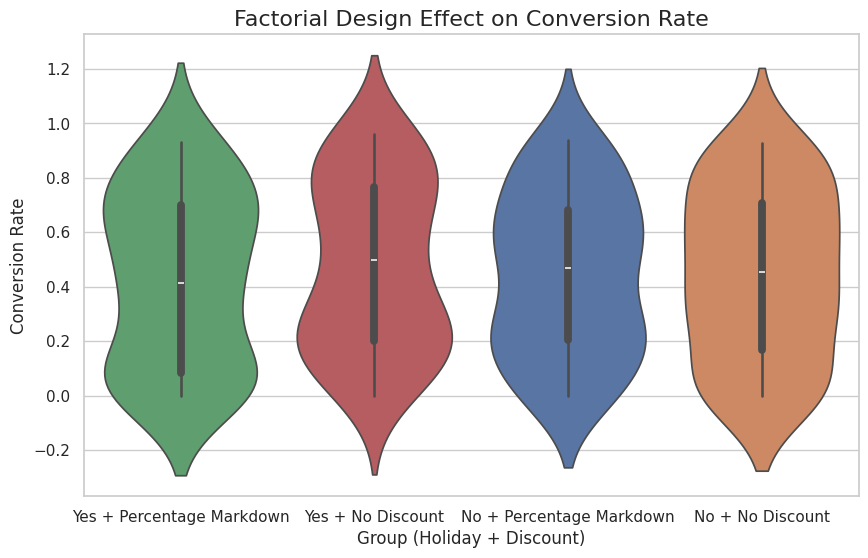

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

# Creating a 'Treatment' column by combining 'Holiday' and 'Discount'
df_factorial['Treatment'] = df_factorial['Holiday'] + " + " + df_factorial['Discount']

# Plotting the violin plot for Conversion Rate
plt.figure(figsize=(10, 6))
sns.violinplot(x="Treatment", y="Conversion Rate", data=df_factorial, hue="Treatment",
               order=["Yes + Percentage Markdown", "Yes + No Discount", "No + Percentage Markdown", "No + No Discount"], legend=False)

# Adding the titles and labels to the plot
plt.title('Factorial Design Effect on Conversion Rate', fontsize=16)
plt.xlabel('Group (Holiday + Discount)', fontsize=12)
plt.ylabel('Conversion Rate', fontsize=12)

# Displaying the plot
plt.show()

>**Checking for Normality of Dependent Variable: Conversion Rate**

In [ ]:
from scipy import stats

# Perform Shapiro-Wilk test on Conversion_Rate and print result
shapiroUnem = stats.shapiro(df_factorial['Conversion Rate'].dropna())

print(f'W: {round(shapiroUnem[0],3)}, P-value: {round(shapiroUnem[1],3)}')

W: 0.934, P-value: 0.0


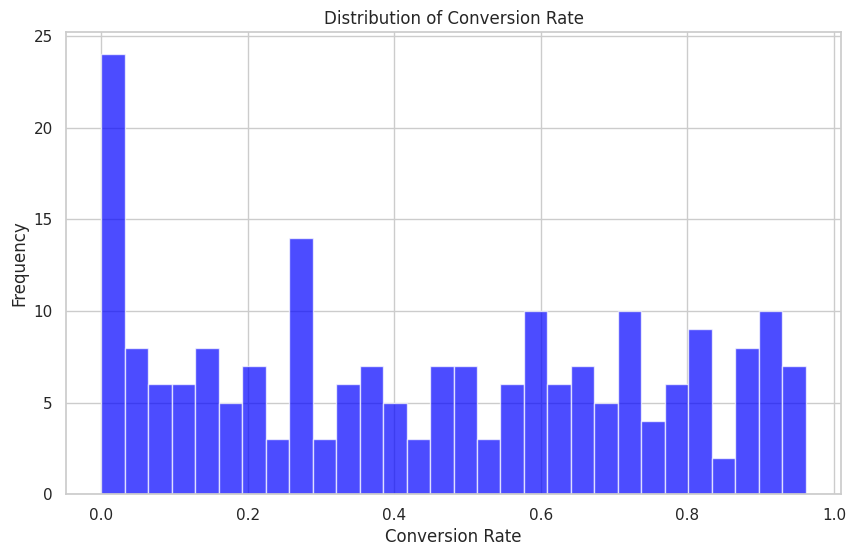

In [ ]:

# Create a histogram of the Average Order Value
plt.figure(figsize=(10, 6))  # Sets the figure size
plt.hist(df_factorial['Conversion Rate'].dropna(), bins=30, color='blue', alpha=0.7)
plt.title('Distribution of Conversion Rate')  # Adds a title to the histogram
plt.xlabel('Conversion Rate')  # Label for the x-axis
plt.ylabel('Frequency')  # Label for the y-axis
plt.grid(True)  # Adds a grid for better readability
plt.show()  # Displays the plot


>**TWO-WAY ANOVA & SUMMARY STATISTICS: After blocking using City Type and then randomly assigning each participant into two groups we use two-way ANOVA to find the significance of the blocking factor based on the p-value**

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Define the formula for the model
formula = 'Q("Conversion Rate") ~ Q("Group") + Q("Holiday") + Q("Discount") + Q("City_type")+ \
          Q("City_type"):C(Q("Holiday")) + Q("Holiday"):C(Q("Discount")) + \
          C(Q("City_type")):C(Q("Discount"))'

# Fit the model using ordinary least squares (OLS)
model_factorial = ols(formula, data=df_factorial).fit()

# Perform the ANOVA and print the results
anova_table = sm.stats.anova_lm(model_factorial, typ=2)
print(anova_table)
print(model_factorial.summary())

                                       sum_sq     df          F        PR(>F)
Q("Group")                           5.101116    3.0  18.006505  2.065170e-10
Q("Holiday")                         2.331296    1.0  24.687831  1.419151e-06
Q("Discount")                        0.846930    1.0   8.968772  3.084476e-03
Q("City_type")                       0.190820    1.0   2.020739  1.566831e-01
Q("City_type"):C(Q("Holiday"))       2.145321    2.0  11.359203  2.096341e-05
Q("Holiday"):C(Q("Discount"))        1.644018    2.0   8.704868  2.352377e-04
C(Q("City_type")):C(Q("Discount"))   0.413087    2.0   2.187242  1.148381e-01
Residual                            19.358352  205.0        NaN           NaN
                             OLS Regression Results                             
Dep. Variable:     Q("Conversion Rate")   R-squared:                       0.025
Model:                              OLS   Adj. R-squared:                 -0.004
Method:                   Least Squares   F-statistic: 

**Checking Assumptions for Two-Way ANOVA:**
1. IID: Independently & Identically distributed taken care of by random sampling.
2. Normality: Testing for normality of residuals after fitting the model using the Shapiro-Wilk test
3. Homoscedasticity: variances of the dependent variable should be approximately equal across the different groups using

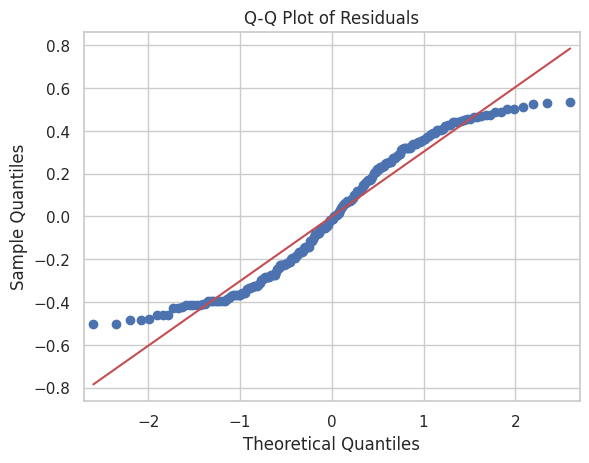

In [ ]:
residuals = model_factorial.resid
# Q-Q Plot to check for normality & heteroscedasticity
sm.qqplot(residuals, line='s')
plt.title('Q-Q Plot of Residuals')
plt.show()

**Post Hoc Analysis with Turkey HSD**

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd


# Perform the Post-Hoc analysis using Tukey's HSD test
tukey = pairwise_tukeyhsd(df_factorial['Conversion Rate'], df_factorial['Group'], alpha=0.05)

# Print the Tukey HSD results
print("\nTukey HSD Test Results:")
print(tukey)



Tukey HSD Test Results:
 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
 group1  group2 meandiff p-adj   lower  upper  reject
-----------------------------------------------------
Group 1 Group 2    0.044 0.8973 -0.1191 0.2072  False
Group 1 Group 3   0.0134 0.9961 -0.1417 0.1684  False
Group 1 Group 4   0.0129 0.9965 -0.1422 0.1679  False
Group 2 Group 3  -0.0307 0.9575 -0.1875 0.1262  False
Group 2 Group 4  -0.0312 0.9555  -0.188 0.1256  False
Group 3 Group 4  -0.0005    1.0 -0.1489 0.1479  False
-----------------------------------------------------


**Section 4.3: CONTINUOUS COVARIATES, ANCOVA, & ASSUMPTION CHECKS** <br>

><mark>**Assignment 2 - Adding 1 Continuous Covariate. Using Age as the continuous covariate** <br>

In [ ]:
# Setting the seed for reproducibility: so that our analysis and conclusions consistent
np.random.seed(42)

# Select 212 unique random participants
unique_participants = df['Participant ID'].unique()
selected_participants = np.random.choice(unique_participants, 212, replace=False)

# Filter the DataFrame to keep only the selected participants
factorial_df = df[df['Participant ID'].isin(selected_participants)].copy()

# Now only select the demographic features associated with each participant
# Selecting the demographic features associated with each participant
demographic_features = ['Participant ID', 'Age', 'Location']
# Filtering the DataFrame to include only the selected demographic features
# Also, making sure each participant is unique and only appears once
demographic_participant_df = factorial_df[demographic_features].drop_duplicates(subset='Participant ID').copy()

# Now we must randomly assign 53 participants to each of the four groups:
# Group1: Holiday + Percentage Markdown
# Group 2: Holiday + No Discount
# Group 3: No Holiday + Percentage Markdown
# Group 4: No Holiday + No Discount
# Defining the group combinations based on above factorial design
factorial_conditions = [
    # Group 1: Holiday + Percentage Markdown
    ('Yes', 'Percentage Markdown'),
    # Group 2: Holiday + No Discount
    ('Yes', 'No Discount'),
    # Group 3: No Holiday + Percentage Markdown
    ('No', 'Percentage Markdown'),
    # Group 4: No Holiday + No Discount
    ('No', 'No Discount')]

# There will be 4 groups
num_groups = len(factorial_conditions)
# Based on the power analysis we will evenly split 53 individuals per group
group_size = len(demographic_participant_df) // num_groups

# Initializing two lists to store assigned factor levels
holiday_assignments = []
discount_assignments = []

# Randomly assign participants to groups by shuffling the IDs randomly
np.random.shuffle(demographic_participant_df['Participant ID'].values)

# Assigning participants evenly to factorial groups using a loop
for i in range(len(demographic_participant_df)):
  # Cycling through the 4 groups in the given order
  group_index = i % num_groups
  # Getting the corresponding factor levels
  holiday, discount = factorial_conditions[group_index]
  # Appending the assigned holiday condition
  holiday_assignments.append(holiday)
  # Appending the assigned discount condition
  discount_assignments.append(discount)

# Adding the factor assignments to the DataFrame
demographic_participant_df['Holiday'] = holiday_assignments
demographic_participant_df['Discount'] = discount_assignments

# Now we will generate the dependent variables for this experiment specifically
n_samples = len(demographic_participant_df)

# Initializing activity data and using zeros as placeholders
frequency_of_visits = np.zeros(n_samples)
frequency_of_made_purchase = np.zeros(n_samples)

# Looping through each of the rows
for i in range(n_samples):
  # holds the holiday status ('Yes' or 'No') for the current participant
  holiday = holiday_assignments[i]
  # holds the discount type ('Percentage Markdown' or 'No Discount') for the current participant
  discount = discount_assignments[i]

  # For the following condition (i.e. the holiday variable is set to yes)
  if holiday == 'Yes':
    # Then we have to anticipate an increase in the frequency of visits from participants
    # So we create our dependent variables accordingly
    frequency_of_visits[i] = np.random.randint(10, 30)
  else:
    # If there are no holidays the traffic to the platform should be less
    # so we reflect that in the two dependent variables
    frequency_of_visits[i] = np.random.randint(5, 20)

  # For the following condition (i.e. Percentage Markdown is applied)
  # There will be Higher purchases and order value when discounts are applied
  if discount == 'Percentage Markdown':
    # Making sure that the purchases don't exceed the number of visits to solve the
    # case when there are zero visits there should be 0 purchases
    frequency_of_made_purchase[i] = np.random.randint(0, frequency_of_visits[i])
  else:
    # Making sure that the purchases don't exceed the number of visits
    frequency_of_made_purchase[i] = np.random.randint(0, frequency_of_visits[i])


# Calculating conversion rate: which is a just the purchases made to visits
conversion_rate = frequency_of_made_purchase / frequency_of_visits
conversion_rate = np.round(conversion_rate, 5)


# Rounding the values for the dependent variables
frequency_of_visits = np.round(frequency_of_visits, 2)
frequency_of_made_purchase = np.round(frequency_of_made_purchase, 2)


# Creating activity DataFrame
activity_data = pd.DataFrame({
    "Participant ID": demographic_participant_df["Participant ID"],
    "Frequency of Visits": frequency_of_visits,
    "Frequency of Made Purchase": frequency_of_made_purchase,
    "Conversion Rate": conversion_rate})

# Merging the demographic and activity data together
df_factorial = demographic_participant_df.merge(activity_data, on="Participant ID")
# Show the demographic data for the selected participants
df_factorial.head(10)

Participant ID  Age   Location Holiday             Discount  \
0             252   32  Vancouver     Yes  Percentage Markdown   
1              97   41   Montreal     Yes          No Discount   
2            5199   66     Oshawa      No  Percentage Markdown   
3            5441   60  Kitchener      No          No Discount   
4             714   20   Edmonton     Yes  Percentage Markdown   
5            3351   65    Calgary     Yes          No Discount   
6            7771   60   Hamilton      No  Percentage Markdown   
7            4004   69  Vancouver      No          No Discount   
8            3146   22    Halifax     Yes  Percentage Markdown   
9              40   35     Ottawa     Yes          No Discount   

   Frequency of Visits  Frequency of Made Purchase  Conversion Rate  
0                 26.0                        11.0          0.42308  
1                 14.0                        10.0          0.71429  
2                  8.0                         2.0          0.25000  
3                  8.0                         2.0          0.25000  
4                 26.0                         6.0          0.23077  
5                 13.0                         6.0          0.46154  
6                 17.0                        11.0          0.64706  
7                  5.0                         4.0          0.80000  
8                 28.0                        20.0          0.71429  
9                 29.0                        17.0          0.58621

**ANCOVA & SUMMARY STATISTICS:** <br>

> 'Age'is the continuous covariates
Group, Holiday and Discount will be the categorical variable <br>

>**SOURCE FOR ANCOVA CODE:** https://www.reneshbedre.com/blog/ancova.html

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

continuous_covariate = ['Age']
# Define the formula for the model
formula = 'Q("Conversion Rate") ~ Q("Age") + C(Q("Holiday")) + C(Q("Discount")) + \
          Q("Age"):C(Q("Holiday")) + Q("Age"):C(Q("Discount")) + \
          C(Q("Holiday")):C(Q("Discount"))'

# Fit the model using ordinary least squares (OLS)
model_factorial_c = ols(formula, data=df_factorial).fit()

# Perform the ANCOVA and print the results
# Use typ=3 for Type III SS: used in ANCOVA because it tests the main effects and interactions, adjusting for the presence of other factors
anova_table = sm.stats.anova_lm(model_factorial_c, typ=3)
print(anova_table)
print(model_factorial_c.summary())


                                     sum_sq     df         F    PR(>F)
Intercept                          0.806207    1.0  9.171471  0.002774
C(Q("Holiday"))                    0.050151    1.0  0.570519  0.450920
C(Q("Discount"))                   0.071975    1.0  0.818797  0.366594
C(Q("Holiday")):C(Q("Discount"))   0.160625    1.0  1.827281  0.177939
Q("Age")                           0.033892    1.0  0.385560  0.535332
Q("Age"):C(Q("Holiday"))           0.030516    1.0  0.347148  0.556381
Q("Age"):C(Q("Discount"))          0.099128    1.0  1.127686  0.289519
Residual                          18.020279  205.0       NaN       NaN
                             OLS Regression Results                             
Dep. Variable:     Q("Conversion Rate")   R-squared:                       0.027
Model:                              OLS   Adj. R-squared:                 -0.002
Method:                   Least Squares   F-statistic:                    0.9468
Date:                  Tue, 25 Feb 20

**Checking Assumptions for ANCOVA:**

> 1. IID: Independently & Identically distributed taken care of by random sampling.
2. Normality: Testing for normality of residuals after fitting the model using the Shapiro-Wilk test
3. Homoscedasticity: variances of the dependent variable should be approximately equal across the different groups using

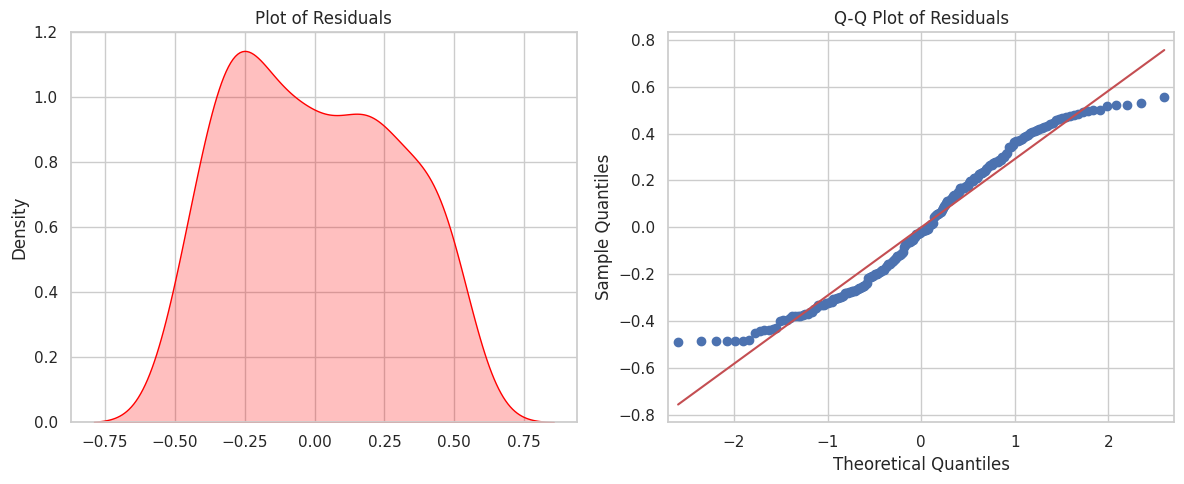

In [ ]:
# Get residuals after fitting the model
residual_factorial_c = model_factorial_c.resid

# Visualization: KDE plot and Q-Q plot for residuals
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# KDE plot for residuals with fill instead of shade
sns.kdeplot(residual_factorial_c, ax=ax[0], color='red', fill=True)
ax[0].set_title('Plot of Residuals')

# Q-Q plot
sm.qqplot(residual_factorial_c, line='s', ax=ax[1])
ax[1].set_title('Q-Q Plot of Residuals')

# Plotting the graphs below
plt.tight_layout()
plt.show()

In [ ]:
# Perform Shapiro-Wilk test on residuals
shapiro_resid = stats.shapiro(residual_factorial_c.dropna())

print(f'W: {round(shapiro_resid[0], 3)}, P-value: {round(shapiro_resid[1], 3)}')

W: 0.956, P-value: 0.0


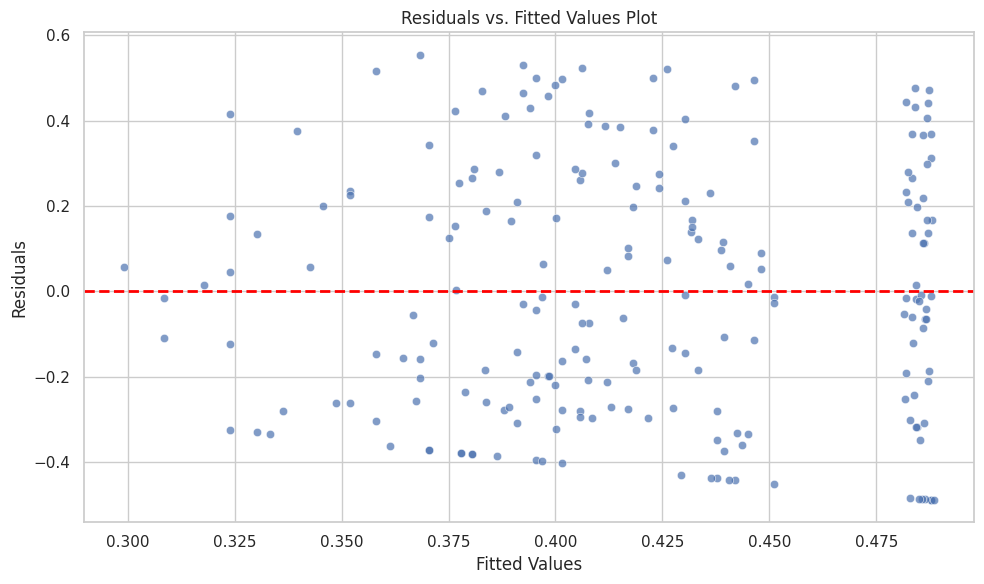

In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# Get the residuals and the fitted values
residual_factorial_c = model_factorial_c.resid
fitted_value = model_factorial_c.fittedvalues

# Plot Residuals vs. Fitted Values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=fitted_value, y=residual_factorial_c, alpha=0.7)
# Line at zero as a reference
plt.axhline(0, color='red', linestyle='--', linewidth=2)
plt.title("Residuals vs. Fitted Values Plot")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.tight_layout()
plt.show()

**Post Hoc Analysis with Turkey HSD**

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd


# Perform the Post-Hoc analysis using Tukey's HSD test
tukey1 = pairwise_tukeyhsd(df_factorial['Conversion Rate'], df_factorial['Holiday'], alpha=0.05)
tukey2 = pairwise_tukeyhsd(df_factorial['Conversion Rate'], df_factorial['Discount'], alpha=0.05)

# Print the Tukey HSD results
print("\nTukey HSD Test Results for Holiday:")
print(tukey1)
print("\nTukey HSD Test Results for Discount:")
print(tukey2)



Tukey HSD Test Results for Holiday:
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
    No    Yes   0.0225 0.5818 -0.0579 0.1028  False
---------------------------------------------------

Tukey HSD Test Results for Discount:
         Multiple Comparison of Means - Tukey HSD, FWER=0.05         
   group1          group2       meandiff p-adj   lower  upper  reject
---------------------------------------------------------------------
No Discount Percentage Markdown   0.0505 0.2157 -0.0296 0.1306  False
---------------------------------------------------------------------


**Section 4.4: COMBINING BLOCKING & CONTINUOUS COVARIATES, ANCOVA FOR BOTH, & ASSUMPTION CHECKS** <br>

><mark>**Assignment 2 - BONUS PART: Running another set of two-way ANOVAs with both the blocking factor and continuous covariates for factorial design subset of data.** <br>

In [ ]:
#-----------------------------------------------------------------ASSIGNMENT 2: BLOCKING USING City Type -----------------------------------------------------------------------#
# add blocking factor for Factorial design
# Setting the seed for reproducibility: so that our analysis and conclusions consistent
np.random.seed(42)

# Create a new column for city population level
df['City_type'] = ''

# Loop through each row to categorize the city Population
for index, row in df.iterrows():
    if row['City Population'] >= 500000:
        df.at[index, 'City_type'] = 'Big City'
    elif row['City Population'] < 500000:
        df.at[index, 'City_type'] = 'Small City'

# Create a dictionary to store the participants by city population level
city_samples = {}
# Create labels to categorize each of the city popualtion per participant
city_label = ['Big City', 'Small City']

# Looping through each city popualtion level and randomly select 106 participants
for City_type in city_label:
    selected_city = df[df['City_type'] == City_type].sample(n=106, random_state=42)
    city_samples[City_type] = selected_city

# Combine all selected participants from the dictionary into one DataFrame
selected_participants = pd.concat(city_samples.values())

# Find remaining participants who were not selected
remaining_participants = df[~df['Participant ID'].isin(selected_participants['Participant ID'])]

# Count how many participants are in each level
city_level_counts = selected_participants['City_type'].value_counts()
#-----------------------------------------------------------------ASSIGNMENT 2: BLOCKING USING City Type END-----------------------------------------------------------------------#

# Filter the DataFrame to keep only the selected participants
factorial_df = df[df['Participant ID'].isin(selected_participants)].copy()

# Separate participants by City_type
big_city_participants = selected_participants[selected_participants['City_type'] == 'Big City']
small_city_participants = selected_participants[selected_participants['City_type'] == 'Small City']

# We will randomly assign participants from both groups to the 4 groups evenly.
# Randomly assign participants from Big City to 4 groups
big_city_participants['Group'] = np.random.choice(['Group 1', 'Group 2', 'Group 3', 'Group 4'],
                                                   size=big_city_participants.shape[0], replace=True)

# Randomly assign participants from Small City to 4 groups
small_city_participants['Group'] = np.random.choice(['Group 1', 'Group 2', 'Group 3', 'Group 4'],
                                                     size=small_city_participants.shape[0], replace=True)

# Combine the Big City and Small City participants back together
final_selected_participants = pd.concat([big_city_participants, small_city_participants])

# Now we create the demographic and factorial data for these participants
# Filter the original df for demographic features of selected participants
# Add age as a continuous Covariate
demographic_features = ['Participant ID', 'Location','Group', 'City_type', 'Age']
demographic_participant_df = final_selected_participants[demographic_features].drop_duplicates(subset='Participant ID').copy()

# Now we must randomly assign 53 participants to each of the four groups:
# Group1: Holiday + Percentage Markdown
# Group 2: Holiday + No Discount
# Group 3: No Holiday + Percentage Markdown
# Group 4: No Holiday + No Discount
# Defining the group combinations based on above factorial design
factorial_conditions = [
    # Group 1: Holiday + Percentage Markdown
    ('Yes', 'Percentage Markdown'),
    # Group 2: Holiday + No Discount
    ('Yes', 'No Discount'),
    # Group 3: No Holiday + Percentage Markdown
    ('No', 'Percentage Markdown'),
    # Group 4: No Holiday + No Discount
    ('No', 'No Discount')]

# There will be 4 groups
num_groups = len(factorial_conditions)
# Based on the power analysis we will evenly split 53 individuals per group
group_size = len(demographic_participant_df) // num_groups

# Initializing two lists to store assigned factor levels
holiday_assignments = []
discount_assignments = []

# Assigning d groups of participants to factorial groups using a loop
for index, row in demographic_participant_df.iterrows():
    # Get the group assigned to the participant
    group = row['Group']
    # Map the group to the corresponding factorial condition (Holiday, Discount)
    if group == 'Group 1':
        holiday, discount = factorial_conditions[0]
    elif group == 'Group 2':
        holiday, discount = factorial_conditions[1]
    elif group == 'Group 3':
        holiday, discount = factorial_conditions[2]
    elif group == 'Group 4':
        holiday, discount = factorial_conditions[3]
    # Append the corresponding holiday and discount values
    holiday_assignments.append(holiday)
    discount_assignments.append(discount)

# Adding the factor assignments to the DataFrame
demographic_participant_df['Holiday'] = holiday_assignments
demographic_participant_df['Discount'] = discount_assignments

# Now we will generate the dependent variables for this experiment specifically
n_samples = len(demographic_participant_df)

# Initializing activity data and using zeros as placeholders
frequency_of_visits = np.zeros(n_samples)
frequency_of_made_purchase = np.zeros(n_samples)

# Looping through each of the rows
for i in range(n_samples):
  # holds the holiday status ('Yes' or 'No') for the current participant
  holiday = holiday_assignments[i]
  # holds the discount type ('Percentage Markdown' or 'No Discount') for the current participant
  discount = discount_assignments[i]

  # For the following condition (i.e. the holiday variable is set to yes)
  if holiday == 'Yes':
    # Then we have to anticipate an increase in the frequency of visits from participants
    # So we create our dependent variables accordingly
    frequency_of_visits[i] = np.random.randint(10, 30)
  else:
    # If there are no holidays the traffic to the platform should be less
    # so we reflect that in the two dependent variables
    frequency_of_visits[i] = np.random.randint(5, 20)

  # For the following condition (i.e. Percentage Markdown is applied)
  # There will be Higher purchases and order value when discounts are applied
  if discount == 'Percentage Markdown':
    # Making sure that the purchases don't exceed the number of visits to solve the
    # case when there are zero visits there should be 0 purchases
    frequency_of_made_purchase[i] = np.random.randint(0, frequency_of_visits[i])
  else:
    # Making sure that the purchases don't exceed the number of visits
    frequency_of_made_purchase[i] = np.random.randint(0, frequency_of_visits[i])


# Calculating conversion rate: which is a just the purchases made to visits
conversion_rate = frequency_of_made_purchase / frequency_of_visits
conversion_rate = np.round(conversion_rate, 5)


# Rounding the values for the dependent variables
frequency_of_visits = np.round(frequency_of_visits, 2)
frequency_of_made_purchase = np.round(frequency_of_made_purchase, 2)


# Creating activity DataFrame
activity_data = pd.DataFrame({
    "Participant ID": demographic_participant_df["Participant ID"],
    "Frequency of Visits": frequency_of_visits,
    "Frequency of Made Purchase": frequency_of_made_purchase,
    "Conversion Rate": conversion_rate})

# Merging the demographic and activity data together
df_factorial = demographic_participant_df.merge(activity_data, on="Participant ID")

# Show the demographic data for the selected participants
df_factorial.head(10)


<ipython-input-91-0f52c7ebfe23>:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  big_city_participants['Group'] = np.random.choice(['Group 1', 'Group 2', 'Group 3', 'Group 4'],
<ipython-input-91-0f52c7ebfe23>:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  small_city_participants['Group'] = np.random.choice(['Group 1', 'Group 2', 'Group 3', 'Group 4'],


Participant ID   Location    Group City_type  Age Holiday  \
0             348   Edmonton  Group 3  Big City   39      No   
1            5586   Edmonton  Group 4  Big City   55      No   
2            2305  Vancouver  Group 1  Big City   37     Yes   
3            2533    Calgary  Group 3  Big City   31      No   
4            1629   Montreal  Group 3  Big City   38      No   
5            2778   Edmonton  Group 4  Big City   18      No   
6            4774     Ottawa  Group 1  Big City   54     Yes   
7            6639   Edmonton  Group 1  Big City   25     Yes   
8            8167   Edmonton  Group 3  Big City   48      No   
9            7572   Montreal  Group 2  Big City   47     Yes   

              Discount  Frequency of Visits  Frequency of Made Purchase  \
0  Percentage Markdown                 17.0                        14.0   
1          No Discount                 15.0                        12.0   
2  Percentage Markdown                 13.0                        12.0   
3  Percentage Markdown                 11.0                        10.0   
4  Percentage Markdown                  7.0                         5.0   
5          No Discount                 16.0                         1.0   
6  Percentage Markdown                 19.0                        12.0   
7  Percentage Markdown                 15.0                        11.0   
8  Percentage Markdown                 16.0                        11.0   
9          No Discount                 21.0                        19.0   

   Conversion Rate  
0          0.82353  
1          0.80000  
2          0.92308  
3          0.90909  
4          0.71429  
5          0.06250  
6          0.63158  
7          0.73333  
8          0.68750  
9          0.90476

**ANCOVA & SUMMARY STATISTICS:** <br>

> 'Age' is the continuous covariates, City Type will be a categorical blocking factor, and Group, Holiday and Discount will be the categorical variable<br>

>**SOURCE FOR ANCOVA CODE:** https://www.reneshbedre.com/blog/ancova.html

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Create model
formula = 'Q("Conversion Rate") ~ Q("Age") + C(Q("City_type")) + C(Q("Group")) + C(Q("Holiday")) + C(Q("Discount"))'

# Fit the model using ordinary least squares (OLS)
model_factorial_2 = sm.formula.ols(formula, data=df_factorial).fit()

# Perform ANOVA and print the table
anova_table = sm.stats.anova_lm(model_factorial_2, typ=2)  # Using Type II SS
print(anova_table)

# Print a detailed summary of the model
print(model_factorial_2.summary())


                      sum_sq     df          F        PR(>F)
C(Q("City_type"))   0.033838    1.0   0.354301  5.523416e-01
C(Q("Group"))       3.168792    3.0  11.059487  9.202332e-07
C(Q("Holiday"))     0.681691    1.0   7.137570  8.152159e-03
C(Q("Discount"))    0.372794    1.0   3.903296  4.952650e-02
Q("Age")            0.088049    1.0   0.921904  3.381011e-01
Residual           19.674546  206.0        NaN           NaN
                             OLS Regression Results                             
Dep. Variable:     Q("Conversion Rate")   R-squared:                       0.009
Model:                              OLS   Adj. R-squared:                 -0.015
Method:                   Least Squares   F-statistic:                    0.3671
Date:                  Tue, 25 Feb 2025   Prob (F-statistic):              0.871
Time:                          04:38:33   Log-Likelihood:                -48.825
No. Observations:                   212   AIC:                             109.7
Df Res

**Checking Assumptions for COMBINED ANCOVA:**

> 1. IID: Independently & Identically distributed taken care of by random sampling.
2. Normality: Testing for normality of residuals after fitting the model using the Shapiro-Wilk test
3. Homoscedasticity: variances of the dependent variable should be approximately equal across the different groups using

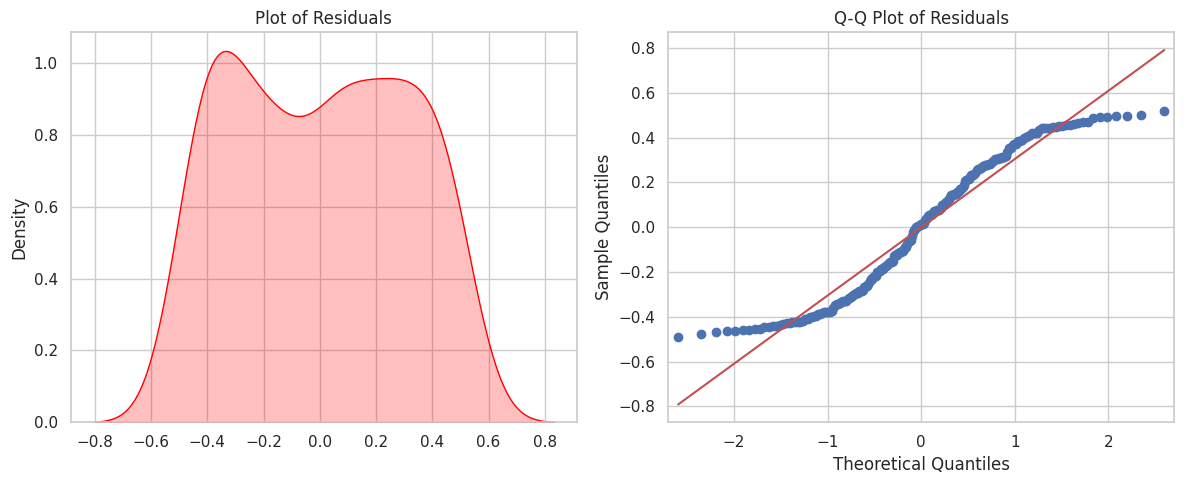

In [ ]:
import seaborn as sns
import statsmodels.api as sm

# Get residuals after fitting the model
residual_factorial_2 = model_factorial_2.resid

# Visualization: KDE plot and Q-Q plot for residuals
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# KDE plot for residuals with fill instead of shade
sns.kdeplot(residual_factorial_2, ax=ax[0], color='red', fill=True)
ax[0].set_title('Plot of Residuals')

# Q-Q plot
sm.qqplot(residual_factorial_2, line='s', ax=ax[1])
ax[1].set_title('Q-Q Plot of Residuals')

# Plotting the graphs below
plt.tight_layout()
plt.show()

In [ ]:
# Perform Shapiro-Wilk test on residuals
shapiro_residual = stats.shapiro(residual_factorial_2.dropna())

print(f'W: {round(shapiro_residual[0], 3)}, P-value: {round(shapiro_residual[1], 3)}')

W: 0.938, P-value: 0.0


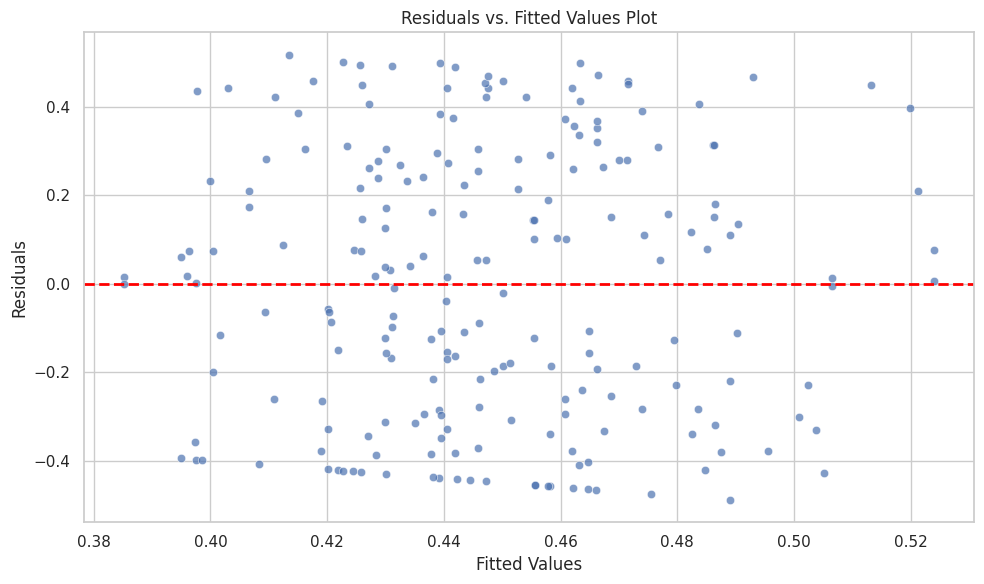

In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# Get the residuals and the fitted values
residual_factorial_2 = model_factorial_2.resid
fitted_value = model_factorial_2.fittedvalues

# Plot Residuals vs. Fitted Values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=fitted_value, y=residual_factorial_2, alpha=0.7)
# Line at zero as a reference
plt.axhline(0, color='red', linestyle='--', linewidth=2)
plt.title("Residuals vs. Fitted Values Plot")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.tight_layout()
plt.show()

**Post Hoc Analysis with Turkey HSD**

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd


# Perform the Post-Hoc analysis using Tukey's HSD test
tukey1 = pairwise_tukeyhsd(df_factorial['Conversion Rate'], df_factorial['Group'], alpha=0.05)

# Print the Tukey HSD results
print("\nTukey HSD Test Results:")
print(tukey1)


Tukey HSD Test Results:
 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
 group1  group2 meandiff p-adj   lower  upper  reject
-----------------------------------------------------
Group 1 Group 2    0.044 0.8973 -0.1191 0.2072  False
Group 1 Group 3   0.0134 0.9961 -0.1417 0.1684  False
Group 1 Group 4   0.0129 0.9965 -0.1422 0.1679  False
Group 2 Group 3  -0.0307 0.9575 -0.1875 0.1262  False
Group 2 Group 4  -0.0312 0.9555  -0.188 0.1256  False
Group 3 Group 4  -0.0005    1.0 -0.1489 0.1479  False
-----------------------------------------------------


**Flowchart for Factorial design with the blocking factor**

In [ ]:
!pip install schemdraw
import schemdraw
from schemdraw import flow

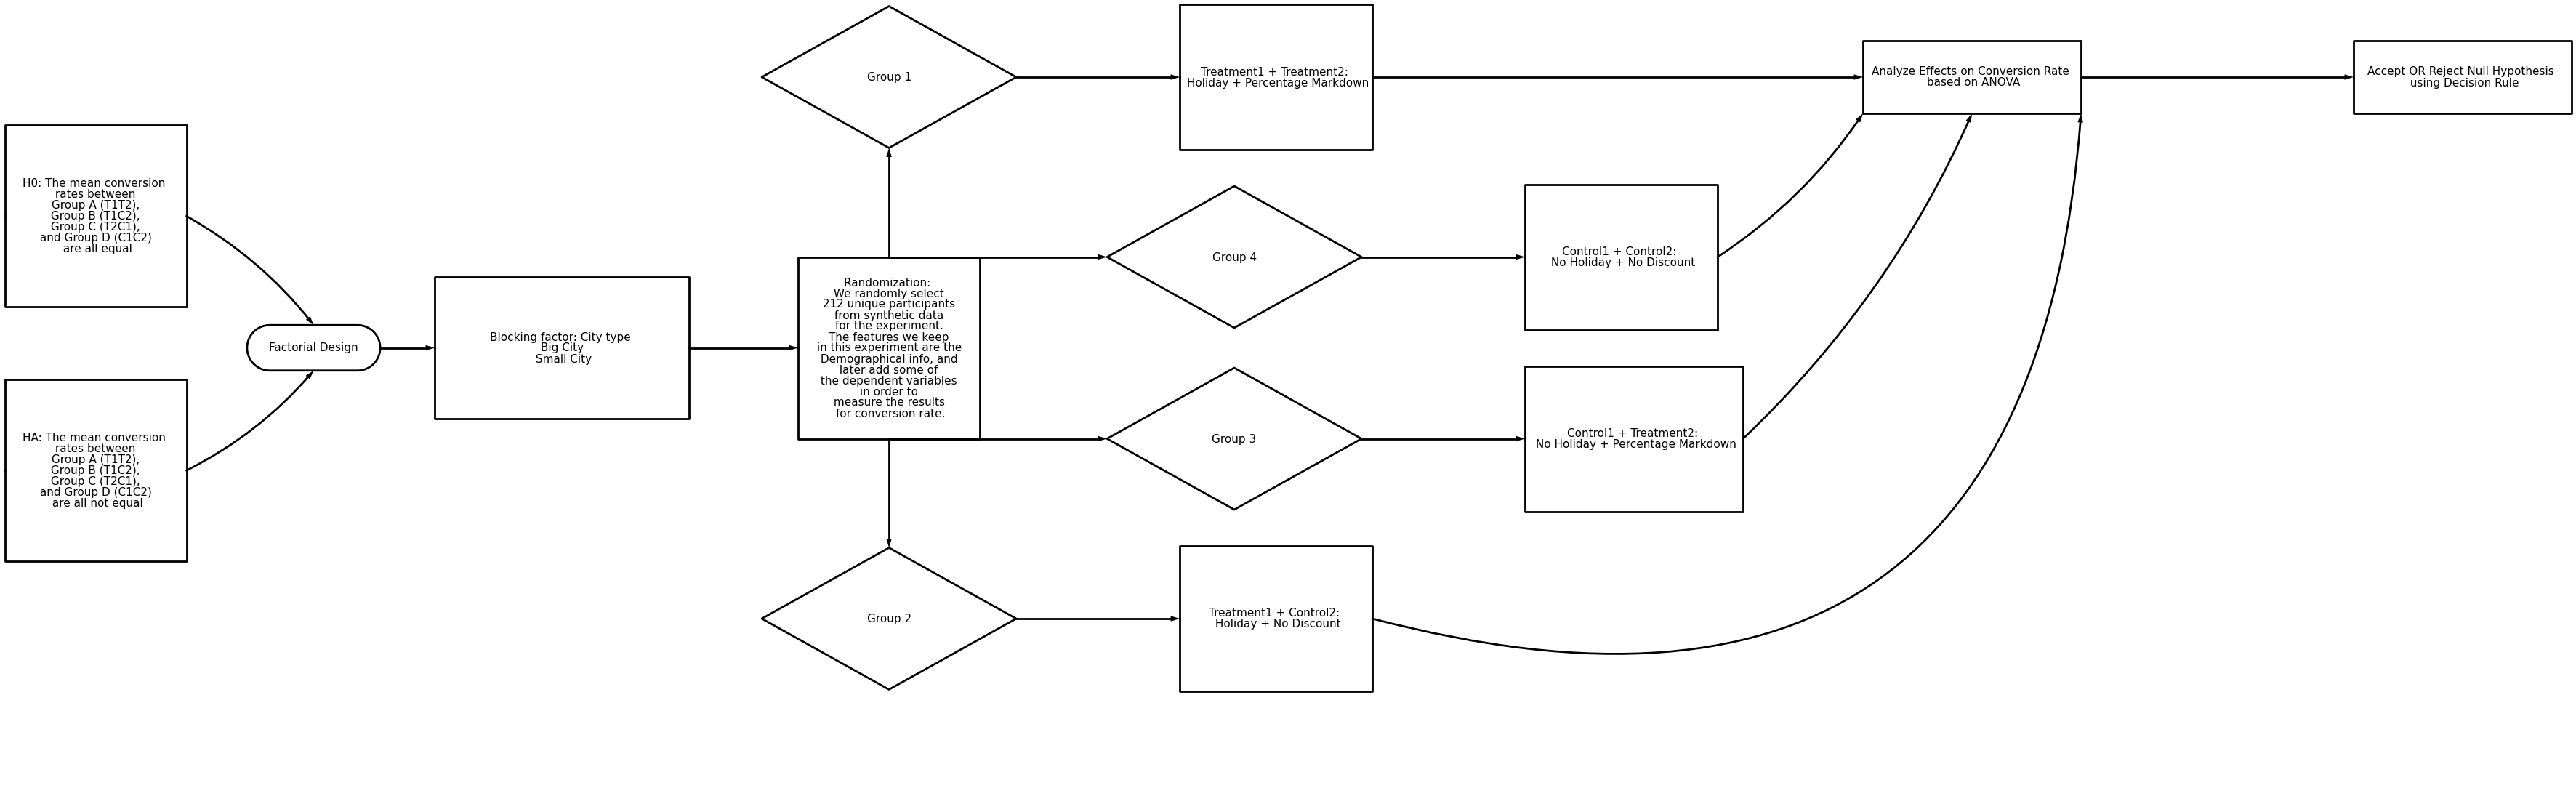

In [ ]:
with schemdraw.Drawing() as d:

    d.config(fontsize=11)
    A = flow.Box(w=5, h=5).label('H0: The mean conversion \n rates between \n Group A (T1T2), \n Group B (T1C2), \n Group C (T2C1), \n and Group D (C1C2) \n are all equal').at((0, 0))
    A1 = flow.Box(w=5, h=5).label('HA: The mean conversion \n rates between \n Group A (T1T2), \n Group B (T1C2), \n Group C (T2C1), \n and Group D (C1C2) \n are all not equal').at((0, -7))
    b = flow.Start().label('Factorial Design').at((8.5,-3))
    flow.Arc2(k=.1, arrow='->').at(A.E).to(b.N)
    flow.Arc2(k=-.1, arrow='->').at(A1.E).to(b.S)
    flow.Arrow().right(d.unit/2).at(b.E)
    d1 = flow.Box(w=7, h=3.9).label('Blocking factor: City type \n Big City \n Small City')
    flow.Arrow().right(d.unit* 1).at(d1.E)
    d1 = flow.Box(w=5, h=5).label('Randomization: \n We randomly select \n 212 unique participants \n from synthetic data \n for the experiment. \n The features we keep \n in this experiment are the \n Demographical info, and \n later add some of \n the dependent variables \n in order to \n measure the results \n for conversion rate.')
    flow.Arrow().up(d.unit*1).at(d1.N)
    d2 = flow.Decision(w=7, h=3.9).label('Group 1')
    flow.Arrow().down(d.unit*1).at(d1.S)
    d3 = flow.Decision(w=7, h=3.9).label('Group 2')
    flow.Arrow().right(d.unit*2).at(d1.S)
    d4 = flow.Decision(w=7, h=3.9).label('Group 3')
    flow.Arrow().right(d.unit*2).at(d1.N)
    d5 = flow.Decision(w=7, h=3.9).label('Group 4')

    flow.Arrow().right(d.unit*1.5).at(d2.E)
    d6 = flow.Box(w=5.3, h=4.0).anchor('W').label('Treatment1 + Treatment2: \n Holiday + Percentage Markdown')

    flow.Arrow().right(d.unit*1.5).at(d3.E)
    d7 = flow.Box(w=5.3, h=4.0).anchor('W').label('Treatment1 + Control2: \n Holiday + No Discount')

    flow.Arrow().right(d.unit*1.5).at(d4.E)
    d8 = flow.Box(w=6, h=4.0).anchor('W').label('Control1 + Treatment2: \n No Holiday + Percentage Markdown')

    flow.Arrow().right(d.unit*1.5).at(d5.E)
    d9 = flow.Box(w=5.3, h=4.0).anchor('W').label('Control1 + Control2: \n No Holiday + No Discount')


    flow.Arrow().right(d.unit*4.5).at(d6.E)
    C = flow.Box(w=6, h=2).label('Analyze Effects on Conversion Rate \n based on ANOVA')
    flow.Arc2(k=-.6, arrow='->').at(d7.E).to(C.SE)
    flow.Arc2(k=-.1, arrow='->').at(d8.E).to(C.S)
    flow.Arc2(k=-.1, arrow='->').at(d9.E).to(C.SW)

    flow.Arrow().right(d.unit*2.5).at(C.E)
    D = flow.Box(w=6, h=2).label('Accept OR Reject Null Hypothesis \n using Decision Rule')



# --------------------- END OF FACTORIAL DESIGN CODE ----------------------------

#**5. Matched Pairs Design**

**Section 5.1: Power Analysis, Sample Size, & Associated Graph** </br>
Power: 0.85 <br>
Effect Size: Medium (0.5)</br>
Sample Size: 76</br>
Dependent Variable: Session Duration<br>




In [ ]:
from statsmodels.stats.power import FTestAnovaPower

# Power Analysis for Matched Pair Design Scenario with Three Conditions

# Medium effect size
effect_size = 0.5

# Significance level (alpha)
alpha = 0.05

# Desired power
power = 0.85

# Creating a power analysis object for F-test (ANOVA)
analysis = FTestAnovaPower()

# Calculating the required sample size per group using the effect size
required_sample_size_per_group = analysis.solve_power(effect_size=effect_size,k_groups=number_groups, alpha=alpha, power=power)

# Round the result to the nearest integer
required_sample_size_per_group = round(required_sample_size_per_group)

# Total sample size for the experiment (across all three groups)
total_sample_size = required_sample_size_per_group * number_groups

# Output the results
print(f"Required sample size per group: {required_sample_size_per_group}")
print(f"Total sample size for all groups: {total_sample_size}")

Required sample size per group: 53
Total sample size for all groups: 212


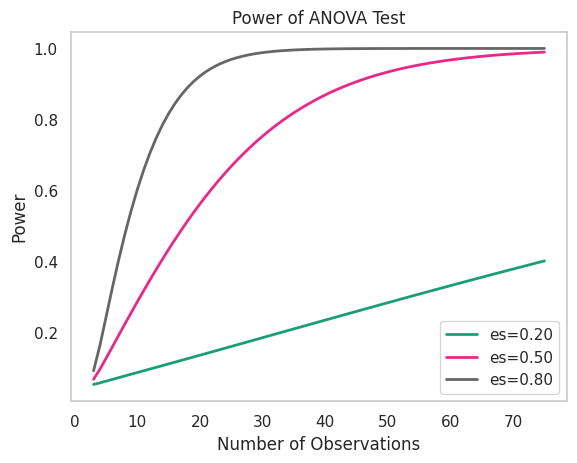

In [ ]:
from numpy import array
from matplotlib import pyplot

# Power vs. number of observations
# Parameters for power analysis
# The larger the effect size, the less likely it is to be random error.
effect_sizes = array([0.2, 0.5, 0.8])
sample_sizes = array(range(2, 76))


# Calculate power curves from multiple power analyses.
# Assume a significance of 0.05 and explore the change in sample size between 2 and 100 with low (es=0.2), medium (es=0.5), and high effect (es=0.8)sizes.
analysis = FTestAnovaPower()
analysis.plot_power(dep_var='nobs', nobs=sample_sizes, effect_size=effect_sizes, alpha=0.05, title='Power of ANOVA Test')
pyplot.grid()
pyplot.ylabel('Power')
pyplot.show()

**Section 5.2: BLOCKING, TWO-WAY ANOVA, & ASSUMPTION CHECKS** <br>

><mark>**Assignment 2 - Blocking for Matched Pair Design using Age Group as blocking factor** <br>

> People who have previously exposed to social media promotions might stay shorter online to browse and purchase, because they might have alread known what they want and what to buy from the website. regardless of the promotion. <br>
Confounding Effect: If a specific promotion is on people who have exposed to social media promotion VS people who have not exposed to social media promotion, the promotion's effect on session duration may be overestimated. <br>


In [ ]:
# Setting the seed for reproducibility
np.random.seed(42)

# Select 38 people who have been exposed to social media promotion and 38 participants who have not been exposed
exposed_participants = df[df['Exposure to Social Media Promotion'] == 'Yes']['Participant ID'].unique()
non_exposed_participants = df[df['Exposure to Social Media Promotion'] == 'No']['Participant ID'].unique()

selected_exposed = np.random.choice(exposed_participants, 38, replace=False)
selected_non_exposed = np.random.choice(non_exposed_participants, 38, replace=False)

# Combine selected participants
selected_participants = np.concatenate([selected_exposed, selected_non_exposed])

# Filter the DataFrame to keep only the selected participants
matched_pairs_df = df[df['Participant ID'].isin(selected_participants)].copy()

>**Randomization for Matched Pair Design After Blocking Done Above**

In [ ]:
# Setting the seed for reproducibility
np.random.seed(42)
# Selecting demographic features
demographic_features = ['Participant ID', 'Age', 'Gender', 'Location', 'Income', 'Exposure to Social Media Promotion']
demographic_participant_df = matched_pairs_df[demographic_features].drop_duplicates(subset='Participant ID').copy()

# Sorting for better pair matching based on 'Exposure to Social Media Promotion' and 'Age'
demographic_participant_df.sort_values(by=['Exposure to Social Media Promotion', 'Age'], inplace=True)

# Reset the pairing track and dictionary
paired_participants = {}
paired_participant_track = set()
pair_count = 1

# Defining the treatments
treatments = ['Percentage Markdown']
control = 'No Discount'

# Convert dataframe to list for easier iteration
participant_list = demographic_participant_df.values.tolist()

# Creating a dictionary to store the assigned treatment for each participant
participant_treatment_mapping = {}

# Iterating through participants to form pairs based on same exposure to social media promotion
for i in range(len(participant_list)):
    if participant_list[i][0] in paired_participant_track:
        continue

    for j in range(i + 1, len(participant_list)):
        if participant_list[j][0] in paired_participant_track:
            continue

        # Checking if the participants have the same exposure status
        if participant_list[i][5] == participant_list[j][5]:  # 'Exposure to Social Media Promotion' is indexed at 5
            paired_participant_track.add(participant_list[i][0])
            paired_participant_track.add(participant_list[j][0])

            # Randomly decide which participant gets the treatment
            if np.random.rand() < 0.5:
                treatment_receiver = participant_list[i][0]
                control_receiver = participant_list[j][0]
            else:
                treatment_receiver = participant_list[j][0]
                control_receiver = participant_list[i][0]

            # Randomly select a treatment
            assigned_treatment = np.random.choice(treatments)

            # Assigning treatment and control
            participant_treatment_mapping[treatment_receiver] = assigned_treatment
            participant_treatment_mapping[control_receiver] = control

            # Storing the pair in the dictionary
            paired_participants[pair_count] = {
                'Pair': {'Participant 1': participant_list[i], 'Participant 2': participant_list[j]},
                'Treatment Receiver': treatment_receiver, 'Assigned Treatment': assigned_treatment,
                'Control Receiver': control_receiver, 'Control Group': control
            }

            pair_count += 1
            break  # Move to the next unpaired participant

# Converting the treatment mapping back into a DataFrame
treatment_df = pd.DataFrame(list(participant_treatment_mapping.items()), columns=['Participant ID', 'Assigned Condition'])

# Merging the treatment information with the demographic DataFrame
paired_participant_df = demographic_participant_df.merge(treatment_df, on='Participant ID', how='left')

# Defining session duration based on treatment assignment
session_durations = {"Percentage Markdown": (700, 2500), "No Discount": (0, 1500)}

# Defining a function to create a column for our dependent variable: Session duration
def generate_session_duration(condition):
    if condition in session_durations:
        min_duration, max_duration = session_durations[condition]
        return round(np.random.uniform(min_duration, max_duration), 2)
    return 0

# Applying the function to generate session durations
paired_participant_df['Session Duration'] = paired_participant_df['Assigned Condition'].apply(generate_session_duration)

print(f"Total number of pairs created: {len(paired_participants)}")
print('\n')

# Preview the updated dataframe with treatment assignments
paired_participant_df.head(76)

Total number of pairs created: 38




Participant ID  Age  Gender     Location  Income  \
0             3944   18  Female       Regina   39901   
1             9142   21    Male       Ottawa  129626   
2              816   25    Male  Quebec City   16399   
3             7026   25  Female     Victoria   54688   
4             1281   26    Male      Windsor   66123   
..             ...  ...     ...          ...     ...   
71            5025   61  Female  Quebec City  159275   
72            3327   66    Male     Edmonton  134433   
73            9128   66    Male   St. John's  125237   
74             197   68    Male      Calgary   98307   
75            2112   68  Female      Windsor  193719   

   Exposure to Social Media Promotion   Assigned Condition  Session Duration  
0                                  No  Percentage Markdown           1931.62  
1                                  No          No Discount            660.23  
2                                  No          No Discount            183.06  
3                                  No  Percentage Markdown           1591.32  
4                                  No          No Discount             51.58  
..                                ...                  ...               ...  
71                                Yes  Percentage Markdown            838.56  
72                                Yes  Percentage Markdown           1221.55  
73                                Yes          No Discount            241.83  
74                                Yes  Percentage Markdown           2373.46  
75                                Yes          No Discount           1212.18  

[76 rows x 8 columns]

**List out all combinations after adding blocking factor**

In [ ]:
# Add a column to identify the treatment/control status for each participant
paired_participant_df['Treatment Status'] = paired_participant_df['Assigned Condition'].apply(lambda x: 'Treatment' if x == 'Percentage Markdown' else 'Control')

# Create combinations of Exposure to Social Media Promotion, Gender, and Treatment Status
combinations_count = paired_participant_df.groupby(['Exposure to Social Media Promotion', 'Gender', 'Treatment Status']).size().reset_index(name='Count')

# Display the count of each combination
print(combinations_count)


  Exposure to Social Media Promotion  Gender Treatment Status  Count
0                                 No  Female          Control      8
1                                 No  Female        Treatment     14
2                                 No    Male          Control     11
3                                 No    Male        Treatment      5
4                                Yes  Female          Control      9
5                                Yes  Female        Treatment      8
6                                Yes    Male          Control     10
7                                Yes    Male        Treatment     11


>**Checking for Normality of Dependent Variable: Session Duration**

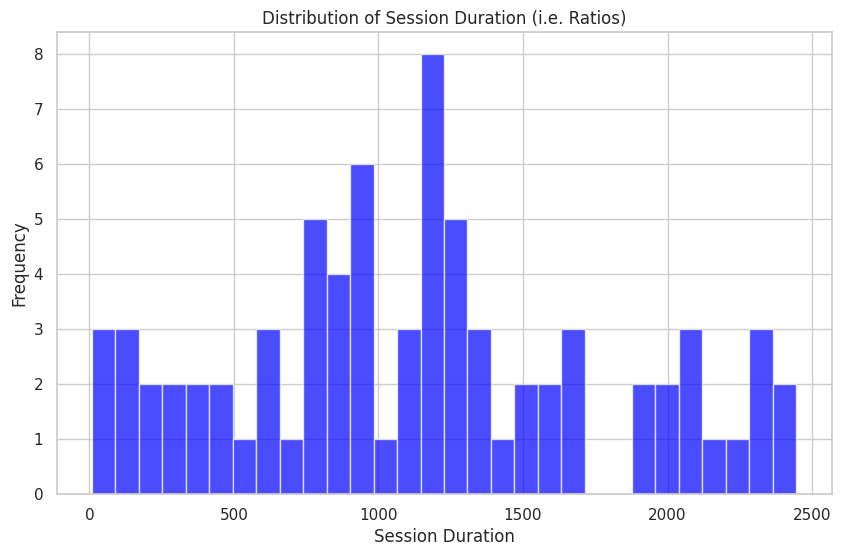

In [ ]:
# Create a histogram of the Conversion Rate
plt.figure(figsize=(10, 6))
plt.hist(paired_participant_df['Session Duration'].dropna(), bins=30, color='blue', alpha=0.7)
# Adds a title to the histogram
plt.title('Distribution of Session Duration (i.e. Ratios)')
# Label for the x-axis
plt.xlabel('Session Duration')
# Label for the y-axis
plt.ylabel('Frequency')
# Adds a grid for better readability
plt.grid(True)
# Displays the plot
plt.show()

In [ ]:
from scipy import stats

# Perform Shapiro-Wilk test on Conversion_Rate and print result
shapiroUnem = stats.shapiro(paired_participant_df['Session Duration'].dropna())

print(f'W: {round(shapiroUnem[0],3)}, P-value: {round(shapiroUnem[1],3)}')

W: 0.968, P-value: 0.05


>**TWO-WAY ANOVA & SUMMARY STATISTICS: After blocking using age group and then randomly assigning each participant into pairs we use two-way ANOVA to find the significance of the blocking factor based on the p-value**

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Define the formula for the model
# Here 'Session Duration' is set as the dependent variable
# 'Exposure to Social Media Promotion', 'Assigned Condition', and 'Gender' are the independent variables
formula = 'Q("Session Duration") ~ Q("Exposure to Social Media Promotion") + Q("Assigned Condition") + Q("Gender") + Q("Exposure to Social Media Promotion"):Q("Assigned Condition") + Q("Exposure to Social Media Promotion"):Q("Gender") + Q("Assigned Condition"):Q("Gender") + Q("Exposure to Social Media Promotion"):Q("Assigned Condition"):Q("Gender")'

# Fit the model using ordinary least squares (OLS)
model_matched = ols(formula, data=paired_participant_df).fit()

# Perform the ANOVA and print the results
anova_table = sm.stats.anova_lm(model_matched, typ=2) # typ=2 for ANOVA Type II which considers each factor's effect adjusted for other factors
print(anova_table)
print(model_matched.summary())

                                                          sum_sq    df  \
Q("Exposure to Social Media Promotion")             2.555276e+05   1.0   
Q("Assigned Condition")                             1.288410e+07   1.0   
Q("Gender")                                         3.262617e+03   1.0   
Q("Exposure to Social Media Promotion"):Q("Assi...  4.889727e+05   1.0   
Q("Exposure to Social Media Promotion"):Q("Gend...  5.161692e+04   1.0   
Q("Assigned Condition"):Q("Gender")                 1.343297e+06   1.0   
Q("Exposure to Social Media Promotion"):Q("Assi...  2.582668e+05   1.0   
Residual                                            1.618611e+07  68.0   

                                                            F        PR(>F)  
Q("Exposure to Social Media Promotion")              1.073505  3.038255e-01  
Q("Assigned Condition")                             54.127789  3.213031e-10  
Q("Gender")                                          0.013707  9.071453e-01  
Q("Exposure to Social

In [ ]:
#------------------------------------------------------------------------------ TUKEY HSD TEST -----------------------------------------------------------------------------------------------#
# Perform Tukey's HSD for DiscountType
tukey_results_matched_pair = pairwise_tukeyhsd(
    paired_participant_df['Session Duration'],
    paired_participant_df['Assigned Condition']
)

print("\nTukey HSD Test Results:")
print(tukey_results_matched_pair)


Tukey HSD Test Results:
          Multiple Comparison of Means - Tukey HSD, FWER=0.05           
   group1          group2       meandiff p-adj  lower     upper   reject
------------------------------------------------------------------------
No Discount Percentage Markdown 843.1161   0.0 616.5279 1069.7042   True
------------------------------------------------------------------------


**Checking Assumptions for Two-Way ANOVA:**

> 1. IID: Independently & Identically distributed taken care of by random sampling.
2. Normality: Testing for normality of residuals after fitting the model using the Shapiro-Wilk test
3. Homoscedasticity: variances of the dependent variable should be approximately equal across the different groups using

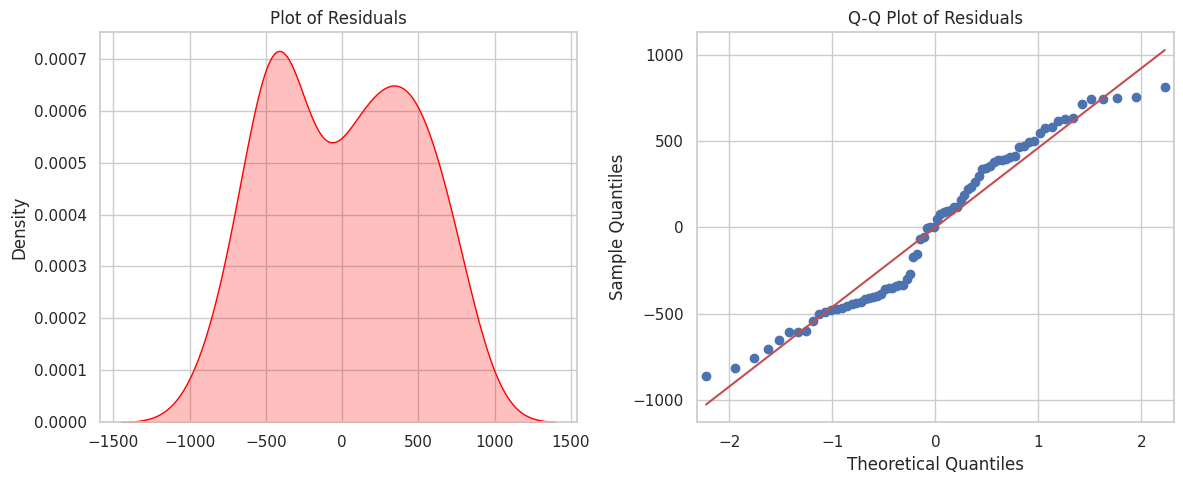

In [ ]:
import seaborn as sns
import statsmodels.api as sm

# Get residuals after fitting the model
residuals_matched = model_matched.resid

# Visualization: KDE plot and Q-Q plot for residuals
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# KDE plot for residuals with fill instead of shade
sns.kdeplot(residuals_matched, ax=ax[0], color='red', fill=True)
ax[0].set_title('Plot of Residuals')

# Q-Q plot
sm.qqplot(residuals_matched, line='s', ax=ax[1])
ax[1].set_title('Q-Q Plot of Residuals')

# Plotting the graphs below
plt.tight_layout()
plt.show()

>**Performing Shapiro-Wilk test on residuals after fitting the model to check for assumption of normality.**

> The residuals of our model seem to follow a normal distribution, as the Shapiro-Wilk test results indicate there is no significant deviation from normality. It implies that the assumptions of normality for our residuals are likely met, which is an important condition for fitting our model.

In [ ]:
# Perform Shapiro-Wilk test on residuals
shapiro_res = stats.shapiro(residuals_matched.dropna())

print(f'W: {round(shapiro_res[0], 3)}, P-value: {round(shapiro_res[1], 3)}')

W: 0.948, P-value: 0.003


>**The Residuals vs. Fitted Values Plot:** below indicates that the model is a good fit for the data, as there are no clear patterns, trends, or heteroscedasticity visible in the residuals.

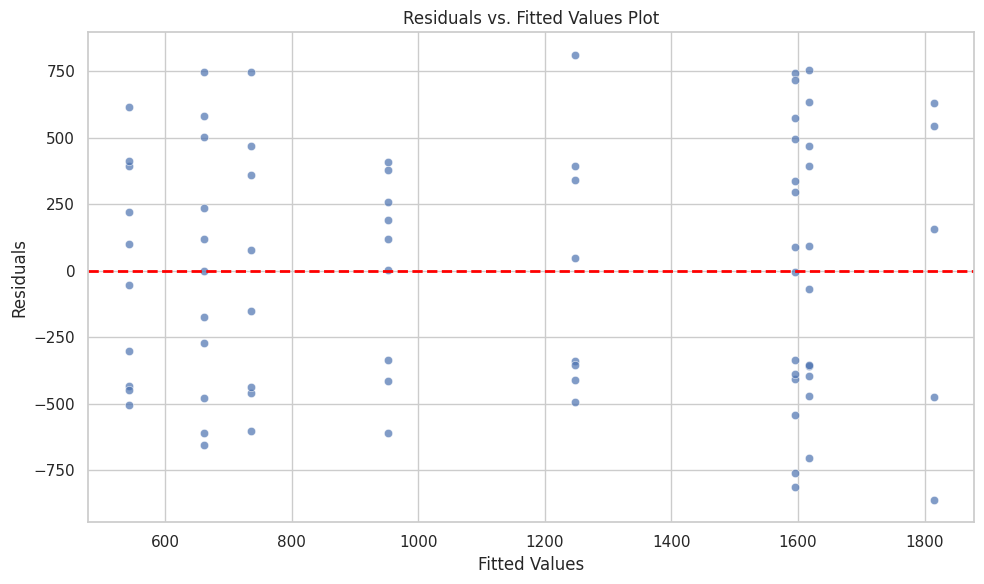

In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# Get the residuals and the fitted values
residuals_matched = model_matched.resid
fitted_values = model_matched.fittedvalues

# Plot Residuals vs. Fitted Values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=fitted_values, y=residuals_matched, alpha=0.7)
# Line at zero as a reference
plt.axhline(0, color='red', linestyle='--', linewidth=2)
plt.title("Residuals vs. Fitted Values Plot")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.tight_layout()
plt.show()

**Section 5.3: CONTINUOUS COVARIATES, ANCOVA, & ASSUMPTION CHECKS** <br>

>**Assignment 2 - Adding 1 Continuous Covariate (Income) ** <br>

In [ ]:

# Setting the seed for reproducibility
np.random.seed(42)

# Select 76 unique random participants
unique_participants = df['Participant ID'].unique()
selected_participants = np.random.choice(unique_participants, 76, replace=False)

# Filter the DataFrame to keep only the selected participants
matched_pairs_df = df[df['Participant ID'].isin(selected_participants)].copy()
#--------------------------------------------------------------------- Assignment 2: Adding a New Covariate --------------------------------------------------------------------------#
# Selecting demographic features associated with each participant
demographic_features = ['Participant ID', 'Age', 'Gender', 'Location', 'Income']
demographic_participant_df = matched_pairs_df[demographic_features].drop_duplicates(subset='Participant ID').copy()

# Sorting participants by Gender and then by Age for easier pairing
demographic_participant_df.sort_values(by=['Gender', 'Age'], inplace=True)

# Initialize dictionary to store participant pairs and track paired participants
paired_participants = {}
paired_participant_track = set()
pair_count = 1
treatments = ['Percentage Markdown']
control = 'No Discount'

# Convert dataframe to list for easier iteration
participant_list = demographic_participant_df.values.tolist()

# Creating a dictionary to store the assigned treatment for each participant
participant_treatment_mapping = {}

# Iterating through participants to form pairs
for i in range(len(participant_list)):
    if participant_list[i][0] in paired_participant_track:
        continue

    for j in range(i + 1, len(participant_list)):
        if participant_list[j][0] in paired_participant_track:
            continue

        # Pair participants only based on same gender
        if participant_list[i][2] == participant_list[j][2]:  # participant_list[i][2] is Gender
            paired_participant_track.add(participant_list[i][0])
            paired_participant_track.add(participant_list[j][0])

            # Randomly assign treatment or control
            if np.random.rand() < 0.5:
                treatment_receiver = participant_list[i][0]
                control_receiver = participant_list[j][0]
            else:
                treatment_receiver = participant_list[j][0]
                control_receiver = participant_list[i][0]

            assigned_treatment = np.random.choice(treatments)

            # Assign treatment and control
            participant_treatment_mapping[treatment_receiver] = assigned_treatment
            participant_treatment_mapping[control_receiver] = control

            # Store the pair information
            paired_participants[pair_count] = {
                'Pair': {'Participant 1': participant_list[i], 'Participant 2': participant_list[j]},
                'Treatment Receiver': treatment_receiver, 'Assigned Treatment': assigned_treatment,
                'Control Receiver': control_receiver, 'Control Group': control
            }

            pair_count += 1
            break  # Move to next unpaired participant

# Convert the treatment mapping into a DataFrame
treatment_df = pd.DataFrame(list(participant_treatment_mapping.items()), columns=['Participant ID', 'Assigned Condition'])

# Merge the treatment information with the demographic DataFrame
paired_participant_df = demographic_participant_df.merge(treatment_df, on='Participant ID', how='left')

# Define criteria for session duration based on treatment assignment
session_durations = {"Percentage Markdown": (700, 2500), "No Discount": (0, 1500)}

# Function to generate session durations
def generate_session_duration(condition):
    if condition in session_durations:
        min_duration, max_duration = session_durations[condition]
        return round(np.random.uniform(min_duration, max_duration), 2)
    return 0

# Apply the function to generate session durations
paired_participant_df['Session Duration'] = paired_participant_df['Assigned Condition'].apply(generate_session_duration)

# Preview the updated dataframe with treatment assignments
paired_participant_df.head(10)


Participant ID  Age  Gender  Location  Income   Assigned Condition  \
0            9921   20  Female    Regina   56086          No Discount   
1            5324   21  Female   Windsor   21269  Percentage Markdown   
2            9754   23  Female   Halifax  128675  Percentage Markdown   
3             322   26  Female    Barrie  110697          No Discount   
4            2593   26  Female   Halifax  125517          No Discount   
5            1316   32  Female  Hamilton  152690  Percentage Markdown   
6            2877   33  Female    Ottawa  101275          No Discount   
7            5654   33  Female  Edmonton  163226  Percentage Markdown   
8            5203   34  Female  Winnipeg  103865          No Discount   
9            6364   34  Female    Oshawa   28650  Percentage Markdown   

   Session Duration  
0           1488.90  
1           1886.26  
2            790.82  
3            156.84  
4           1321.51  
5           1649.49  
6           1237.26  
7           2241.90  
8           1391.51  
9           2409.69

**ANCOVA & SUMMARY STATISTICS:** <br>

> 'Income' continuous covariates.
Gender and Assigned Condition will be the categorical variables (i.e. treatment/control groups)<br>

>**SOURCE FOR ANCOVA CODE:** https://www.reneshbedre.com/blog/ancova.html

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Assuming 'paired_participant_df' is the DataFrame that contains all necessary data
# Update the formula to focus on the independent variables and their interactions, now including 'Gender'
formula = 'Q("Session Duration") ~ Q("Income") + Q("Assigned Condition") + Q("Gender") + \
          Q("Income"):Q("Assigned Condition") + Q("Assigned Condition"):Q("Gender") + \
          Q("Income"):Q("Gender")'

# Fit the model using ordinary least squares (OLS)
model_matched_c = ols(formula, data=paired_participant_df).fit()

# Perform the ANOVA and print the results
anova_table = sm.stats.anova_lm(model_matched_c, typ=3)  # Type II sums of squares are used here
print(anova_table)

# Print a detailed summary of the model to see coefficients, standard errors, p-values, and more
print(model_matched_c.summary())


                                           sum_sq    df          F    PR(>F)
Intercept                            5.718113e+06   1.0  22.717542  0.000010
Q("Assigned Condition")              1.522566e+06   1.0   6.049016  0.016425
Q("Gender")                          7.511136e+05   1.0   2.984106  0.088560
Q("Assigned Condition"):Q("Gender")  1.027245e+03   1.0   0.004081  0.949247
Q("Income")                          1.031605e+06   1.0   4.098473  0.046795
Q("Income"):Q("Assigned Condition")  2.806535e+05   1.0   1.115011  0.294679
Q("Income"):Q("Gender")              6.832290e+05   1.0   2.714407  0.103993
Residual                             1.736763e+07  69.0        NaN       NaN
                              OLS Regression Results                             
Dep. Variable:     Q("Session Duration")   R-squared:                       0.511
Model:                               OLS   Adj. R-squared:                  0.469
Method:                    Least Squares   F-statistic:      

In [ ]:
#------------------------------------------------------------------------------ TUKEY HSD TEST -----------------------------------------------------------------------------------------------#
# Perform Tukey's HSD for DiscountType
tukey_results_matched_pair = pairwise_tukeyhsd(
    paired_participant_df['Session Duration'],
    paired_participant_df['Assigned Condition']
)

print("\nTukey HSD Test Results:")
print(tukey_results_matched_pair)


Tukey HSD Test Results:
          Multiple Comparison of Means - Tukey HSD, FWER=0.05          
   group1          group2       meandiff p-adj  lower    upper   reject
-----------------------------------------------------------------------
No Discount Percentage Markdown 934.6411   0.0 703.3151 1165.967   True
-----------------------------------------------------------------------


**Checking Assumptions for ANCOVA:**

> 1. IID: Independently & Identically distributed taken care of by random sampling.
2. Normality: Testing for normality of residuals after fitting the model using the Shapiro-Wilk test
3. Homoscedasticity: variances of the dependent variable should be approximately equal across the different groups using

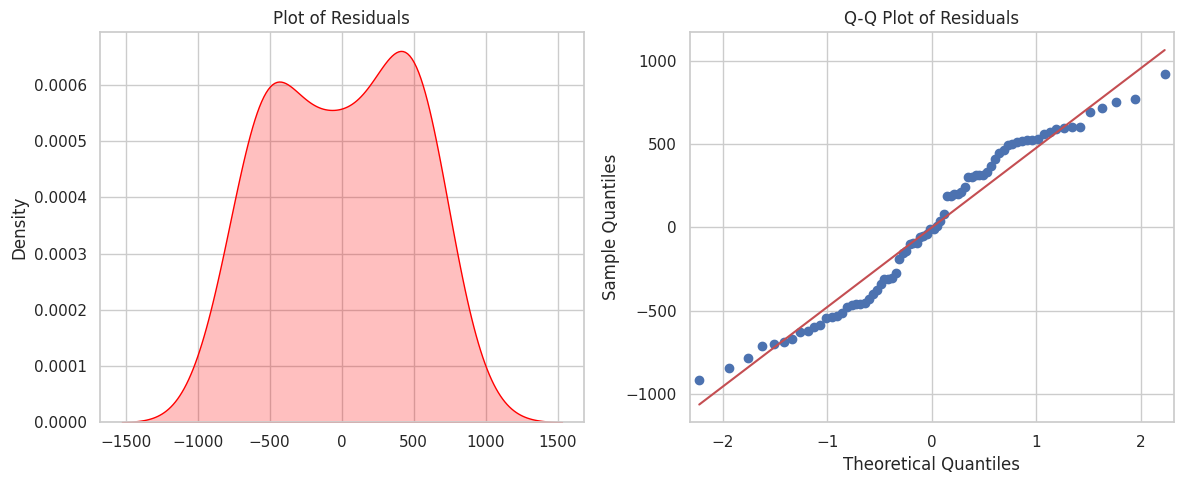

In [ ]:
import seaborn as sns
import statsmodels.api as sm

# Get residuals after fitting the model
residual_matched_c = model_matched_c.resid

# Visualization: KDE plot and Q-Q plot for residuals
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# KDE plot for residuals with fill instead of shade
sns.kdeplot(residual_matched_c, ax=ax[0], color='red', fill=True)
ax[0].set_title('Plot of Residuals')

# Q-Q plot
sm.qqplot(residual_matched_c, line='s', ax=ax[1])
ax[1].set_title('Q-Q Plot of Residuals')

# Plotting the graphs below
plt.tight_layout()
plt.show()

In [ ]:
# Perform Shapiro-Wilk test on residuals
shapiro_resid = stats.shapiro(residual_matched_c.dropna())

print(f'W: {round(shapiro_resid[0], 3)}, P-value: {round(shapiro_resid[1], 3)}')

W: 0.954, P-value: 0.008


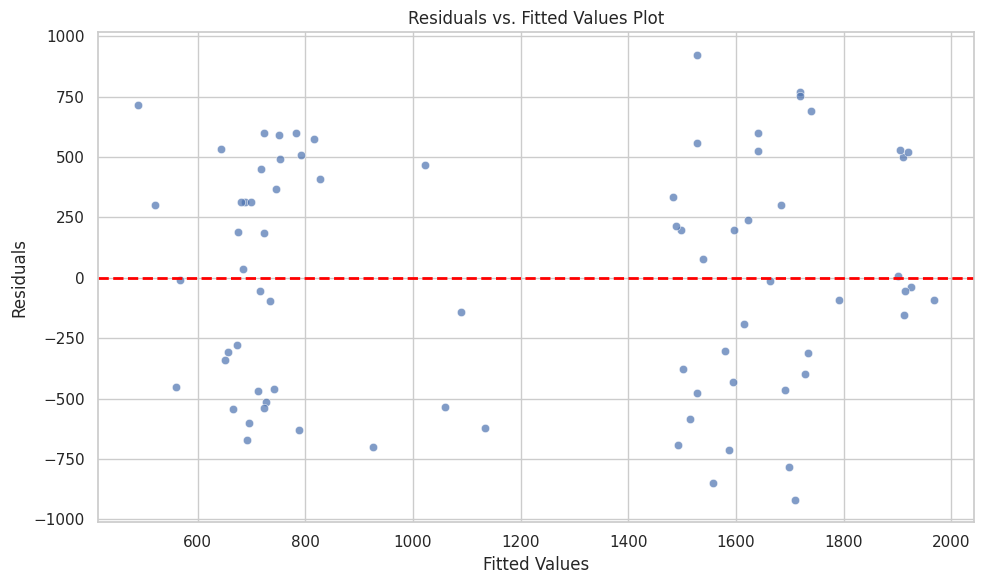

In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# Get the residuals and the fitted values
residual_matched_c = model_matched_c.resid
fitted_value = model_matched_c.fittedvalues

# Plot Residuals vs. Fitted Values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=fitted_value, y=residual_matched_c, alpha=0.7)
# Line at zero as a reference
plt.axhline(0, color='red', linestyle='--', linewidth=2)
plt.title("Residuals vs. Fitted Values Plot")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.tight_layout()
plt.show()

**Section 5.4: COMBINING BLOCKING & CONTINUOUS COVARIATES, ANCOVA FOR BOTH, & ASSUMPTION CHECKS** <br>

><mark>**Assignment 2 - BONUS PART: Running another set of two-way ANOVAs with both the blocking factor and continuous covariates for Matched Pair design subset of data.** <br>

In [ ]:
#-----------------------------------------------------------------ASSIGNMENT 2: BLOCKING USING INCOME LEVELS -----------------------------------------------------------------------#
# Setting the seed for reproducibility
np.random.seed(42)

# Select 38 people who have been exposed to social media promotion and 38 participants who have not been exposed
exposed_participants = df[df['Exposure to Social Media Promotion'] == 'Yes']['Participant ID'].unique()
non_exposed_participants = df[df['Exposure to Social Media Promotion'] == 'No']['Participant ID'].unique()

selected_exposed = np.random.choice(exposed_participants, 38, replace=False)
selected_non_exposed = np.random.choice(non_exposed_participants, 38, replace=False)

# Combine selected participants
selected_participants = np.concatenate([selected_exposed, selected_non_exposed])

# Filter the DataFrame to keep only the selected participants
matched_pairs_df = df[df['Participant ID'].isin(selected_participants)].copy()

#------------------------------------------------------------------- Assignment 2: Adding a New Covariate --------------------------------------------------------------------------#
# Selecting demographic features
demographic_features = ['Participant ID', 'Age', 'Gender', 'Location', 'Income', 'Exposure to Social Media Promotion']
demographic_participant_df = matched_pairs_df[demographic_features].drop_duplicates(subset='Participant ID').copy()

# Sorting for better pair matching based on 'Exposure to Social Media Promotion' and 'Age'
demographic_participant_df.sort_values(by=['Exposure to Social Media Promotion', 'Age'], inplace=True)

# Reset the pairing track and dictionary
paired_participants = {}
paired_participant_track = set()
pair_count = 1

# Defining the treatments
treatments = ['Percentage Markdown']
control = 'No Discount'

# Convert dataframe to list for easier iteration
participant_list = demographic_participant_df.values.tolist()

# Creating a dictionary to store the assigned treatment for each participant
participant_treatment_mapping = {}

# Iterating through participants to form pairs based on same exposure to social media promotion
for i in range(len(participant_list)):
    if participant_list[i][0] in paired_participant_track:
        continue

    for j in range(i + 1, len(participant_list)):
        if participant_list[j][0] in paired_participant_track:
            continue

        # Checking if the participants have the same exposure status
        if participant_list[i][5] == participant_list[j][5]:  # 'Exposure to Social Media Promotion' is indexed at 5
            paired_participant_track.add(participant_list[i][0])
            paired_participant_track.add(participant_list[j][0])

            # Randomly decide which participant gets the treatment
            if np.random.rand() < 0.5:
                treatment_receiver = participant_list[i][0]
                control_receiver = participant_list[j][0]
            else:
                treatment_receiver = participant_list[j][0]
                control_receiver = participant_list[i][0]

            # Randomly select a treatment
            assigned_treatment = np.random.choice(treatments)

            # Assigning treatment and control
            participant_treatment_mapping[treatment_receiver] = assigned_treatment
            participant_treatment_mapping[control_receiver] = control

            # Storing the pair in the dictionary
            paired_participants[pair_count] = {
                'Pair': {'Participant 1': participant_list[i], 'Participant 2': participant_list[j]},
                'Treatment Receiver': treatment_receiver, 'Assigned Treatment': assigned_treatment,
                'Control Receiver': control_receiver, 'Control Group': control
            }

            pair_count += 1
            break  # Move to the next unpaired participant

# Converting the treatment mapping back into a DataFrame
treatment_df = pd.DataFrame(list(participant_treatment_mapping.items()), columns=['Participant ID', 'Assigned Condition'])

# Merging the treatment information with the demographic DataFrame
paired_participant_df = demographic_participant_df.merge(treatment_df, on='Participant ID', how='left')

# Defining session duration based on treatment assignment
session_durations = {"Percentage Markdown": (700, 2500), "No Discount": (0, 1500)}

# Defining a function to create a column for our dependent variable: Session duration
def generate_session_duration(condition):
    if condition in session_durations:
        min_duration, max_duration = session_durations[condition]
        return round(np.random.uniform(min_duration, max_duration), 2)
    return 0

# Applying the function to generate session durations
paired_participant_df['Session Duration'] = paired_participant_df['Assigned Condition'].apply(generate_session_duration)

print(f"Total number of pairs created: {len(paired_participants)}")
print('\n')

# Preview the updated dataframe with treatment assignments
paired_participant_df.head(76)

Total number of pairs created: 38




Participant ID  Age  Gender     Location  Income  \
0             3944   18  Female       Regina   39901   
1             9142   21    Male       Ottawa  129626   
2              816   25    Male  Quebec City   16399   
3             7026   25  Female     Victoria   54688   
4             1281   26    Male      Windsor   66123   
..             ...  ...     ...          ...     ...   
71            5025   61  Female  Quebec City  159275   
72            3327   66    Male     Edmonton  134433   
73            9128   66    Male   St. John's  125237   
74             197   68    Male      Calgary   98307   
75            2112   68  Female      Windsor  193719   

   Exposure to Social Media Promotion   Assigned Condition  Session Duration  
0                                  No          No Discount            292.58  
1                                  No  Percentage Markdown           2429.02  
2                                  No          No Discount            213.98  
3                                  No  Percentage Markdown           1616.35  
4                                  No  Percentage Markdown           2193.45  
..                                ...                  ...               ...  
71                                Yes  Percentage Markdown            828.12  
72                                Yes          No Discount            134.28  
73                                Yes  Percentage Markdown           1480.80  
74                                Yes          No Discount            533.69  
75                                Yes  Percentage Markdown           1629.04  

[76 rows x 8 columns]

**ANCOVA & SUMMARY STATISTICS:** <br>

> 'Income' is the continuous covariates, Age Group will be a categorical blocking factor, and Gender and Treatment will be the categorical variables (i.e. treatment/control groups)<br>

>**SOURCE FOR ANCOVA CODE:** https://www.reneshbedre.com/blog/ancova.html

In [ ]:
#------------------------------------------------ TWO-WAY ANOVA FOR BLOCKING & COVARIATES ------------------------------------------------------------------------------------------#
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Assuming 'df' is your DataFrame and contains the appropriate data
# Create the model formula, including the main effects and interactions
formula = 'Q("Session Duration") ~ Q("Income") + Q("Exposure to Social Media Promotion") + Q("Gender") + Q("Assigned Condition") + \
           Q("Income"):Q("Exposure to Social Media Promotion") + Q("Income"):Q("Gender") + Q("Income"):Q("Assigned Condition") + \
           Q("Exposure to Social Media Promotion"):Q("Gender") + Q("Exposure to Social Media Promotion"):Q("Assigned Condition") + \
           Q("Gender"):Q("Assigned Condition")'

# Fit the model using ordinary least squares (OLS)
model_matched_2 = ols(formula, data=paired_participant_df).fit()

# Perform ANOVA and print table
aov_table = sm.stats.anova_lm(model_matched_2, typ=2)  # Using Type II sums of squares
print(aov_table)

# Print a detailed summary of the model
print(model_matched_2.summary())

#------------------------------------------------ TWO-WAY ANOVA FOR BLOCKING & COVARIATES END------------------------------------------------------------------------------------------#


                                                          sum_sq    df  \
Q("Exposure to Social Media Promotion")             4.318480e+02   1.0   
Q("Gender")                                         2.460499e+04   1.0   
Q("Assigned Condition")                             1.774026e+07   1.0   
Q("Exposure to Social Media Promotion"):Q("Gend...  8.135682e+04   1.0   
Q("Exposure to Social Media Promotion"):Q("Assi...  3.214288e+04   1.0   
Q("Gender"):Q("Assigned Condition")                 2.779313e+05   1.0   
Q("Income")                                         1.352772e+03   1.0   
Q("Income"):Q("Exposure to Social Media Promoti...  5.719768e+05   1.0   
Q("Income"):Q("Gender")                             1.273330e+05   1.0   
Q("Income"):Q("Assigned Condition")                 6.739009e+05   1.0   
Residual                                            1.154148e+07  65.0   

                                                            F        PR(>F)  
Q("Exposure to Social Media Promo

In [ ]:
#------------------------------------------------------------------------------ TUKEY HSD TEST -----------------------------------------------------------------------------------------------#
# Perform Tukey's HSD for DiscountType
tukey_results_matched_pair = pairwise_tukeyhsd(
    paired_participant_df['Session Duration'],
    paired_participant_df['Assigned Condition']
)

print("\nTukey HSD Test Results:")
print(tukey_results_matched_pair)


Tukey HSD Test Results:
          Multiple Comparison of Means - Tukey HSD, FWER=0.05           
   group1          group2       meandiff p-adj  lower     upper   reject
------------------------------------------------------------------------
No Discount Percentage Markdown 968.9982   0.0 774.0245 1163.9718   True
------------------------------------------------------------------------


**Checking Assumptions for COMBINED ANCOVA:**

> 1. IID: Independently & Identically distributed taken care of by random sampling.
2. Normality: Testing for normality of residuals after fitting the model using the Shapiro-Wilk test
3. Homoscedasticity: variances of the dependent variable should be approximately equal across the different groups using

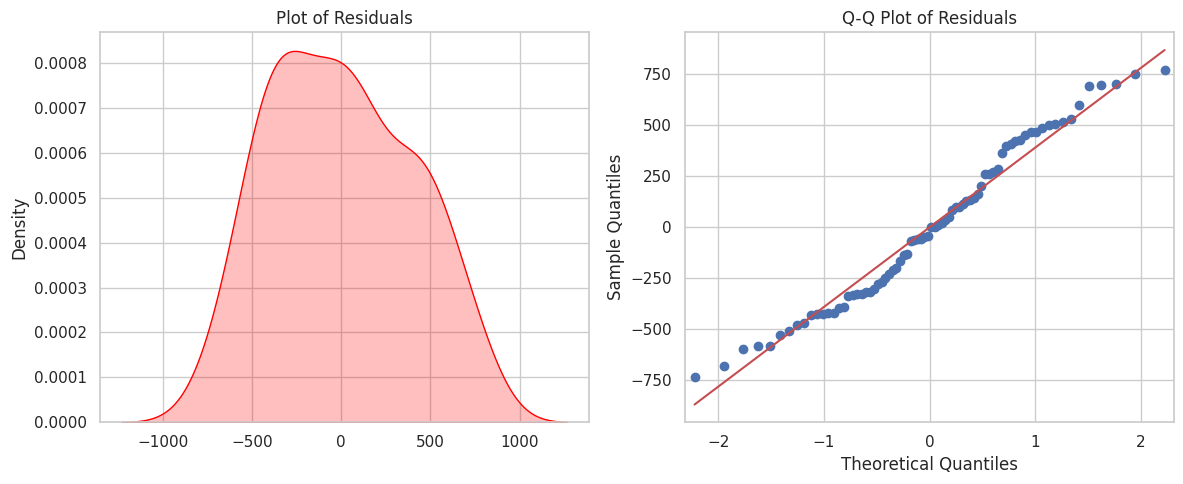

In [ ]:
import seaborn as sns
import statsmodels.api as sm

# Get residuals after fitting the model
residual_matched_2 = model_matched_2.resid

# Visualization: KDE plot and Q-Q plot for residuals
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# KDE plot for residuals with fill instead of shade
sns.kdeplot(residual_matched_2, ax=ax[0], color='red', fill=True)
ax[0].set_title('Plot of Residuals')

# Q-Q plot
sm.qqplot(residual_matched_2, line='s', ax=ax[1])
ax[1].set_title('Q-Q Plot of Residuals')

# Plotting the graphs below
plt.tight_layout()
plt.show()

In [ ]:
# Perform Shapiro-Wilk test on residuals
shapiro_residual = stats.shapiro(residual_matched_2.dropna())

print(f'W: {round(shapiro_residual[0], 3)}, P-value: {round(shapiro_residual[1], 3)}')

W: 0.967, P-value: 0.044


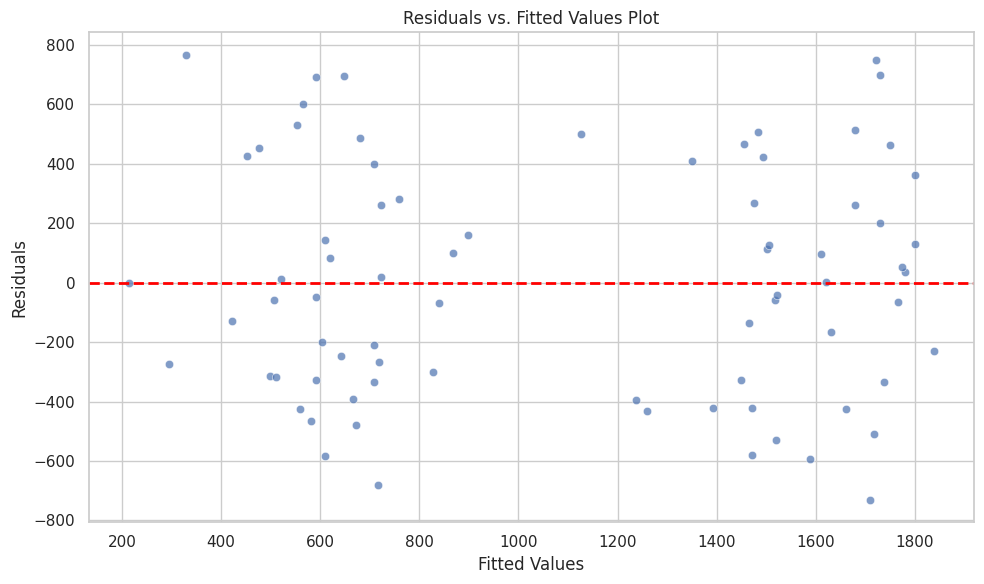

In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# Get the residuals and the fitted values
residual_matched_2 = model_matched_2.resid
fitted_value = model_matched_2.fittedvalues

# Plot Residuals vs. Fitted Values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=fitted_value, y=residual_matched_2, alpha=0.7)
# Line at zero as a reference
plt.axhline(0, color='red', linestyle='--', linewidth=2)
plt.title("Residuals vs. Fitted Values Plot")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.tight_layout()
plt.show()

**The Flow Chart for Matched Pairs Design with the blocking factor**

In [ ]:
!pip install schemdraw
import schemdraw
from schemdraw import flow

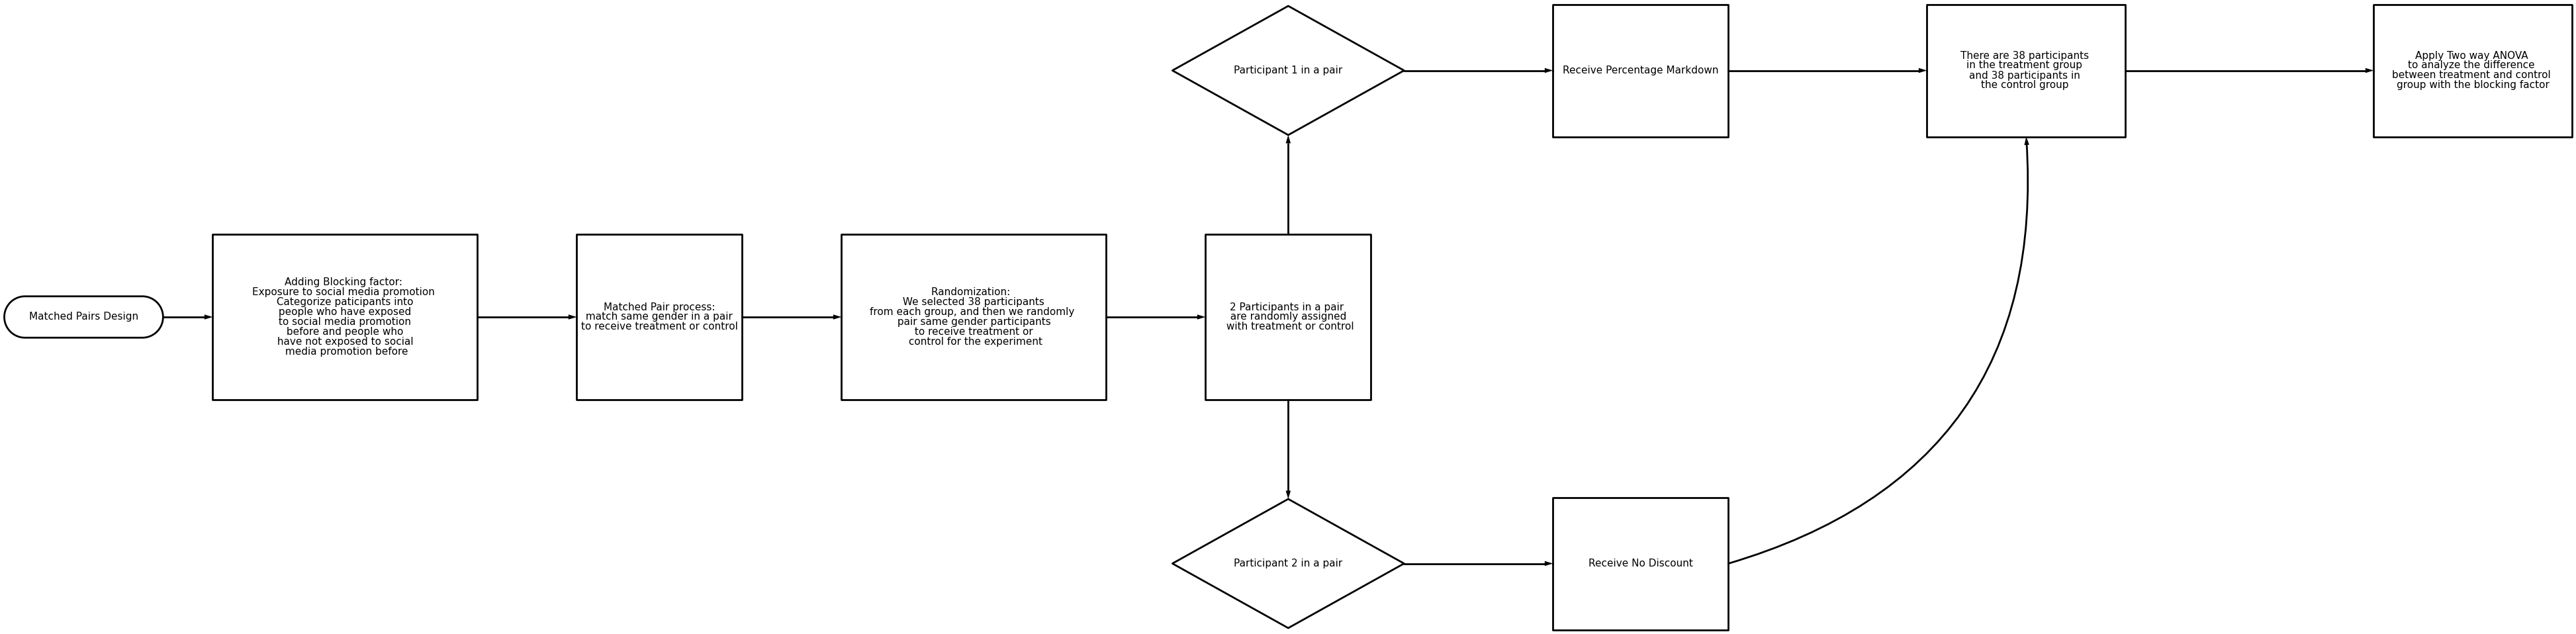

In [ ]:
with schemdraw.Drawing() as d:

    d.config(fontsize=11)
    b = flow.Start().label('Matched Pairs Design').at((8.5,-3))

    flow.Arrow().right(d.unit/2).at(b.E)
    d1 = flow.Box(w=8, h=5).label('Adding Blocking factor: \nExposure to social media promotion \n Categorize paticipants into \n people who have exposed \n to social media promotion \n before and people who \n have not exposed to social \n media promotion before')
    flow.Arrow().right(d.unit*1).at(d1.E)
    d1 = flow.Box(w=5, h=5).label('Matched Pair process:\n match same gender in a pair \nto receive treatment or control')
    flow.Arrow().right(d.unit*1).at(d1.E)
    d1 = flow.Box(w=8, h=5).label('Randomization:  \n We selected 38 participants \nfrom each group, and then we randomly \n pair same gender participants \n to receive treatment or \n control for the experiment')
    flow.Arrow().right(d.unit*1).at(d1.E)
    d1 = flow.Box(w=5, h=5).label('2 Participants in a pair \n are randomly assigned \n with treatment or control')
    flow.Arrow().up(d.unit*1).at(d1.N)
    d2 = flow.Decision(w=7, h=3.9).label('Participant 1 in a pair')
    flow.Arrow().down(d.unit*1).at(d1.S)
    d3 = flow.Decision(w=7, h=3.9).label('Participant 2 in a pair')



    flow.Arrow().right(d.unit*1.5).at(d2.E)
    d6 = flow.Box(w=5.3, h=4.0).anchor('W').label('Receive Percentage Markdown')

    flow.Arrow().right(d.unit*1.5).at(d3.E)
    d7 = flow.Box(w=5.3, h=4.0).anchor('W').label('Receive No Discount')




    flow.Arrow().right(d.unit*2).at(d6.E)
    C = flow.Box(w=6, h=4).label('There are 38 participants \nin the treatment group \nand 38 participants in \nthe control group ')
    flow.Arc2(k=-.4, arrow='->').at(d7.E).to(C.S)


    flow.Arrow().right(d.unit*2.5).at(C.E)
    D = flow.Box(w=6, h=4).label('Apply Two way ANOVA \nto analyze the difference \nbetween treatment and control \ngroup with the blocking factor')
